# Supervised Machine Learning

Among the two pre-eminent supervised and unsupervised machine learning techniques, classification is a popular method of the supervised algorithms -- where labeled examples of prior instances by humans can guide the training of a machine. Below, we introduce classfication with a few hands-on examples.

# Agenda

 - [Public Datasets for ML Exploration](#datasets)
 - [Public Jupyter Notebook Zoo](#modelzoo)
 - [Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook)
 - [BQML, AutoML](#modelspectrum), [Colab, AI Notebooks](#colab)
 - [Simple Challenge -- Garfield](#garfield)
 - [Pandas for Data Exploration](#pandas)
 - [Seaborn, Matplotlib, Plotly for Interaction Visualization](#visuals)
 - [Training, Testing, and Scoring Datasets](#train_test_scoring)
 - [Factor Plots](#factorplots)
 - [Data Shaping/Curation](#curation)
 - [Data Visualization with COVID Data](#covid)
 - [Data Encoding](#types)
   - [ID Attributes](#idattrib)
   - [Leakage Attributes](#leakattrib)
   - [Numerical Attributes](#numattrib)
   - [Ordinal Attributes](#ordattrib)
   - [Categorical Attributes](#catattrib)
   - [Text Attributes](#textattrib)
   - [Temporal Attributes](#timeattrib)
   - [Spatial Attributes](#spatialattrib)
 - [Leading Indicators](#leading)
 - Model Selection
   - [Numerical Labels (aka Regression)](#numlabel)
   - [Categorical Labels (aka Classification)](#catlabel)
 - Algorithmic Selection
   - [Logistic Regression](#logreg)
   - [K Nearest Neighbor](#knn)
   - [Naive Bayes](#bayes)
   - [Decision Tree](#dtree)
   - [Random Forest](#forest)
   - [Gradient Boosted Trees](#boost)
   - [XGBoost](#xgboost)
   - [Support Vector Machine](#svm)
 - Measuring Performance
  - [Accuracy](#accuracy)
  - [Confusion Matrix](#confusion)
  - [Logloss, Precision, Recall, F1-Score](#metrics)
 - [MNIST Example](#mnist)

<a id='datasets'></a>
# Public Datasets
There are numerous ML datasets for explorations in the public domain: contributed by many commercial and academic organizations. A few examples below.

 - [Kaggle](https://www.kaggle.com/datasets)
 - [Google Public Datasets](https://console.cloud.google.com/marketplace/browse?filter=solution-type:dataset)
 - [Google Dataset Search](https://datasetsearch.research.google.com/)
 - [Open Data Gov](data.gov)
 - [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets/blob/master/README.rst)
 - [UCI ML Datasets](https://archive.ics.uci.edu/ml/datasets.php)
 - [FiveThirtyEight Datasets](https://data.fivethirtyeight.com/)
 - [Google Open Images](https://opensource.google/projects/open-images-dataset)
 - [Coco Dataset](https://cocodataset.org/#home)
 - [Google Research Datasets](https://research.google/tools/datasets/)
 - [AI Data Labeling](https://console.cloud.google.com/data-labeling?project=project-dynamic-modeling)

<a id='modelzoo'></a>
# Models & Notebooks
There are even more contributions of prebuilt/open-source models (some represented as notebooks) in the open domain. Here, a few examples -- 

 - [AI Hub](https://aihub.cloud.google.com/u/0/)
 - [Colab Examples](https://colab.research.google.com/notebooks/intro.ipynb)
 - [Analytics Zoo](https://analytics-zoo.github.io/)
 - [Kaggle](https://www.kaggle.com/)
 - [Google Experiments](https://experiments.withgoogle.com/collection/ai)
 - [Jupyter Notebook Gallery](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
 - [KDNuggets](https://www.kdnuggets.com/)
 - [Azure ML Learning](https://docs.microsoft.com/en-us/azure/machine-learning/)
 - [Github Central](https://github.com/topics/machine-learning?l=jupyter+notebook)

<a id='modelspectrum'></a>
# Pandas, Scikit, BQML, AutoML

<table><tr><td><img src="https://cdn.kinsights.com/cache/5d/a1/5da18bf70104e2b7228b8a21a0ea832c.jpg" width="200" height="130"/></td><td><img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Egg_Sandwich.jpg" width="200" height="130"/></td><td><img src="https://images.squarespace-cdn.com/content/v1/58937f911e5b6c29540e52f0/1498681115780-2PC92C27S360OYHGLTDL/ke17ZwdGBToddI8pDm48kMR1yAHb8bPoH1-OdajP2rZZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpya-Yv2-AUIrtyc_1d9d84jKAfrgH35AgL5HDK7jKFTEAbkVb2mHFRzAaMt_-j0ggg/boxed-lunch-box.jpg?format=2500w" height="130" width="200" /></td></tr></table>

Previously, in BQML model, we developed in-database classification model directly in the big query data warehouse, so continuous training, continuous scoring methods are totally opaque, managed, and seamless to consumers. 

```
-- Jump to https://console.cloud.google.com/bigquery?project=project-dynamic-modeling&p=project-dynamic-modeling 
-- and key the model as following
CREATE OR REPLACE MODEL
 `bqml_tutorial.cardio logistic_model` OPTIONS
   (model type='LOGISTIC REG',
    auto_class_weights=TRUE,
    input_label_cols=['cardio']) AS
  SELECT age, gender, height, weight, ap_hi,
    ap_lo, cholesterol, gluc, smoke,
    alco, active, cardio
  FROM `project-dynamic-modeling.cardio_disease.cardio_disease`
```

There is also a managed service in Google Cloud Platform (GCP) -- called [AutoML tables](https://console.cloud.google.com/automl-tables?project=project-dynamic-modeling) -- which provides a total seamless experience for citizen data science.




> 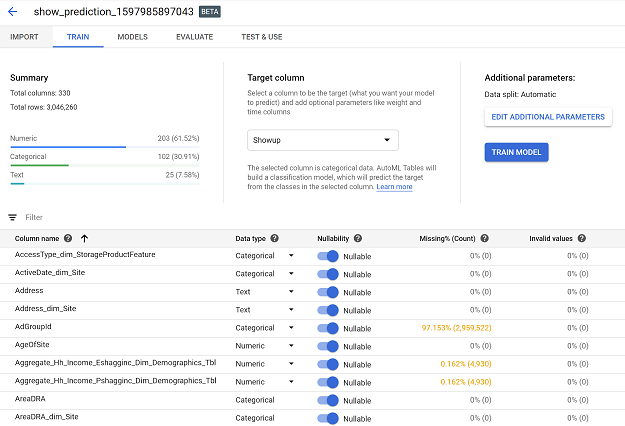

<a id='colab'></a>
Today, we focus on the middle: building the classification model from the start. Specifically, we will be using the Google Colab (a freemium Ju**Py**teR notebook service for Julia, Python and R) to ingest, shape, explore, visualize, and model data.

There is also a managed JupyterHub environment offered by Google (called [AI Notebooks](https://console.cloud.google.com/ai-platform/notebooks/list/instances?project=project-dynamic-modeling)) that we will utilize later.

<a id='garfield'></a>
# Garfield TVitcharoo Trivia

Garfield lays down in the evening to watch TV. I think his biometrics and activity choices during the day are indicative of his TV propensity at night. Do you see a pattern in this [data](https://drive.google.com/file/d/1hAzZLuSRxUZgrivQIRe2TANQQzAt7gM4YORGbEYTxuw/view?usp=sharing)?

In [1]:
import pandas as pd

garfield_biometrics = pd.read_csv('https://drive.google.com/uc?export=download&id=1_pOxAYnUWZ0FNdVnPMdkBo0WEgfMZLy0').\
 applymap(lambda x: x if x is not None and str(x).lower() != 'nan' else None)
garfield_biometrics.head(25)

Day       8AM  9AM  10AM  11AM      Noon  Lunch Bill  1PM  2PM  3PM  \
0    1-Jan-21    Coffee    6     6     0  Sandwich        7.35    9    8    5   
1    2-Jan-21  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
2    3-Jan-21    Coffee    7    10     9      Taco        4.50    0    4    3   
3    4-Jan-21    Coffee    9     7     8  Sandwich        7.35    2    6    2   
4    5-Jan-21  Doughnut    3    10     3  Sandwich        7.35    0    7    6   
5    6-Jan-21  Sandwich    9     9     1  Lenthils        2.98    5    7   10   
6    7-Jan-21  Doughnut    3    10     7  Lenthils        2.80   10    6    1   
7    8-Jan-21    Coffee    3     0     6      Taco        4.40    8    5    3   
8    9-Jan-21  Sandwich    5     4     7  Lenthils        2.98    2    1    3   
9   10-Jan-21    Coffee    6    10     1      Taco        5.00    4    3    5   
10  11-Jan-21  Doughnut    7     9     8  Sandwich        7.35    1    4    4   
11  12-Jan-21  Sandwich    9     6     7  Sandwich        7.39   10    7    3   
12  13-Jan-21  Sandwich    8    10     7      Taco        4.50    9    0    3   
13  14-Jan-21  Doughnut    2     2     2  Sandwich        7.25    9    4    4   
14  15-Jan-21    Coffee    5     9     5      Taco        4.60    8    0    3   
15  16-Jan-21    Coffee    6     0     1  Lenthils        3.20    4   10    3   
16  17-Jan-21  Sandwich    0     9     5  Sandwich        7.45    0    6    3   
17  18-Jan-21  Doughnut    2     0     4      Taco        4.80    8    5    5   
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   
19  20-Jan-21    Coffee    6     0     2  Sandwich        7.35    6    7    4   
20  21-Jan-21    Coffee    9     9     3  Lenthils        2.79    6    9    4   

         4PM  5PM Commute DayOfWeek WatchTV  
0        Tea    2    Long       Mon     Yes  
1   PingPong    0   Short       Tue      No  
2   PingPong    7   Short       Wed      No  
3   PingPong    5   Short       Thu     Yes  
4        Tea    7    Long       Fri     Yes  
5     Coffee   10   Short       Sat      No  
6     Coffee    6   Short       Mon      No  
7        Tea    6   Short       Tue      No  
8   PingPong    5   Short       Wed      No  
9    Workout    0   Short       Thu     Yes  
10   Workout    3    Long       Fri     Yes  
11   Workout    5    Long       Sat     Yes  
12  PingPong    1   Short       Mon      No  
13       Tea    9   Short       Tue     Yes  
14    Coffee   10   Short       Wed     Yes  
15  PingPong    6   Short       Thu      No  
16  PingPong    3   Short       Fri     Yes  
17    Coffee    2    Long       Sat     Yes  
18   Workout    5   Short       Mon      No  
19   Workout    6   Short       Tue    None  
20  PingPong    9    Long       Wed    None

<a id='pandas'></a>
# [Pandas](https://pandas.pydata.org/docs/)

[pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It was developed by [Wes McKinney](https://en.wikipedia.org/wiki/Wes_McKinney) in 2008.

In [2]:
import pandas as pd

# Fetch data from URL
# Of course, pandas can fetch data from many other sources like SQL databases, Files, Cloud etc
garfield_biometrics = pd.read_csv('https://drive.google.com/uc?export=download&id=1_pOxAYnUWZ0FNdVnPMdkBo0WEgfMZLy0').\
 applymap(lambda x: x if x is not None and str(x).lower() != 'nan' else None)
display(garfield_biometrics)

Day       8AM  9AM  10AM  11AM      Noon  Lunch Bill  1PM  2PM  3PM  \
0    1-Jan-21    Coffee    6     6     0  Sandwich        7.35    9    8    5   
1    2-Jan-21  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
2    3-Jan-21    Coffee    7    10     9      Taco        4.50    0    4    3   
3    4-Jan-21    Coffee    9     7     8  Sandwich        7.35    2    6    2   
4    5-Jan-21  Doughnut    3    10     3  Sandwich        7.35    0    7    6   
5    6-Jan-21  Sandwich    9     9     1  Lenthils        2.98    5    7   10   
6    7-Jan-21  Doughnut    3    10     7  Lenthils        2.80   10    6    1   
7    8-Jan-21    Coffee    3     0     6      Taco        4.40    8    5    3   
8    9-Jan-21  Sandwich    5     4     7  Lenthils        2.98    2    1    3   
9   10-Jan-21    Coffee    6    10     1      Taco        5.00    4    3    5   
10  11-Jan-21  Doughnut    7     9     8  Sandwich        7.35    1    4    4   
11  12-Jan-21  Sandwich    9     6     7  Sandwich        7.39   10    7    3   
12  13-Jan-21  Sandwich    8    10     7      Taco        4.50    9    0    3   
13  14-Jan-21  Doughnut    2     2     2  Sandwich        7.25    9    4    4   
14  15-Jan-21    Coffee    5     9     5      Taco        4.60    8    0    3   
15  16-Jan-21    Coffee    6     0     1  Lenthils        3.20    4   10    3   
16  17-Jan-21  Sandwich    0     9     5  Sandwich        7.45    0    6    3   
17  18-Jan-21  Doughnut    2     0     4      Taco        4.80    8    5    5   
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   
19  20-Jan-21    Coffee    6     0     2  Sandwich        7.35    6    7    4   
20  21-Jan-21    Coffee    9     9     3  Lenthils        2.79    6    9    4   

         4PM  5PM Commute DayOfWeek WatchTV  
0        Tea    2    Long       Mon     Yes  
1   PingPong    0   Short       Tue      No  
2   PingPong    7   Short       Wed      No  
3   PingPong    5   Short       Thu     Yes  
4        Tea    7    Long       Fri     Yes  
5     Coffee   10   Short       Sat      No  
6     Coffee    6   Short       Mon      No  
7        Tea    6   Short       Tue      No  
8   PingPong    5   Short       Wed      No  
9    Workout    0   Short       Thu     Yes  
10   Workout    3    Long       Fri     Yes  
11   Workout    5    Long       Sat     Yes  
12  PingPong    1   Short       Mon      No  
13       Tea    9   Short       Tue     Yes  
14    Coffee   10   Short       Wed     Yes  
15  PingPong    6   Short       Thu      No  
16  PingPong    3   Short       Fri     Yes  
17    Coffee    2    Long       Sat     Yes  
18   Workout    5   Short       Mon      No  
19   Workout    6   Short       Tue    None  
20  PingPong    9    Long       Wed    None

In [3]:
garfield_biometrics.dtypes

Day            object
8AM            object
9AM             int64
10AM            int64
11AM            int64
Noon           object
Lunch Bill    float64
1PM             int64
2PM             int64
3PM             int64
4PM            object
5PM             int64
Commute        object
DayOfWeek      object
WatchTV        object
dtype: object

Pandas can be used to slice, dice, and describe data of course. And traditional sorting, filtering, grouping, transforms work too.

In [4]:
# Columnar Definition of the data
from IPython.display import *
display(HTML("The columns of the dataframe are"))
display(pd.DataFrame(garfield_biometrics.columns, columns=['Column Name']).set_index('Column Name').T)

display(HTML("The rows of the dataframe are"))
display(pd.DataFrame(garfield_biometrics.index, columns=['Row Name']).set_index('Row Name').T)

Empty DataFrame
Columns: [Day, 8AM, 9AM, 10AM, 11AM, Noon, Lunch Bill, 1PM, 2PM, 3PM, 4PM, 5PM, Commute, DayOfWeek, WatchTV]
Index: []

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Index: []

[0 rows x 21 columns]

In [5]:
# Shape of the data
HTML(f'The shape of the dataset is {garfield_biometrics.shape[0]} rows and {garfield_biometrics.shape[1]} columns')

In [6]:
# Slice of the data, row wise alternates
display(garfield_biometrics[4:12:2].head(100))

Day       8AM  9AM  10AM  11AM      Noon  Lunch Bill  1PM  2PM  3PM  \
4    5-Jan-21  Doughnut    3    10     3  Sandwich        7.35    0    7    6   
6    7-Jan-21  Doughnut    3    10     7  Lenthils        2.80   10    6    1   
8    9-Jan-21  Sandwich    5     4     7  Lenthils        2.98    2    1    3   
10  11-Jan-21  Doughnut    7     9     8  Sandwich        7.35    1    4    4   

         4PM  5PM Commute DayOfWeek WatchTV  
4        Tea    7    Long       Fri     Yes  
6     Coffee    6   Short       Mon      No  
8   PingPong    5   Short       Wed      No  
10   Workout    3    Long       Fri     Yes

In [7]:
# Slice of the data, column wise, first five columns
display(garfield_biometrics.iloc[:,:5].head(5))

Day       8AM  9AM  10AM  11AM
0  1-Jan-21    Coffee    6     6     0
1  2-Jan-21  Doughnut    2     5     5
2  3-Jan-21    Coffee    7    10     9
3  4-Jan-21    Coffee    9     7     8
4  5-Jan-21  Doughnut    3    10     3

In [8]:
# Sorted by breakfast at 8AM
display(garfield_biometrics.sort_values('8AM').head(5))

Day     8AM  9AM  10AM  11AM      Noon  Lunch Bill  1PM  2PM  3PM  \
0    1-Jan-21  Coffee    6     6     0  Sandwich        7.35    9    8    5   
18  19-Jan-21  Coffee    5     7     6      Taco        4.75    9    6   10   
15  16-Jan-21  Coffee    6     0     1  Lenthils        3.20    4   10    3   
14  15-Jan-21  Coffee    5     9     5      Taco        4.60    8    0    3   
19  20-Jan-21  Coffee    6     0     2  Sandwich        7.35    6    7    4   

         4PM  5PM Commute DayOfWeek WatchTV  
0        Tea    2    Long       Mon     Yes  
18   Workout    5   Short       Mon      No  
15  PingPong    6   Short       Thu      No  
14    Coffee   10   Short       Wed     Yes  
19   Workout    6   Short       Tue    None

In [9]:
# Specific Columns
display(garfield_biometrics[['8AM', 'Noon', 'Commute', 'WatchTV']].head(5))

8AM      Noon Commute WatchTV
0    Coffee  Sandwich    Long     Yes
1  Doughnut  Lenthils   Short      No
2    Coffee      Taco   Short      No
3    Coffee  Sandwich   Short     Yes
4  Doughnut  Sandwich    Long     Yes

In [10]:
# Group count Lunches
garfield_biometrics.groupby('Noon')['Noon'].agg('count').to_frame()

Noon
Noon          
Lenthils     6
Sandwich     8
Taco         7

In [11]:
# Filter: what is the WatchTV when Lunch is Taco
garfield_biometrics[garfield_biometrics.Noon == 'Taco'][['Noon', 'WatchTV']]

Noon WatchTV
2   Taco      No
7   Taco      No
9   Taco     Yes
12  Taco      No
14  Taco     Yes
17  Taco     Yes
18  Taco      No

In [12]:
# Data Types of the field
display(garfield_biometrics.dtypes)
display(garfield_biometrics.astype(str).dtypes)

Day            object
8AM            object
9AM             int64
10AM            int64
11AM            int64
Noon           object
Lunch Bill    float64
1PM             int64
2PM             int64
3PM             int64
4PM            object
5PM             int64
Commute        object
DayOfWeek      object
WatchTV        object
dtype: object

Day           object
8AM           object
9AM           object
10AM          object
11AM          object
Noon          object
Lunch Bill    object
1PM           object
2PM           object
3PM           object
4PM           object
5PM           object
Commute       object
DayOfWeek     object
WatchTV       object
dtype: object

In [13]:
# String Type Selection Only
garfield_biometrics.select_dtypes('object').head()

Day       8AM      Noon       4PM Commute DayOfWeek WatchTV
0  1-Jan-21    Coffee  Sandwich       Tea    Long       Mon     Yes
1  2-Jan-21  Doughnut  Lenthils  PingPong   Short       Tue      No
2  3-Jan-21    Coffee      Taco  PingPong   Short       Wed      No
3  4-Jan-21    Coffee  Sandwich  PingPong   Short       Thu     Yes
4  5-Jan-21  Doughnut  Sandwich       Tea    Long       Fri     Yes

In [14]:
# Capture categorical variables
string_types = garfield_biometrics.select_dtypes('object').columns.tolist()
# Make a in-mem copy of the table
garfield_biometrics_copy = garfield_biometrics.copy()
# For each column that is string, xform to titlecase and remove any trailing space
garfield_biometrics_copy[string_types] = garfield_biometrics_copy[string_types].applymap(lambda x: str(x).strip().title() if x is not None and str(x).lower() != 'none' else None)
# Preview
display(garfield_biometrics_copy.head(200))

Day       8AM  9AM  10AM  11AM      Noon  Lunch Bill  1PM  2PM  3PM  \
0    1-Jan-21    Coffee    6     6     0  Sandwich        7.35    9    8    5   
1    2-Jan-21  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
2    3-Jan-21    Coffee    7    10     9      Taco        4.50    0    4    3   
3    4-Jan-21    Coffee    9     7     8  Sandwich        7.35    2    6    2   
4    5-Jan-21  Doughnut    3    10     3  Sandwich        7.35    0    7    6   
5    6-Jan-21  Sandwich    9     9     1  Lenthils        2.98    5    7   10   
6    7-Jan-21  Doughnut    3    10     7  Lenthils        2.80   10    6    1   
7    8-Jan-21    Coffee    3     0     6      Taco        4.40    8    5    3   
8    9-Jan-21  Sandwich    5     4     7  Lenthils        2.98    2    1    3   
9   10-Jan-21    Coffee    6    10     1      Taco        5.00    4    3    5   
10  11-Jan-21  Doughnut    7     9     8  Sandwich        7.35    1    4    4   
11  12-Jan-21  Sandwich    9     6     7  Sandwich        7.39   10    7    3   
12  13-Jan-21  Sandwich    8    10     7      Taco        4.50    9    0    3   
13  14-Jan-21  Doughnut    2     2     2  Sandwich        7.25    9    4    4   
14  15-Jan-21    Coffee    5     9     5      Taco        4.60    8    0    3   
15  16-Jan-21    Coffee    6     0     1  Lenthils        3.20    4   10    3   
16  17-Jan-21  Sandwich    0     9     5  Sandwich        7.45    0    6    3   
17  18-Jan-21  Doughnut    2     0     4      Taco        4.80    8    5    5   
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   
19  20-Jan-21    Coffee    6     0     2  Sandwich        7.35    6    7    4   
20  21-Jan-21    Coffee    9     9     3  Lenthils        2.79    6    9    4   

         4PM  5PM Commute DayOfWeek WatchTV  
0        Tea    2    Long       Mon     Yes  
1   Pingpong    0   Short       Tue      No  
2   Pingpong    7   Short       Wed      No  
3   Pingpong    5   Short       Thu     Yes  
4        Tea    7    Long       Fri     Yes  
5     Coffee   10   Short       Sat      No  
6     Coffee    6   Short       Mon      No  
7        Tea    6   Short       Tue      No  
8   Pingpong    5   Short       Wed      No  
9    Workout    0   Short       Thu     Yes  
10   Workout    3    Long       Fri     Yes  
11   Workout    5    Long       Sat     Yes  
12  Pingpong    1   Short       Mon      No  
13       Tea    9   Short       Tue     Yes  
14    Coffee   10   Short       Wed     Yes  
15  Pingpong    6   Short       Thu      No  
16  Pingpong    3   Short       Fri     Yes  
17    Coffee    2    Long       Sat     Yes  
18   Workout    5   Short       Mon      No  
19   Workout    6   Short       Tue    None  
20  Pingpong    9    Long       Wed    None

In [15]:
# Rename '8AM' to 'Breakfast', 'Noon' to 'Lunch', '4PM' to 'Post Siesta'
display(garfield_biometrics_copy.rename({
    '8AM':'Breakfast',
    'Noon':'Lunch',
    '4PM':'Post Siesta'
    }, axis=1).head(5))

# Notice pandas dataframe is immutable: aka it creates a copy when you change something
display(pd.DataFrame(garfield_biometrics_copy.columns, columns=['Column Name']).set_index('Column Name').T)

Day Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
0  1-Jan-21    Coffee    6     6     0  Sandwich        7.35    9    8    5   
1  2-Jan-21  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
2  3-Jan-21    Coffee    7    10     9      Taco        4.50    0    4    3   
3  4-Jan-21    Coffee    9     7     8  Sandwich        7.35    2    6    2   
4  5-Jan-21  Doughnut    3    10     3  Sandwich        7.35    0    7    6   

  Post Siesta  5PM Commute DayOfWeek WatchTV  
0         Tea    2    Long       Mon     Yes  
1    Pingpong    0   Short       Tue      No  
2    Pingpong    7   Short       Wed      No  
3    Pingpong    5   Short       Thu     Yes  
4         Tea    7    Long       Fri     Yes

Empty DataFrame
Columns: [Day, 8AM, 9AM, 10AM, 11AM, Noon, Lunch Bill, 1PM, 2PM, 3PM, 4PM, 5PM, Commute, DayOfWeek, WatchTV]
Index: []

In [16]:
# Make changes inplace
garfield_biometrics_copy.rename({
    '8AM':'Breakfast',
    'Noon':'Lunch',
    '4PM':'Post Siesta'
    }, axis=1, inplace=True)

display(garfield_biometrics_copy.head(5))

Day Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
0  1-Jan-21    Coffee    6     6     0  Sandwich        7.35    9    8    5   
1  2-Jan-21  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
2  3-Jan-21    Coffee    7    10     9      Taco        4.50    0    4    3   
3  4-Jan-21    Coffee    9     7     8  Sandwich        7.35    2    6    2   
4  5-Jan-21  Doughnut    3    10     3  Sandwich        7.35    0    7    6   

  Post Siesta  5PM Commute DayOfWeek WatchTV  
0         Tea    2    Long       Mon     Yes  
1    Pingpong    0   Short       Tue      No  
2    Pingpong    7   Short       Wed      No  
3    Pingpong    5   Short       Thu     Yes  
4         Tea    7    Long       Fri     Yes

# Descriptive Statistics

Let us describe (aka skew, mean, mode, min, max) distributions of the data

In [17]:
# Descriptive Stats of the numerical Attributes
display(garfield_biometrics_copy.describe())

9AM       10AM       11AM  Lunch Bill        1PM        2PM  \
count  21.000000  21.000000  21.000000   21.000000  21.000000  21.000000   
mean    5.333333   6.285714   4.619048    5.198095   5.380952   5.190476   
std     2.708013   3.809762   2.729033    1.867262   3.570381   2.676174   
min     0.000000   0.000000   0.000000    2.790000   0.000000   0.000000   
25%     3.000000   4.000000   2.000000    3.200000   2.000000   4.000000   
50%     6.000000   7.000000   5.000000    4.750000   6.000000   6.000000   
75%     7.000000   9.000000   7.000000    7.350000   9.000000   7.000000   
max     9.000000  10.000000   9.000000    7.450000  10.000000  10.000000   

             3PM        5PM  
count  21.000000  21.000000  
mean    4.142857   5.095238  
std     2.242448   3.048028  
min     1.000000   0.000000  
25%     3.000000   3.000000  
50%     3.000000   5.000000  
75%     5.000000   7.000000  
max    10.000000  10.000000

<a id='visuals'></a>
# Visualizing the data distributions

<AxesSubplot:ylabel='Density'>

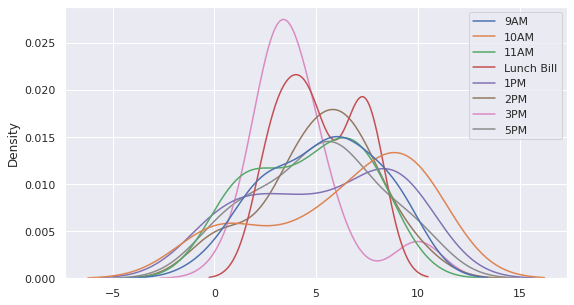

In [18]:
%matplotlib inline
import seaborn as sns
import numpy as np
# Set figure size
sns.set(rc={'figure.figsize':(9.0, 5.0)}, style="darkgrid")
# Show distribution plots
sns.kdeplot(data=garfield_biometrics_copy.select_dtypes(include=np.number))

In [19]:
# Describe categorical types of data as well
garfield_biometrics_copy.select_dtypes(exclude=np.number).describe(include='all')

#garfield_biometrics_copy.Lunch.value_counts().plot(kind='bar')

Day Breakfast     Lunch Post Siesta Commute DayOfWeek WatchTV
count         21        21        21          21      21        21      19
unique        21         3         3           4       2         6       2
top     6-Jan-21    Coffee  Sandwich    Pingpong   Short       Mon     Yes
freq           1        10         8           8      15         4      10

<a id='train_test_scoring'></a>
# Training, Testing, Scoring Datasets

> <img src="https://miro.medium.com/max/7200/1*_7OPgojau8hkiPUiHoGK_w.png" width="600" />

> <img src="https://fox8.com/wp-content/uploads/sites/12/2020/12/catsanddogs2.jpg?w=1200&h=670&crop=1" width=600 />
> <table><tr><td>Unknown</td><td>Unknown</td><td>Dog</td><td>Unknown</td><td>Unknown</td><td>Cat</td></tr></table>

 - **Training Dataset**: The sample of **labeled** data used to fit the model.
The actual dataset that we use to train the model. The model sees and learns from this data.
 - **Testing Dataset**: The sample of **labeled** data used to provide an unbiased evaluation of a final model fit on the training dataset. A test dataset is independent of the training dataset, but it follows the same probability distribution as the training dataset. 
   - If a model learned from the training dataset also fits the test dataset well, the model is *NOT overfit.*
   - If a model learned from the training dataset does not predict test dataset well, the model is *overfit.*
 - **Scoring Dataset**: The **unlabeled** data -- from real world -- that is used to predict outcomes from the trained model.


# Labeled Data

Only consider the "labeled" data: data that has been "supervised" by human intelligence. Notice that our toy data has missing labels in the last two rows. We will use this data as "scoring" data.

In [20]:
labeled_garfield_data = garfield_biometrics_copy[~garfield_biometrics_copy.WatchTV.isna()]
labeled_garfield_data

Day Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
0    1-Jan-21    Coffee    6     6     0  Sandwich        7.35    9    8    5   
1    2-Jan-21  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
2    3-Jan-21    Coffee    7    10     9      Taco        4.50    0    4    3   
3    4-Jan-21    Coffee    9     7     8  Sandwich        7.35    2    6    2   
4    5-Jan-21  Doughnut    3    10     3  Sandwich        7.35    0    7    6   
5    6-Jan-21  Sandwich    9     9     1  Lenthils        2.98    5    7   10   
6    7-Jan-21  Doughnut    3    10     7  Lenthils        2.80   10    6    1   
7    8-Jan-21    Coffee    3     0     6      Taco        4.40    8    5    3   
8    9-Jan-21  Sandwich    5     4     7  Lenthils        2.98    2    1    3   
9   10-Jan-21    Coffee    6    10     1      Taco        5.00    4    3    5   
10  11-Jan-21  Doughnut    7     9     8  Sandwich        7.35    1    4    4   
11  12-Jan-21  Sandwich    9     6     7  Sandwich        7.39   10    7    3   
12  13-Jan-21  Sandwich    8    10     7      Taco        4.50    9    0    3   
13  14-Jan-21  Doughnut    2     2     2  Sandwich        7.25    9    4    4   
14  15-Jan-21    Coffee    5     9     5      Taco        4.60    8    0    3   
15  16-Jan-21    Coffee    6     0     1  Lenthils        3.20    4   10    3   
16  17-Jan-21  Sandwich    0     9     5  Sandwich        7.45    0    6    3   
17  18-Jan-21  Doughnut    2     0     4      Taco        4.80    8    5    5   
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   

   Post Siesta  5PM Commute DayOfWeek WatchTV  
0          Tea    2    Long       Mon     Yes  
1     Pingpong    0   Short       Tue      No  
2     Pingpong    7   Short       Wed      No  
3     Pingpong    5   Short       Thu     Yes  
4          Tea    7    Long       Fri     Yes  
5       Coffee   10   Short       Sat      No  
6       Coffee    6   Short       Mon      No  
7          Tea    6   Short       Tue      No  
8     Pingpong    5   Short       Wed      No  
9      Workout    0   Short       Thu     Yes  
10     Workout    3    Long       Fri     Yes  
11     Workout    5    Long       Sat     Yes  
12    Pingpong    1   Short       Mon      No  
13         Tea    9   Short       Tue     Yes  
14      Coffee   10   Short       Wed     Yes  
15    Pingpong    6   Short       Thu      No  
16    Pingpong    3   Short       Fri     Yes  
17      Coffee    2    Long       Sat     Yes  
18     Workout    5   Short       Mon      No

<a id='factorplots'></a>
# Factor Plots

Quickly see correlations between numerical and output attributes

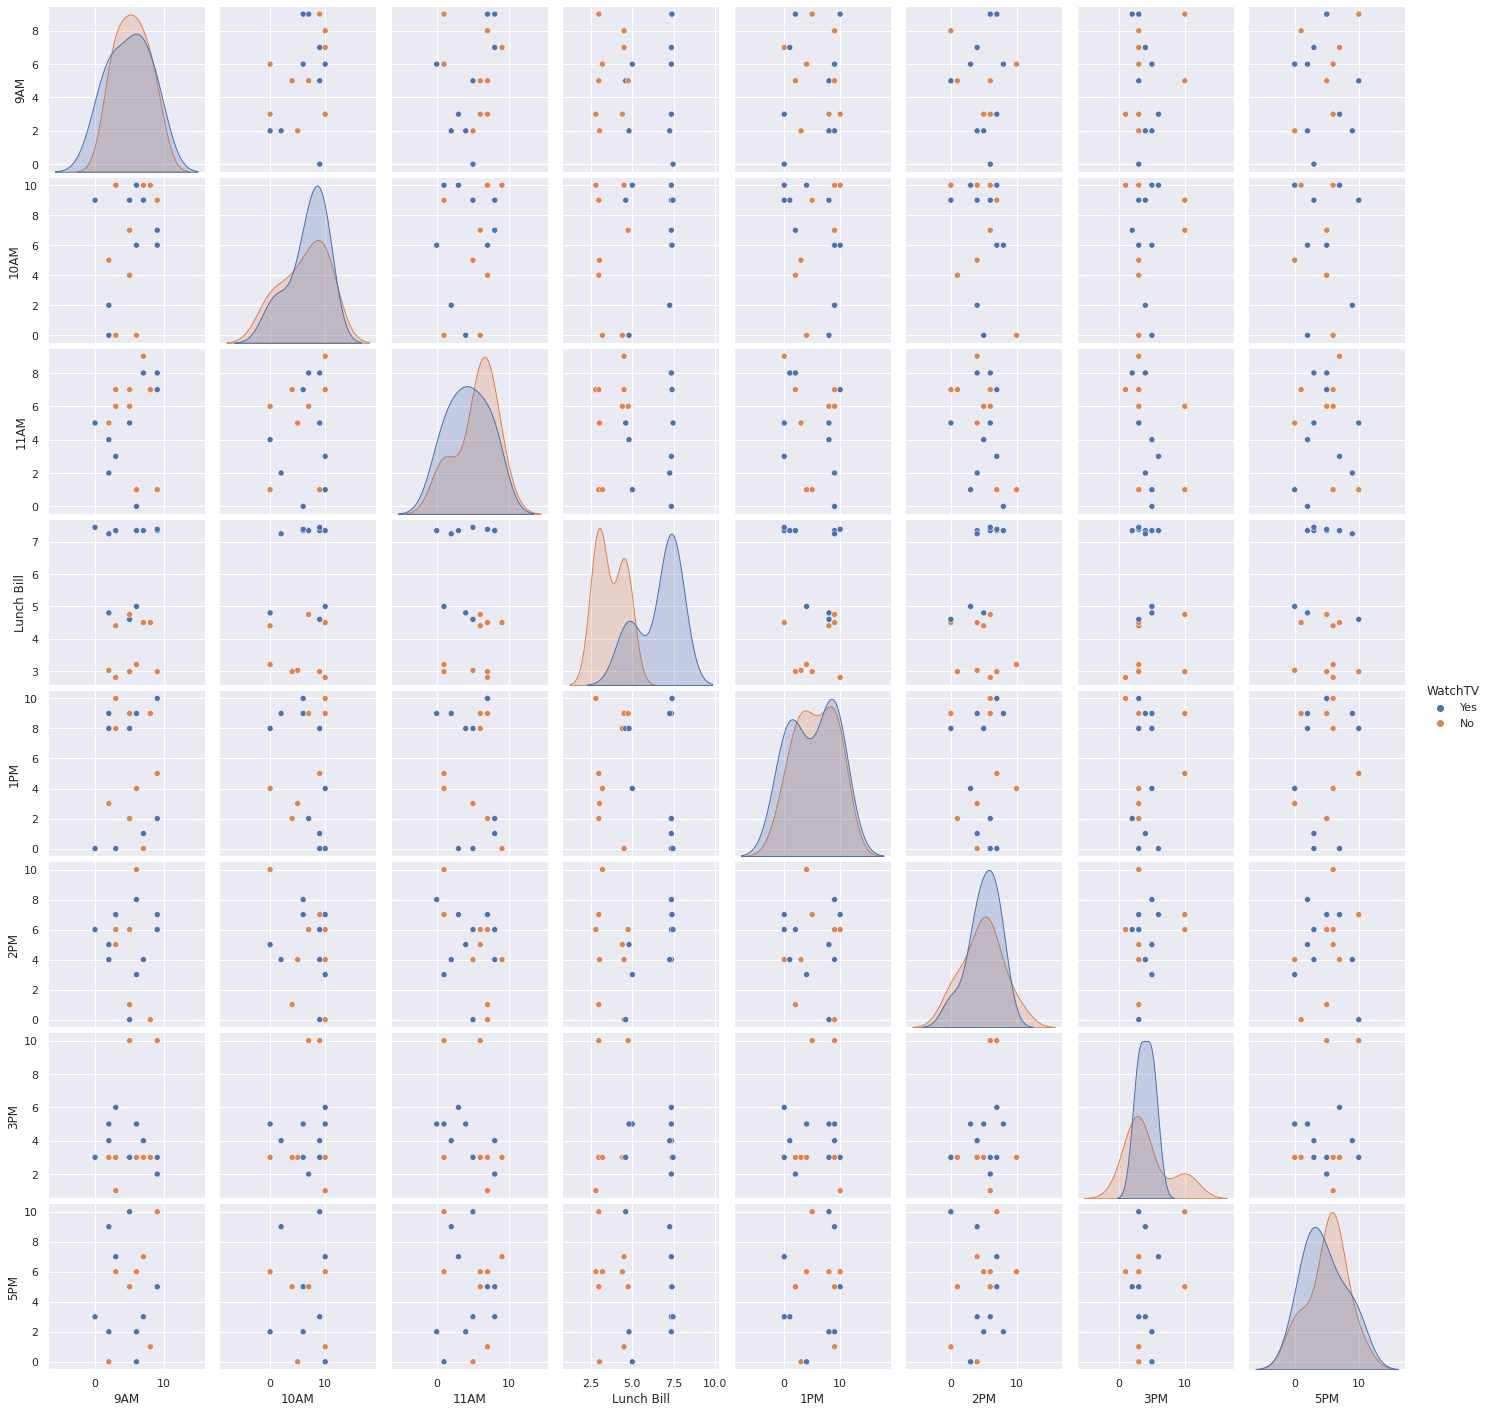

In [21]:
# See if any numeric columns have relevance
sns.pairplot(data=labeled_garfield_data, hue='WatchTV', diag_kind="kde")

# Data Types

> ## Attributes -- independent variables (that presumably determine prediction)
 1. <a id='numattrib'></a>Numerical Attributes -- Independent variables in the study usually represented as a real number. 
 2. <a id='timeattrib'></a>Temporal Attributes -- Time variable: for example, date fields. Span/aging factors can be derived.
 3. <a id='spatialattrib'></a>Spatial Attributes -- Location variable: for example, latitude and longitude. Distance factors can be derived.
 4. <a id='ordattrib'></a>Ordinal Attributes -- Numerical or Text variables: implies ordering. For example, low, medium, high can be encoded as 1, 2, 3 respectively
 5. <a id='catattrib'></a>Categorical Attributes -- String variables: usually do not imply any ordinality (ordering) but have small cardinality. For example, Male-Female, Winter-Spring-Summer-Fall
 6. <a id='textattrib'></a>Text Attributes -- String variables that usually have very hgh cardinality. For example, user reviews with commentary
 7. <a id='idattrib'></a>ID Attributes -- Identity attributes (usually string/long numbers) that have no significance in predicting outcome. For example, social security number, warehouse id. It is best to avoid these ID attributes in the modeling exercise.
 8. <a id='leakattrib'></a>Leakage attributes -- redundant attributes that usually are deterministically correlated with the outcome label attribute. For example, say we have two temperature attributes -- one in Fahrenheit and another Celsius -- where Fahrenheit temperature is the predicted attribute, having the Celsius accidentally in the modeling will lead to absolute predictions that fail to capture true stochasticity of the model.

> ## Labels
 1. <a id='catlabel'></a>Categorical Labels -- Usually a string or ordinal variable with small cardinality. For example, asymptomatic recovery, symptomatic recovery, intensive care recovery, fatal. *This usually indicates a **classification** problem.*
 2. <a id='numlabel'></a>Numerical Labels -- Usually a numerical output variable. For example, business travel volume. *This usually indicates a **regression** problem.*
 3. When labels do not exist in the dataset, *it usually indicates a **unsupervised learning** problem.*



# Data Imputations

Impute missing values with mean, interpolation, forward-fill, backward-fill, drop altogether.

In [22]:
# Where do we have invalid values
garfield_biometrics_copy.isna()[-4:]

Day  Breakfast    9AM   10AM   11AM  Lunch  Lunch Bill    1PM    2PM  \
17  False      False  False  False  False  False       False  False  False   
18  False      False  False  False  False  False       False  False  False   
19  False      False  False  False  False  False       False  False  False   
20  False      False  False  False  False  False       False  False  False   

      3PM  Post Siesta    5PM  Commute  DayOfWeek  WatchTV  
17  False        False  False    False      False    False  
18  False        False  False    False      False    False  
19  False        False  False    False      False     True  
20  False        False  False    False      False     True

In [23]:
# Impute with forward fill
display(garfield_biometrics_copy.fillna(method='ffill')[-3:])

Day Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   
19  20-Jan-21    Coffee    6     0     2  Sandwich        7.35    6    7    4   
20  21-Jan-21    Coffee    9     9     3  Lenthils        2.79    6    9    4   

   Post Siesta  5PM Commute DayOfWeek WatchTV  
18     Workout    5   Short       Mon      No  
19     Workout    6   Short       Tue      No  
20    Pingpong    9    Long       Wed      No

In [24]:
# Impute with backfill
display(garfield_biometrics_copy.fillna(method='bfill')[-3:])

Day Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   
19  20-Jan-21    Coffee    6     0     2  Sandwich        7.35    6    7    4   
20  21-Jan-21    Coffee    9     9     3  Lenthils        2.79    6    9    4   

   Post Siesta  5PM Commute DayOfWeek WatchTV  
18     Workout    5   Short       Mon      No  
19     Workout    6   Short       Tue    None  
20    Pingpong    9    Long       Wed    None

In [25]:
# Impute with mode
display(garfield_biometrics_copy.fillna(garfield_biometrics_copy.WatchTV.mode()[0])[-3:])


Day Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   
19  20-Jan-21    Coffee    6     0     2  Sandwich        7.35    6    7    4   
20  21-Jan-21    Coffee    9     9     3  Lenthils        2.79    6    9    4   

   Post Siesta  5PM Commute DayOfWeek WatchTV  
18     Workout    5   Short       Mon      No  
19     Workout    6   Short       Tue     Yes  
20    Pingpong    9    Long       Wed     Yes

In [26]:
# Impute with median
display(garfield_biometrics_copy.fillna(garfield_biometrics_copy.WatchTV.value_counts().idxmax())[-3:])

Day Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   
19  20-Jan-21    Coffee    6     0     2  Sandwich        7.35    6    7    4   
20  21-Jan-21    Coffee    9     9     3  Lenthils        2.79    6    9    4   

   Post Siesta  5PM Commute DayOfWeek WatchTV  
18     Workout    5   Short       Mon      No  
19     Workout    6   Short       Tue     Yes  
20    Pingpong    9    Long       Wed     Yes

<a id='curation'></a>
# Data Shaping

Pivot, transpose, or interpolate data

In [27]:
# Original data preview
display(garfield_biometrics_copy.tail(5))

Day Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
16  17-Jan-21  Sandwich    0     9     5  Sandwich        7.45    0    6    3   
17  18-Jan-21  Doughnut    2     0     4      Taco        4.80    8    5    5   
18  19-Jan-21    Coffee    5     7     6      Taco        4.75    9    6   10   
19  20-Jan-21    Coffee    6     0     2  Sandwich        7.35    6    7    4   
20  21-Jan-21    Coffee    9     9     3  Lenthils        2.79    6    9    4   

   Post Siesta  5PM Commute DayOfWeek WatchTV  
16    Pingpong    3   Short       Fri     Yes  
17      Coffee    2    Long       Sat     Yes  
18     Workout    5   Short       Mon      No  
19     Workout    6   Short       Tue    None  
20    Pingpong    9    Long       Wed    None

In [28]:
# Transposed preview
display(garfield_biometrics_copy[:5].T.head(4))

0         1         2         3         4
Day        1-Jan-21  2-Jan-21  3-Jan-21  4-Jan-21  5-Jan-21
Breakfast    Coffee  Doughnut    Coffee    Coffee  Doughnut
9AM               6         2         7         9         3
10AM              6         5        10         7        10

In [29]:
# Set daily "index"
display(garfield_biometrics_copy.set_index('Day').head(5))

Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
Day                                                                        
1-Jan-21    Coffee    6     6     0  Sandwich        7.35    9    8    5   
2-Jan-21  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
3-Jan-21    Coffee    7    10     9      Taco        4.50    0    4    3   
4-Jan-21    Coffee    9     7     8  Sandwich        7.35    2    6    2   
5-Jan-21  Doughnut    3    10     3  Sandwich        7.35    0    7    6   

         Post Siesta  5PM Commute DayOfWeek WatchTV  
Day                                                  
1-Jan-21         Tea    2    Long       Mon     Yes  
2-Jan-21    Pingpong    0   Short       Tue      No  
3-Jan-21    Pingpong    7   Short       Wed      No  
4-Jan-21    Pingpong    5   Short       Thu     Yes  
5-Jan-21         Tea    7    Long       Fri     Yes

In [30]:
# Reindex into a proper datetime format
display(garfield_biometrics_copy.set_index(pd.to_datetime(garfield_biometrics_copy.Day)).drop('Day', axis=1).head(5))

Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
Day                                                                          
2021-01-01    Coffee    6     6     0  Sandwich        7.35    9    8    5   
2021-01-02  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
2021-01-03    Coffee    7    10     9      Taco        4.50    0    4    3   
2021-01-04    Coffee    9     7     8  Sandwich        7.35    2    6    2   
2021-01-05  Doughnut    3    10     3  Sandwich        7.35    0    7    6   

           Post Siesta  5PM Commute DayOfWeek WatchTV  
Day                                                    
2021-01-01         Tea    2    Long       Mon     Yes  
2021-01-02    Pingpong    0   Short       Tue      No  
2021-01-03    Pingpong    7   Short       Wed      No  
2021-01-04    Pingpong    5   Short       Thu     Yes  
2021-01-05         Tea    7    Long       Fri     Yes

In [31]:
# Reindex into two-day intervals
garfield_biometrics_copy.set_index(pd.to_datetime(garfield_biometrics_copy.Day)).drop('Day', axis=1).resample('2d').agg(lambda x: x.value_counts().idxmax()).head(5)

Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
Day                                                                          
2021-01-01    Coffee    2     6     5  Lenthils        3.02    3    4    3   
2021-01-03    Coffee    7     7     9      Taco        7.35    2    6    3   
2021-01-05  Doughnut    3    10     3  Lenthils        2.98    5    7   10   
2021-01-07    Coffee    3    10     7  Lenthils        4.40   10    6    3   
2021-01-09    Coffee    6    10     7  Lenthils        2.98    2    3    3   

           Post Siesta  5PM Commute DayOfWeek  
Day                                            
2021-01-01    Pingpong    2    Long       Mon  
2021-01-03    Pingpong    7   Short       Thu  
2021-01-05      Coffee    7    Long       Fri  
2021-01-07      Coffee    6   Short       Mon  
2021-01-09    Pingpong    5   Short       Thu

Lunch      Lenthils  Sandwich  Taco
Day                                
8-Jan-21       0.00      0.00   4.4
13-Jan-21      0.00      0.00   4.5
12-Jan-21      0.00      7.39   0.0
1-Jan-21       0.00      7.35   0.0
2-Jan-21       3.02      0.00   0.0

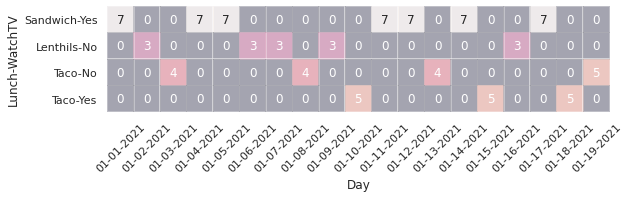

In [32]:
# Pivot data
display(garfield_biometrics_copy.pivot(index='Day', columns='Lunch', values='Lunch Bill').fillna(0).sample(5))

# Display heatmap too
import matplotlib.pyplot as plt
ax = sns.heatmap(labeled_garfield_data.set_index(pd.to_datetime(labeled_garfield_data.Day)).pivot(columns=['Lunch', 'WatchTV'], values='Lunch Bill').\
          fillna(0).round().T, annot=True, linewidth=0.5, cbar=False, square=True, alpha=0.3)
ax.set_xticklabels(pd.to_datetime(labeled_garfield_data.Day).dt.strftime('%m-%d-%Y'))
plt.xticks(rotation=45)
pass

<a id='types'></a>
# Converting to Numerical Matrix

Exclude ID attributes, leakage attributes and include only numerical, temporal, spatial, ordinal, and categorical attributes. Also encode labels accordingly.


In [33]:
# Leave out date attribute
garfield_data = garfield_biometrics_copy.set_index(pd.to_datetime(garfield_biometrics_copy.Day)).drop('Day', axis=1)
# Fix the DayOfWeek too
garfield_data['DayOfWeek'] = list(map(lambda x: x.strftime('%A'), garfield_data.index))
# show preview
display(garfield_data.head(4))

Breakfast  9AM  10AM  11AM     Lunch  Lunch Bill  1PM  2PM  3PM  \
Day                                                                          
2021-01-01    Coffee    6     6     0  Sandwich        7.35    9    8    5   
2021-01-02  Doughnut    2     5     5  Lenthils        3.02    3    4    3   
2021-01-03    Coffee    7    10     9      Taco        4.50    0    4    3   
2021-01-04    Coffee    9     7     8  Sandwich        7.35    2    6    2   

           Post Siesta  5PM Commute DayOfWeek WatchTV  
Day                                                    
2021-01-01         Tea    2    Long    Friday     Yes  
2021-01-02    Pingpong    0   Short  Saturday      No  
2021-01-03    Pingpong    7   Short    Sunday      No  
2021-01-04    Pingpong    5   Short    Monday     Yes

In [34]:
# Most handy function
garfield_numerical_data = pd.get_dummies(garfield_data)
display(garfield_numerical_data.head(5))

9AM  10AM  11AM  Lunch Bill  1PM  2PM  3PM  5PM  Breakfast_Coffee  \
Day                                                                             
2021-01-01    6     6     0        7.35    9    8    5    2                 1   
2021-01-02    2     5     5        3.02    3    4    3    0                 0   
2021-01-03    7    10     9        4.50    0    4    3    7                 1   
2021-01-04    9     7     8        7.35    2    6    2    5                 1   
2021-01-05    3    10     3        7.35    0    7    6    7                 0   

            Breakfast_Doughnut  ...  Commute_Short  DayOfWeek_Friday  \
Day                             ...                                    
2021-01-01                   0  ...              0                 1   
2021-01-02                   1  ...              1                 0   
2021-01-03                   0  ...              1                 0   
2021-01-04                   0  ...              1                 0   
2021-01-05                   1  ...              0                 0   

            DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  \
Day                                                                  
2021-01-01                 0                   0                 0   
2021-01-02                 0                   1                 0   
2021-01-03                 0                   0                 1   
2021-01-04                 1                   0                 0   
2021-01-05                 0                   0                 0   

            DayOfWeek_Thursday  DayOfWeek_Tuesday  DayOfWeek_Wednesday  \
Day                                                                      
2021-01-01                   0                  0                    0   
2021-01-02                   0                  0                    0   
2021-01-03                   0                  0                    0   
2021-01-04                   0                  0                    0   
2021-01-05                   0                  1                    0   

            WatchTV_No  WatchTV_Yes  
Day                                  
2021-01-01           0            1  
2021-01-02           1            0  
2021-01-03           1            0  
2021-01-04           0            1  
2021-01-05           0            1  

[5 rows x 29 columns]

<a id='leading'></a>
# Leading Indicators

Compute quickly correlation coefficients to determine if moving one has any bearing on the output.




 - **Correlated Factors**

> 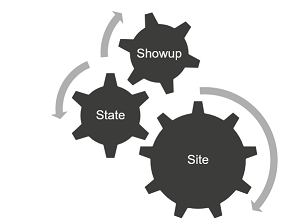

 - **Uncorrelated Factors**

> 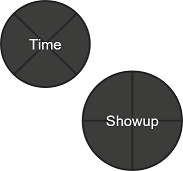

In [35]:
(labeled_data, scoring_data) = (garfield_numerical_data[:19], garfield_numerical_data[19:])

# Develop a handy function to select input attributes
input_data = lambda df: df[[col for col in df.columns if 'WatchTV' not in col]]
label_data = lambda df: df.WatchTV_Yes
# Display preview
display(input_data(labeled_data).head(3))

9AM  10AM  11AM  Lunch Bill  1PM  2PM  3PM  5PM  Breakfast_Coffee  \
Day                                                                             
2021-01-01    6     6     0        7.35    9    8    5    2                 1   
2021-01-02    2     5     5        3.02    3    4    3    0                 0   
2021-01-03    7    10     9        4.50    0    4    3    7                 1   

            Breakfast_Doughnut  ...  Post Siesta_Workout  Commute_Long  \
Day                             ...                                      
2021-01-01                   0  ...                    0             1   
2021-01-02                   1  ...                    0             0   
2021-01-03                   0  ...                    0             0   

            Commute_Short  DayOfWeek_Friday  DayOfWeek_Monday  \
Day                                                             
2021-01-01              0                 1                 0   
2021-01-02              1                 0                 0   
2021-01-03              1                 0                 0   

            DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
Day                                                                    
2021-01-01                   0                 0                   0   
2021-01-02                   1                 0                   0   
2021-01-03                   0                 1                   0   

            DayOfWeek_Tuesday  DayOfWeek_Wednesday  
Day                                                 
2021-01-01                  0                    0  
2021-01-02                  0                    0  
2021-01-03                  0                    0  

[3 rows x 27 columns]

# Simple Pearson Correlation

Compute correlation **vector** between label and input attributes (direction & magnitude of change)

In [36]:
corr_scores = input_data(labeled_data).corrwith(label_data(labeled_data)).to_frame('Correlation')
# Project a score for absolute score -- positive & negative are both indicative
corr_scores['Abs Correlation'] = corr_scores['Correlation'].apply(abs)
corr_scores = corr_scores.sort_values('Abs Correlation', ascending=False)
display(corr_scores.head(100))

Correlation  Abs Correlation
Lunch Bill               0.821853         0.821853
Lunch_Sandwich           0.724569         0.724569
Lunch_Lenthils          -0.629941         0.629941
Commute_Short           -0.566947         0.566947
Commute_Long             0.566947         0.566947
DayOfWeek_Saturday      -0.456435         0.456435
DayOfWeek_Monday         0.410792         0.410792
Post Siesta_Pingpong    -0.368035         0.368035
DayOfWeek_Wednesday     -0.361551         0.361551
Post Siesta_Workout      0.231341         0.231341
Post Siesta_Tea          0.231341         0.231341
11AM                    -0.211628         0.211628
Breakfast_Doughnut       0.190964         0.190964
Breakfast_Sandwich      -0.151186         0.151186
Lunch_Taco              -0.149514         0.149514
DayOfWeek_Tuesday        0.121716         0.121716
DayOfWeek_Friday         0.121716         0.121716
DayOfWeek_Sunday         0.121716         0.121716
10AM                     0.096233         0.096233
5PM                     -0.085689         0.085689
9AM                     -0.082154         0.082154
3PM                     -0.072357         0.072357
1PM                     -0.062198         0.062198
Breakfast_Coffee        -0.044947         0.044947
2PM                      0.043470         0.043470
Post Siesta_Coffee      -0.027217         0.027217
DayOfWeek_Thursday      -0.018078         0.018078

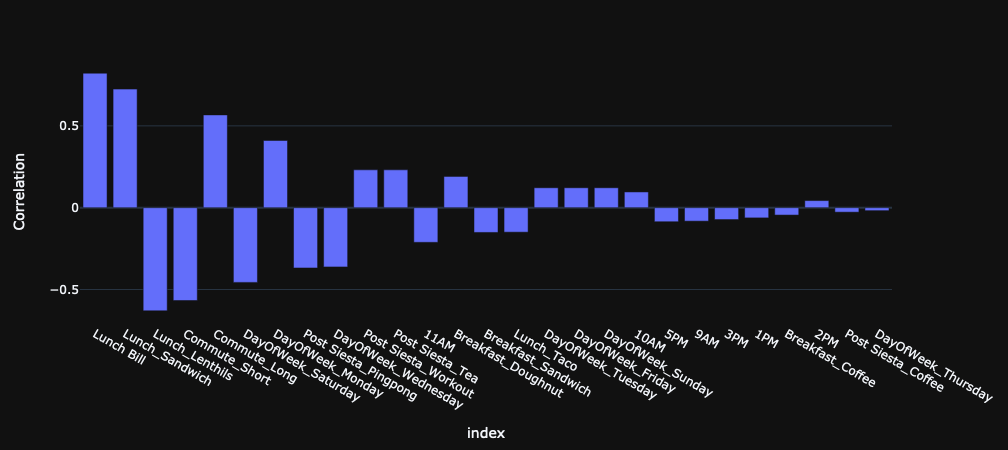

In [37]:
import plotly.express as px
fig = px.bar(corr_scores, x=corr_scores.index, y='Correlation', template='plotly_dark')
fig.show()

# Heart Disease Data

Remember we picked the heart disease [data](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) for MVM.

In [38]:
import pandas as pd
cardio_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1Sg6_70n13RF1feOykQYg1pepRXVg6FS8', sep=';')
cardio_data

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

# What do we know?

What leading indicators can be gleaned to predict the cardio disease?

id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.238159  0.008109 -0.010821  0.181660  0.054475   

                ap_lo  cholesterol      gluc     smoke      alco    active  \
id          -0.002529     0.006106  0.002467 -0.003699  0.001210  0.003755   
age          0.017647     0.154424  0.098703 -0.047633 -0.029723 -0.009927   
gender       0.015254    -0.035821 -0.020491  0.338135  0.170966  0.005866   
height       0.006150    -0.050226 -0.018595  0.187989  0.094419 -0.006570   
weight       0.043710     0.141768  0.106857  0.067780  0.067113 -0.016867   
ap_hi        0.016086     0.023778  0.011841 -0.000922  0.001408 -0.000033   
ap_lo        1.000000     0.024019  0.010806  0.005186  0.010601  0.004780   
cholesterol  0.024019     1.000000  0.451578  0.010354  0.035760  0.009911   
gluc         0.010806     0.451578  1.000000 -0.004756  0.011246 -0.006770   
smoke        0.005186     0.010354 -0.004756  1.000000  0.340094  0.025858   
alco         0.010601     0.035760  0.011246  0.340094  1.000000  0.025476   
active       0.004780     0.009911 -0.006770  0.025858  0.025476  1.000000   
cardio       0.065719     0.221147  0.089307 -0.015486 -0.007330 -0.035653   

               cardio  
id           0.003799  
age          0.238159  
gender       0.008109  
height      -0.010821  
weight       0.181660  
ap_hi        0.054475  
ap_lo        0.065719  
cholesterol  0.221147  
gluc         0.089307  
smoke       -0.015486  
alco        -0.007330  
active      -0.035653  
cardio       1.000000

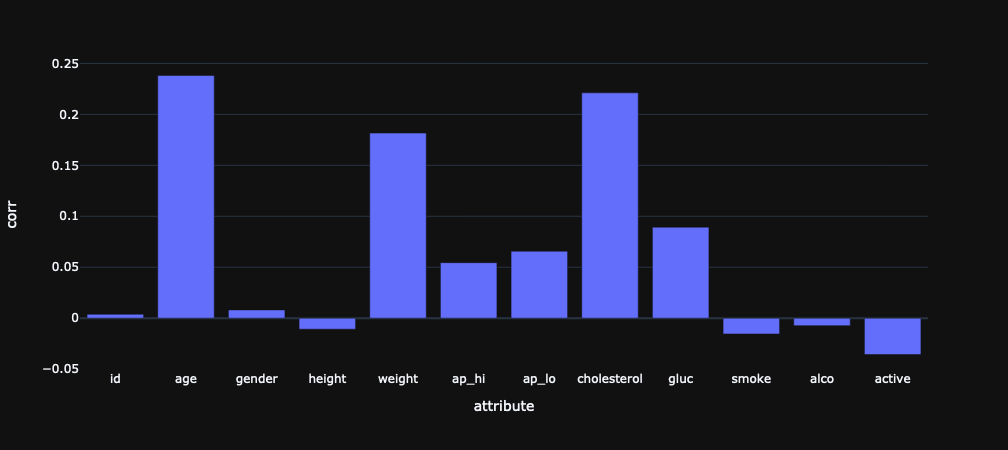

In [39]:
display(pd.get_dummies(cardio_data).corr())

# Find leading indicators
corr = pd.get_dummies(cardio_data).corr().cardio.to_frame('corr')
corr['attribute'] = corr.index
fig = px.bar(corr[corr.attribute != 'cardio'], x='attribute', y='corr', template='plotly_dark')
fig.show()

# <a id='covid'>COVID-19</a>

John Hopkins makes COVID data available daily. We visualize cluster heatmaps of COVID in the US over last six months.

Use inline bash magic to download daily CSV data.

In [40]:
%%bash
rm -rf covid_data
mkdir covid_data
cd covid_data
git init
git sparse-checkout init
git config core.sparseCheckout true
git remote add origin https://github.com/CSSEGISandData/COVID-19.git
git fetch --depth=1 origin master
echo "csse_covid_19_data/csse_covid_19_daily_reports_us/*" > .git/info/sparse-checkout
git checkout master

Initialized empty Git repository in /home/jovyan/CloudSDK/covid_data/.git/
Branch 'master' set up to track remote branch 'master' from 'origin'.


From https://github.com/CSSEGISandData/COVID-19
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
Already on 'master'


# Collate

Collate data together temporally and compute active, tested, confirmed, recovered cases in the US.

In [41]:
import pandas as pd, glob, os

def build_pd(tm, file):
    pdf = pd.read_csv(file)
    pdf['Date_'] = tm
    return pdf

covid_us_data = pd.concat([build_pd(pd.to_datetime(os.path.basename(os.path.splitext(filename)[0])), filename) \
                           for filename in glob.glob('covid_data/*/*/*.csv')]).fillna(0).sort_values(['UID', 'Date_'])
covid_us_data['Active'] = covid_us_data['Confirmed'] - covid_us_data['Recovered']
covid_us_data['Active'] = covid_us_data['Active'].fillna(0).apply(lambda x: x if x > 0 else 0)    
covid_us_data = covid_us_data.set_index(pd.to_datetime(covid_us_data.Date_))

display(covid_us_data)

Province_State Country_Region          Last_Update     Lat  \
Date_                                                                    
2020-04-12  American Samoa             US                    0 -14.271   
2020-04-13  American Samoa             US                    0 -14.271   
2020-04-14  American Samoa             US                    0 -14.271   
2020-04-15  American Samoa             US                    0 -14.271   
2020-04-16  American Samoa             US                    0 -14.271   
...                    ...            ...                  ...     ...   
2021-02-20  Grand Princess             US  2021-02-21 05:30:53   0.000   
2021-02-21  Grand Princess             US  2021-02-22 05:30:43   0.000   
2021-02-22  Grand Princess             US  2021-02-23 05:30:53   0.000   
2021-02-23  Grand Princess             US  2021-02-24 05:31:21   0.000   
2021-02-24  Grand Princess             US  2021-02-25 05:31:00   0.000   

               Long_  Confirmed  Deaths  Recovered  Active     FIPS  ...  \
Date_                                                                ...   
2020-04-12 -170.1322          0       0        0.0     0.0     60.0  ...   
2020-04-13 -170.1320          0       0        0.0     0.0     60.0  ...   
2020-04-14 -170.1320          0       0        0.0     0.0     60.0  ...   
2020-04-15 -170.1320          0       0        0.0     0.0     60.0  ...   
2020-04-16 -170.1320          0       0        0.0     0.0     60.0  ...   
...              ...        ...     ...        ...     ...      ...  ...   
2021-02-20    0.0000        103       3        0.0   103.0  99999.0  ...   
2021-02-21    0.0000        103       3        0.0   103.0  99999.0  ...   
2021-02-22    0.0000        103       3        0.0   103.0  99999.0  ...   
2021-02-23    0.0000        103       3        0.0   103.0  99999.0  ...   
2021-02-24    0.0000        103       3        0.0   103.0  99999.0  ...   

            People_Tested  People_Hospitalized  Mortality_Rate         UID  \
Date_                                                                        
2020-04-12            3.0                  0.0             0.0        16.0   
2020-04-13            3.0                  0.0             0.0        16.0   
2020-04-14            3.0                  0.0             0.0        16.0   
2020-04-15            3.0                  0.0             0.0        16.0   
2020-04-16            3.0                  0.0             0.0        16.0   
...                   ...                  ...             ...         ...   
2021-02-20            0.0                  0.0             0.0  84099999.0   
2021-02-21            0.0                  0.0             0.0  84099999.0   
2021-02-22            0.0                  0.0             0.0  84099999.0   
2021-02-23            0.0                  0.0             0.0  84099999.0   
2021-02-24            0.0                  0.0             0.0  84099999.0   

            ISO3 Testing_Rate  Hospitalization_Rate      Date_  \
Date_                                                            
2020-04-12   ASM     5.391708                   0.0 2020-04-12   
2020-04-13   ASM     5.391708                   0.0 2020-04-13   
2020-04-14   ASM     5.391708                   0.0 2020-04-14   
2020-04-15   ASM     5.391708                   0.0 2020-04-15   
2020-04-16   ASM     5.391708                   0.0 2020-04-16   
...          ...          ...                   ...        ...   
2021-02-20   USA     0.000000                   0.0 2021-02-20   
2021-02-21   USA     0.000000                   0.0 2021-02-21   
2021-02-22   USA     0.000000                   0.0 2021-02-22   
2021-02-23   USA     0.000000                   0.0 2021-02-23   
2021-02-24   USA     0.000000                   0.0 2021-02-24   

           Total_Test_Results  Case_Fatality_Ratio  
Date_                                               
2020-04-12                0.0             0.000000  
2020-04-13                0

Ensure we rollup the weekly data and align to Monday

In [42]:
weekly_covid_data = covid_us_data.groupby(['Province_State', 'Lat', 'Long_']).resample('W-MON').agg({'Confirmed':sum, 'Deaths':sum,	'Recovered':sum, 'Active':sum})
display(weekly_covid_data)

# Flatten to make it weekly data; ready for plotting
plot_data = weekly_covid_data.reset_index()
display(plot_data)

Confirmed  Deaths  Recovered  \
Province_State Lat     Long_     Date_                                      
Alabama        32.3182 -86.9023  2020-04-13       7537     192        0.0   
                                 2020-04-20      32299     986        0.0   
                                 2020-04-27      42457    1446        0.0   
                                 2020-05-04      52306    1935        0.0   
                                 2020-05-11      65805    2596        0.0   
...                                                ...     ...        ...   
Wyoming        42.7560 -107.3025 2021-02-01     361313    4172   348284.0   
                                 2021-02-08     367489    4368   355956.0   
                                 2021-02-15     371127    4529   361042.0   
                                 2021-02-22     375393    4634   365704.0   
                                 2021-03-01     107932    1342   105347.0   

                                              Active  
Province_State Lat     Long_     Date_                
Alabama        32.3182 -86.9023  2020-04-13   7537.0  
                                 2020-04-20  32299.0  
                                 2020-04-27  42457.0  
                                 2020-05-04  52306.0  
                                 2020-05-11  65805.0  
...                                              ...  
Wyoming        42.7560 -107.3025 2021-02-01  13029.0  
                                 2021-02-08  11533.0  
                                 2021-02-15  10085.0  
                                 2021-02-22   9689.0  
                                 2021-03-01   2585.0  

[2784 rows x 4 columns]

Province_State      Lat     Long_      Date_  Confirmed  Deaths  \
0           Alabama  32.3182  -86.9023 2020-04-13       7537     192   
1           Alabama  32.3182  -86.9023 2020-04-20      32299     986   
2           Alabama  32.3182  -86.9023 2020-04-27      42457    1446   
3           Alabama  32.3182  -86.9023 2020-05-04      52306    1935   
4           Alabama  32.3182  -86.9023 2020-05-11      65805    2596   
...             ...      ...       ...        ...        ...     ...   
2779        Wyoming  42.7560 -107.3025 2021-02-01     361313    4172   
2780        Wyoming  42.7560 -107.3025 2021-02-08     367489    4368   
2781        Wyoming  42.7560 -107.3025 2021-02-15     371127    4529   
2782        Wyoming  42.7560 -107.3025 2021-02-22     375393    4634   
2783        Wyoming  42.7560 -107.3025 2021-03-01     107932    1342   

      Recovered   Active  
0           0.0   7537.0  
1           0.0  32299.0  
2           0.0  42457.0  
3           0.0  52306.0  
4           0.0  65805.0  
...         ...      ...  
2779   348284.0  13029.0  
2780   355956.0  11533.0  
2781   361042.0  10085.0  
2782   365704.0   9689.0  
2783   105347.0   2585.0  

[2784 rows x 8 columns]

In [43]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoibmVkYWxhIiwiYSI6ImNrNzgwenQ5dTBkb3kzbG81dmZsZHk3eGYifQ.nrm4JOJ4OXnJboItkKNp7A")

# Plot COVID Geomap

Animate Weekly Progression


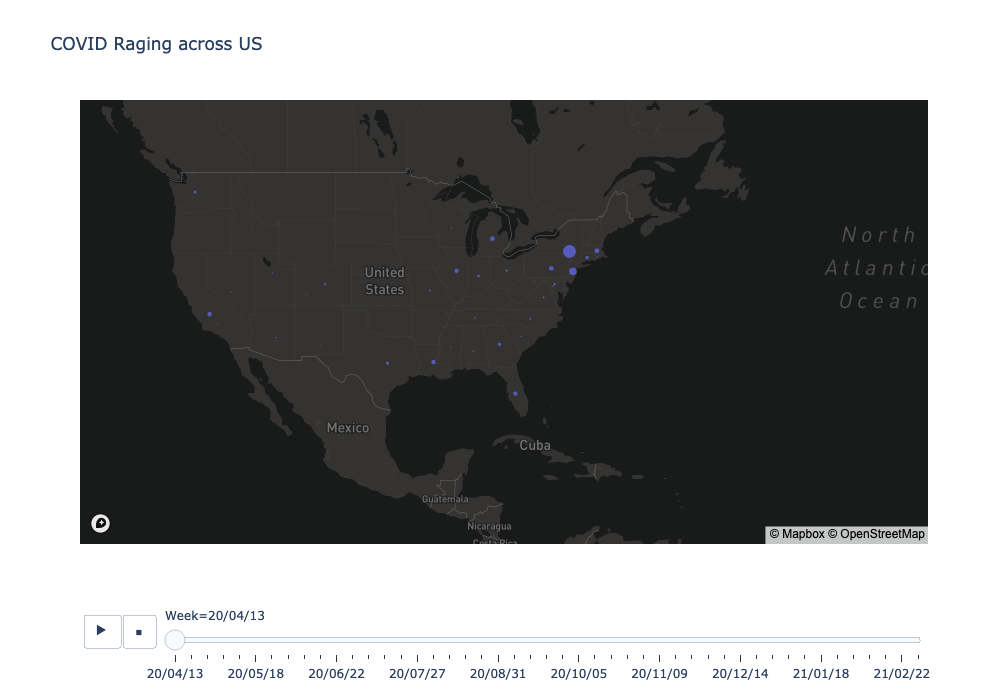

In [44]:
plot_data['Week'] = plot_data['Date_'].apply(lambda x: x.strftime('%y/%m/%d'))
fig = px.scatter_mapbox(plot_data.sort_values('Week'), lat="Lat", lon="Long_", animation_frame = 'Week', animation_group = 'Province_State', 
                        size="Active", color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=80, zoom=2.5, hover_name='Province_State', hover_data = ['Active', 'Confirmed', 'Recovered', 'Deaths'], 
                        title = 'COVID Raging across US', height=700)
fig.update_layout(mapbox_style="dark")
fig.show()

<a id='logreg'></a>
# First Garfield Model
Model Garfield TVitcharoo Bot using simple logistic regression. [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is similar to [linear regression](https://en.wikipedia.org/wiki/Linear_regression), but instead of predicting a continuous output, it classifies training examples by a set of categories or labels. For example, linear regression on a set of electoral surveys may be used to predict candidate's electoral votes, but logistic regression could be used to predict presidential elect. Logistic regression predicts classes, not numeric magnitude. It can easily be used to predict multiclass problems where there are more than two label categories. 

In [45]:
# Training and scoring data
(labeled_data, scoring_data) = (garfield_numerical_data[:19], garfield_numerical_data[19:])
# Collect input 
input_data = lambda df: df[[col for col in df.columns if 'WatchTV' not in col]]
# Collect output
label_data = lambda df: df.WatchTV_Yes

X = input_data(labeled_data)
y = label_data(labeled_data)

# Display so we can see label data and input data
display(pd.concat([X.head(3), y.head(3).to_frame('WatchTV_Yes')], axis=1))

# Build a model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, y)
clf

9AM  10AM  11AM  Lunch Bill  1PM  2PM  3PM  5PM  Breakfast_Coffee  \
Day                                                                             
2021-01-01    6     6     0        7.35    9    8    5    2                 1   
2021-01-02    2     5     5        3.02    3    4    3    0                 0   
2021-01-03    7    10     9        4.50    0    4    3    7                 1   

            Breakfast_Doughnut  ...  Commute_Long  Commute_Short  \
Day                             ...                                
2021-01-01                   0  ...             1              0   
2021-01-02                   1  ...             0              1   
2021-01-03                   0  ...             0              1   

            DayOfWeek_Friday  DayOfWeek_Monday  DayOfWeek_Saturday  \
Day                                                                  
2021-01-01                 1                 0                   0   
2021-01-02                 0                 0                   1   
2021-01-03                 0                 0                   0   

            DayOfWeek_Sunday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
Day                                                                   
2021-01-01                 0                   0                  0   
2021-01-02                 0                   0                  0   
2021-01-03                 1                   0                  0   

            DayOfWeek_Wednesday  WatchTV_Yes  
Day                                           
2021-01-01                    0            1  
2021-01-02                    0            0  
2021-01-03                    0            0  

[3 rows x 28 columns]

LogisticRegression()

# Use Model to Predict


In [46]:
# Use model to predict scoring data
display(pd.DataFrame(clf.predict(input_data(scoring_data)), columns=['WatchTV']))
# Also display probabilistic scores
display(pd.DataFrame(clf.predict_proba(input_data(scoring_data)), columns=['WatchTV_Yes_0', 'WatchTV_Yes_1']))

WatchTV
0        1
1        0

WatchTV_Yes_0  WatchTV_Yes_1
0       0.018344       0.981656
1       0.948408       0.051592

# Explaining the Model

Can we explain the model? Logistic Regression is just a linear regression: where a continuous variable is classed into a category based on a [logistic curve](#https://en.wikipedia.org/wiki/Logistic_function).

![Logistic Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/500px-Logistic-curve.svg.png){width=50%}


In [47]:
import itertools
coefficients = list(itertools.chain(clf.intercept_, *clf.coef_))

# Show beta coefficients
beta = pd.DataFrame(coefficients, columns=['β'])
display(beta.head())

# Predict outcome
Xi = lambda i: pd.concat([pd.DataFrame([(1, 'Intercept')], columns=['X', 'Name']).set_index('Name'), 
                input_data(scoring_data).iloc[i].to_frame('X')])
WX = lambda i: pd.concat([beta.reset_index(), Xi(i).reset_index()], axis=1)
display(WX(0).head())

class_prediction = lambda i: (WX(i).β * WX(i).X).sum()

display(scoring_data)
# Output
for i in range(len(scoring_data)):
  print(f'Scoring the sample {i}: {class_prediction(i)}. Garfield watches TV? {class_prediction(i) > 0}')

β
0 -1.524114
1 -0.113571
2  0.060186
3 -0.529752
4  1.353411

index         β       index     X
0     0 -1.524114   Intercept  1.00
1     1 -0.113571         9AM  6.00
2     2  0.060186        10AM  0.00
3     3 -0.529752        11AM  2.00
4     4  1.353411  Lunch Bill  7.35

9AM  10AM  11AM  Lunch Bill  1PM  2PM  3PM  5PM  Breakfast_Coffee  \
Day                                                                             
2021-01-20    6     0     2        7.35    6    7    4    6                 1   
2021-01-21    9     9     3        2.79    6    9    4    9                 1   

            Breakfast_Doughnut  ...  Commute_Short  DayOfWeek_Friday  \
Day                             ...                                    
2021-01-20                   0  ...              1                 0   
2021-01-21                   0  ...              0                 0   

            DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  \
Day                                                                  
2021-01-20                 0                   0                 0   
2021-01-21                 0                   0                 0   

            DayOfWeek_Thursday  DayOfWeek_Tuesday  DayOfWeek_Wednesday  \
Day                                                                      
2021-01-20                   0                  0                    1   
2021-01-21                   1                  0                    0   

            WatchTV_No  WatchTV_Yes  
Day                                  
2021-01-20           0            0  
2021-01-21           0            0  

[2 rows x 29 columns]

Scoring the sample 0: 3.979943652693081. Garfield watches TV? True
Scoring the sample 1: -2.911408678641244. Garfield watches TV? False


# <a id='bayes'>Naive Bayes Model</a>

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

In [48]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X, y)
nb_clf

GaussianNB()

In [49]:
nb_clf.predict(input_data(scoring_data))

array([1, 1], dtype=uint8)

# Standard Scaling

What went wrong? Remember Bayesian models make assumptions about prior probabilities. In our case, we assumed our data followed "Gaussian" distribution, but remember the one hot encoding uses 0 and 1 (bimodal encoding) of features. NB classifier is a parametric model.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Normalize into a Gaussian bell curve
scaler.fit(input_data(labeled_data))
# Pretty print
Xstd = pd.DataFrame(scaler.transform(input_data(labeled_data)), columns=input_data(labeled_data).columns)
display(Xstd.head())

9AM      10AM      11AM  Lunch Bill       1PM       2PM       3PM  \
0  0.339728 -0.132525 -1.793267    1.210436  1.007429  1.216559  0.366103   
1 -1.179057 -0.412300  0.058476   -1.240525 -0.633241 -0.350534 -0.503392   
2  0.719425  0.986575  1.539870   -0.402783 -1.453576 -0.350534 -0.503392   
3  1.478817  0.147250  1.169522    1.210436 -0.906686  0.433013 -0.938139   
4 -0.799361  0.986575 -0.682221    1.210436 -1.453576  0.824786  0.800850   

        5PM  Breakfast_Coffee  Breakfast_Doughnut  ...  Post Siesta_Workout  \
0 -0.954296          1.172604           -0.679366  ...            -0.516398   
1 -1.625838         -0.852803            1.471960  ...            -0.516398   
2  0.724558          1.172604           -0.679366  ...            -0.516398   
3  0.053016          1.172604           -0.679366  ...            -0.516398   
4  0.724558         -0.852803            1.471960  ...            -0.516398   

   Commute_Long  Commute_Short  DayOfWeek_Friday  DayOfWeek_Monday  \
0      1.673320      -1.673320          2.309401         -0.433013   
1     -0.597614       0.597614         -0.433013         -0.433013   
2     -0.597614       0.597614         -0.433013         -0.433013   
3     -0.597614       0.597614         -0.433013          2.309401   
4      1.673320      -1.673320         -0.433013         -0.433013   

   DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0           -0.433013         -0.433013           -0.342997   
1            2.309401         -0.433013           -0.342997   
2           -0.433013          2.309401           -0.342997   
3           -0.433013         -0.433013           -0.342997   
4           -0.433013         -0.433013           -0.342997   

   DayOfWeek_Tuesday  DayOfWeek_Wednesday  
0          -0.433013            -0.342997  
1          -0.433013            -0.342997  
2          -0.433013            -0.342997  
3          -0.433013            -0.342997  
4           2.309401            -0.342997  

[5 rows x 27 columns]

In [51]:
# Also display probabilistic scores
display(pd.DataFrame(GaussianNB().fit(Xstd, y).\
                     predict_proba(scaler.transform(input_data(scoring_data))), \
                     columns=['WatchTV_Yes_0', 'WatchTV_Yes_1']))

WatchTV_Yes_0  WatchTV_Yes_1
0            1.0            0.0
1            0.0            1.0

# <a id='knn'>K Nearest Neighbor</a>

The principle behind nearest neighbor methods is to find a predefined number of training samples (K) closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning).

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5).fit(X,y)
# Use model to predict scoring data
display(pd.DataFrame(neigh.predict(input_data(scoring_data)), columns=['WatchTV']))
# Also display probabilistic scores
display(pd.DataFrame(neigh.predict_proba(input_data(scoring_data)), columns=['WatchTV_No', 'WatchTV_Yes']))

WatchTV
0        1
1        0

WatchTV_No  WatchTV_Yes
0         0.4          0.6
1         0.6          0.4

# <a id='dtree'>Decision Trees</a>, <a id='forest'>Random Forest Methods<a>

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification: very similar to 20 questions game where the response can only be a yes/no. Random forests are an example of an ensemble learner built on decision trees. Ensemble methods rely on aggregating the results of an ensemble of simpler estimators. The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
# Use model to predict scoring data
display(pd.DataFrame(tree.predict(input_data(scoring_data)), columns=['WatchTV']))
# Also display probabilistic scores
display(pd.DataFrame(tree.predict_proba(input_data(scoring_data)), columns=['WatchTV_Yes_0', 'WatchTV_Yes_1']))

WatchTV
0        1
1        0

WatchTV_Yes_0  WatchTV_Yes_1
0            0.0            1.0
1            1.0            0.0

# Visualizing the Decision Tree

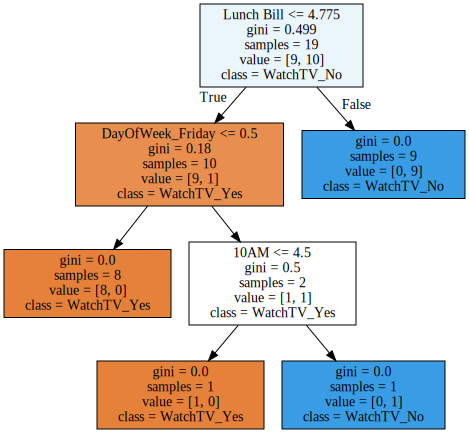

In [54]:
import graphviz
from sklearn import tree as dtree
dot_data = dtree.export_graphviz(tree, out_file=None, 
                                feature_names=input_data(labeled_data).columns,  
                                class_names=['WatchTV_Yes', 'WatchTV_No'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [55]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(tree, n_estimators=20, max_samples=0.7, random_state=1)
bag.fit(X, y)
# Use model to predict scoring data
display(pd.DataFrame(bag.predict(input_data(scoring_data)), columns=['WatchTV']))
# Also display probabilistic scores
display(pd.DataFrame(bag.predict_proba(input_data(scoring_data)), columns=['WatchTV_Yes_0', 'WatchTV_Yes_1']))

WatchTV
0        1
1        0

WatchTV_Yes_0  WatchTV_Yes_1
0           0.00           1.00
1           0.95           0.05

We have randomized the data by fitting each estimator with a random subset of 70% of the training points. In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. In Scikit-Learn, an optimized ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator, which takes care of all the randomization automatically.

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

rfclf.fit(X, y)
# Use model to predict scoring data
display(pd.DataFrame(rfclf.predict(input_data(scoring_data)), columns=['WatchTV']))
# Also display probabilistic scores
display(pd.DataFrame(rfclf.predict_proba(input_data(scoring_data)), columns=['WatchTV_Yes_0', 'WatchTV_Yes_1']))

WatchTV
0        1
1        0

WatchTV_Yes_0  WatchTV_Yes_1
0           0.20           0.80
1           0.63           0.37

# <a id='boost'>Gradient Boosted Methods</a>

Bagging -- bootstrap aggregation: where all points are randomly selected -- aka without replacement. When we select a few observations more than others due to their difficulty in separating classes (and reward those trees that handle better), we are applying boosting methods. Bossting works by weighting the observations, putting more weight on difficult to classify instances and less on those already handled well. New weak learners are added sequentially that focus their training on the more difficult patterns. This means that samples that are difficult to classify receive increasing larger weights until the algorithm identifies a model that correctly classifies these samples. Replacement is allowed in boosting methods.

> <img src="https://quantdare.com/wp-content/uploads/2016/04/bb2.png" width=400/>

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)

gbc.fit(X, y)
# Use model to predict scoring data
display(pd.DataFrame(gbc.predict(input_data(scoring_data)), columns=['WatchTV']))
# Also display probabilistic scores
display(pd.DataFrame(gbc.predict_proba(input_data(scoring_data)), columns=['WatchTV_No', 'WatchTV_Yes']))

WatchTV
0        1
1        0

WatchTV_No  WatchTV_Yes
0    0.000021     0.999979
1    0.999949     0.000051

# <a id='xgboost'>XGBoost</a>

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost stands for e**X**treme **G**radient **B**oosting.

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, y)
# Use model to predict scoring data
display(pd.DataFrame(xgb.predict(input_data(scoring_data)), columns=['WatchTV']))
# Also display probabilistic scores
display(pd.DataFrame(xgb.predict_proba(input_data(scoring_data)), columns=['WatchTV_No', 'WatchTV_Yes']))

[05:11:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



WatchTV
0        1
1        0

WatchTV_No  WatchTV_Yes
0    0.069705     0.930295
1    0.854946     0.145054

# <a id='svm'>Support Vector Machines</a>

Consider the simple case of a classification task, in which the two classes of points are well separated. While presumably any line that separates the points is decent enough, the dividing line that maximizes the margin between the two sets of points closest to the confusion edge is perhaps the best. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. Support Vector Machines (SVMs) are parametric classification methods.

<table><tr>
<td><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeYAAAFVCAYAAAA6zUwUAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzt3XdAU+fCBvAnIYMpIiBuBNw4GG7EDYqjdWEFXNX21u7b%0A2qG1rXZpvw5vb1vt1Wprxb1X3YrWPXDvPYqKLGWGEHK+P1AqEhBCyDlJnt9/vichz8tRn+TknPfI%0ABEEQQERERJIgFzsAERER/YPFTEREJCEsZiIiIglhMRMREUkIi5mIiEhCWMxEREQSojD2ibNnz8bO%0AnTuRl5eH6OhoDB482JS5iIiIbJJRxXz48GEcP34cS5YsQXZ2Nn777TdT5yIiIrJJMmMWGJk+fTpk%0AMhkuX76MrKwsfPDBB/D396+MfERERDbFqE/MaWlpuHPnDmbNmoXbt2/j1VdfxebNm02djYiIyOYY%0AVcxVq1aFn58fFAoFfHx8oFarkZqaimrVqpX4HEEQIJPJjA5KRERkC4wq5uDgYMTGxmL06NFITEyE%0ARqOBm5tbqc+RyWRISsowKqRUeHq6WPwcAM5DSqxhDoB1zMMa5gBYxzysYQ5AwTyMYVQxd+3aFUeP%0AHsWQIUMgCAImT57MT8NEREQmYPTlUu+9954pcxARERG4wAgREZGksJiJiIgkhMVMREQkISxmIiIi%0ACWExExERSQiLmYiISEJYzERERBLCYiYiIpIQFjMREZGEsJiJiIgkhMVMREQkISxmIiIiCWExExER%0ASQiLmYiISEJYzERERBJi9P2YSboEQcD+lcug2boZdjnZ0DTzR8fX3kIV16piRyMiomdgMVuhDR+9%0Ajz7z5qJGfj4AIH/LJizcsR1tFy6Hu5eXyOmIiKg0PJRtZS6fPI7WixcWljIA2AEYceoEDv/wrXjB%0AiIioTFjMVubGhvVomZ1VbFwGwPH4MfMHIiKicmExWxs7OYQSNunt7MwahYiIyo/FbGWaRA7DYVfX%0AYuP5ADRt2pk/EBERlQuL2crU9WuAq/96DWcdHAvHsgDMDQlF6HsTxAtGRERlwrOyrVDY+xNxJiQU%0Ap9asgjwnG7LAYPQdPgoqlUrsaERE9AwsZivVvGMnNO/YSewYRERUTjyUTUREJCEsZiIiIglhMRMR%0AEUkIi5mIrFZ2djZycnLEjkFULjz5i0hCLhw9hFtLFkH58CFy/Rqg/SuvoapbNbFjWZwr8Udwbfq3%0AqHYiHgLkSGvdGg3fnwif5i3Fjkb0TCxmIonYM2cWfKZ9jpiMDAAFi8Is37gBTeYtRG1fP3HDWZDE%0Av28jZdxLiLl5/Z/BTX9i5aVLcF2/BdU8PMQLR1QGPJRNJAEZGelQz/wRgY9KGSi4+ciwC+dw5tup%0A4gWzQMdnzUTfJ0v5kYFXL+Pw7JkiJCIqHxYzkQQcXrkc4X/fNrjN/ugRCEJJK6DT0+xv34LMwLgc%0AgPrmDTOnISo/FjORBAh6fYnbDJUMlUxbynfy2mruZkxCZBwWM5EEtB0yFNtq1zG4LScoGDIZ67ms%0A6kUPxzEDN3LZ5+6BhiNfFCERUfmwmIkkoEoVV2SPex2nnV0Kx/QAljdqgmbjbe/mI3l5ecjLyzPq%0AuU3atMPtT7/AKr8GyADwEMCKRk3w4PNp8G3azKQ5iSoDz8omkogur7yOsy1bYdHyJVA9TEeOjy/a%0AjnvDps4ivnbyOK5O/xYux49CkMnxMLg1mn4wCd5Nmpbr53QcMRq5Q6OwfdOfkNnZoUOvCN7EhSxG%0AhYp50KBBcHZ2BgDUqVMHU6fy7FGiivDv0An+HWzz5iOJCX8j8ZUXEX3t2j+DG9Zh2aVLcF2/udzX%0Ac6vVanQaMMjEKYkqn9HFrNVqAQDz5883WRgisl3HZs/EiCdL+ZHBly5g8ayZ6DXhYxFSEZmf0d8x%0AX7hwAdnZ2Rg7dixGjx6NkydPmjIXEdkYx5s3DJ6BbgdAbeC6ZCJrZfQnZnt7e4wdOxaRkZG4ceMG%0AXn75ZWzZsgVyOc8nI6Lyy63qZtQ2ImsjE4xcuUCr1UIQBKjVagBAZGQkfv75Z3h5eZk0IBHZhpN7%0A9kDerx9apKcXGT/s7g63nTvRsCXXuSbbYPQn5pUrV+LSpUuYPHkyEhMTkZWVBU9Pz1Kfk5SUUep2%0AqfP0dLH4OQCch5RYwxwA08yjVpMA7J00Gddm/oxeN68jH8AWvwZQvf0efGr6VPrviftCOqxhDkDB%0APIxhdDEPGTIEEydORHR0NORyOaZOncrD2ERUIZ1efBnZL8Rg3brVkNvZoV3/AbC3txc7FpFZGV3M%0ASqUS3333nSmzEBHB0dER3YbFiB2DSDT8iEtERCQhLGYiIiIJ4ZKcVCE6nQ47f/gOyj27YafJQU4z%0Af/i/9jbqNGwkdjQiIovEYiajCYKAta+Mwej1a1B4es7xY1h78AAwfwnLmYjICDyUTUY7uWsnem/Z%0AiKfPmX3+6hWc/eUnUTIREVk6fmJ+Ql5eHvYtnA/9iWPQOTii/tBhaBQYLHYsyUreuxthj9ZMf5rD%0AubNmTkNEZB1YzI9kZmZi64gXEL1vDx5fEn586SLEvfs+ur3xb1GzSZXe3gECYHB9Y52Dg7njEBFZ%0ABR7KfmTPN1Px8hOlDACBmRnw+vm/uPf3bdFySVnAiNHY4Vm92HgOgPzOXc2eh4jIGrCYH3E4fNDg%0AL6NzagpOL1lo9jyWoHqNmsj68GNsq14d+kdj11QqzB8wGN3efEfUbEREloqHsh+R5ecbHgcAnc6s%0AWSxJx5GjkdSrN5bEzoMsJwfVu3bHoNAuYsciIrJYLOZHNAGBwMnjxcZPOLvAr/8AERJZDk+vGgh7%0Ab4LYMYiIrAIPZT8S8PZ4LG7WHE/eAzPRzg7HXoiCr39z0XKRZUpPf4iT+/ci8e4dsaMQkYXhJ+ZH%0AvOrUhXL5WiyY+RPsL5xFvqMj7MN7o9/QaLGj2aSUpCQcnfs/KJPuI79OPbR/6RW4uFQRO9Yz5efn%0AY/MnE1Bzwzq0vHcX11xdcbhzV3T5/kdUqepWpp/x8EEajqxcDrlCgbaDh8LZ2bmSUxORlLCYn1DN%0A0xO9J38udgybd2Z3HLLefQvRt29CDiAPwOqVy1D/f3Ph07yl2PFKtW3q54icMwtOj/5c8+FDdFy/%0AFr/l6fDc/MXPfP6umT/BZdYMRN69Az2ArT9OR/7b76LjyDHlznL75g1kPnyIhs38oVDwnzqRpeCh%0AbJIUQRBw9+sv0e9RKQOAEsDQSxdxaaq03zTpdDo4bf6zsJQfkwEI3Lsb1y+cL/X5p3bHwf+bqeh9%0A9w4UAFQA+t2+hVpfTsFlA+c/lOT6mVPYPOR5ILQtavcMxb6eodj/x9xyzoaIxMJiJkk5dywe7U4c%0AM7it3pFDSElJMXOissvISIfH/USD25plZuLW6ZOlPv/eiqVolp1VbLzNgwe4vrhsl+xpNBpcef0V%0AjPgrDkEaDfwADDl3Fo2mfIJjGzeU6WcQkbhYzCQpeZpsOJRw6Zpam4e8PMNLgEpBlSquSKxV2+C2%0Ak66u8A1uU+rzVQ8flrwtveRtTzoQ+zsGni++HGrTrEykLHv2oXQiEh+LmSTFv20H7GvS1OC2a60C%0A4OVVw8yJys7Ozg55/QcgVVZ0kVIdgNNde6Kur1+pz8/xa1DkqoDH8gBo/RqUKYP+9i2UtBiqOvFe%0AmX4GEYmLZ4SQpCiVSqj+9RpOTZmElunpheP7PKvD49U3IZMZWpm7clw+eRw31q6CTK9HrYh+aNau%0AwzOf03P8h9iUlwendavR4MZ1/O1ZHXe69UDYtO+e+dzW417H6i2bMOjKpSLjy/2bo8O/Xi1TZnm9%0A+sgG4Ghgm6ZmzTL9DCISl0wQBENv0itFUlKGuV6qUnh6ulj8HADLmMfpv3bj7pKFUCUlQlu7DnxH%0AjUGDp+70VZnz2PTFZLT67Ve0ysoEAFy0t8feF2LQ/5vpZXpzkJubizt3EuDh4VHqZV5Pz+HmhfO4%0AOP0b2B87CsjlyAlui5YfTkLN+vXLlFuj0WB3nx4YfuZ0kfGzLi64M3MOAnpFlOnnPCYIAuK3bsGD%0AbZsg0+vh2KUb2vUfALm86ME2S/g79SzWMAfAOuZhDXMACuZhDBZzOVjTXxbOo2Qn4nbAZ+QwNMjN%0ALTKeKJfjwE+zEBL5gsleq6Q5CIJg9NGBmxfO4+yUSWh86ABcs7NxqnkLOIz5FzrEjCzXzxEEAeve%0A+zfCF8ei3qNlaRPlcqx+biAG/DIHdnZ2z5yHJbGGOQDWMQ9rmANgfDHzUDbRU5LWr0XYU6UMAF56%0APTTbNwMmLOaSVOSQvXeTpvBesgp3797Bg8xMdPH1K1KiZXV005/ovWg+6jxxMp6XXo/oNSuxpWMn%0AdB091uiMRFQynvxF9BS5gVJ+zE5T8japqVmzFho0bGRUKQPAw22bi5TyY1UA5O/ZVbFwRFQiFjPR%0AU2SBQSh+NfGjs6NbSHvlMVOSl3DZWsE2fYnbiKhiWMxET+k08kUsCO2CJ2/2KQCIbd0GHce9IVYs%0As1N2CEGqgfFcAPnPuCabiIzH75iJnqJSqdA7dikW//Ad7A8fBPR65AS2Rpd3xtvUDSU6Do3Css0b%0AMXLThsLLr7QA/gjtgoiXx4kZjciqsZiJDHB0dETvjz4VO4ao7Ozs8Pzc+Vg/dxZk+/cCej10rdsi%0A4pXXYW9vb/A5Go0GBxYvgC4lGTU7dkLzjp3MnJrI8rGYiUSQm5uLA4tioU5NRJ5XXXR4IQpKpVLs%0AWMUoFAp0f+V14JXXn/nYs3/twv2J76H/5UtwAHBZrcaqHuHoO+s3qNXqyg/7hPz8fMjlcrMuSENk%0AKixmG3LtzGlcmvM/uN6+gWxHZ6j79EenqOFix7I5N86exqU3XsGAs2fgBCAdwKr5vyFw1m+o5eMr%0AdjyjaLVa3Pt4AoZd/mfVsoa5uai/cT0WT/0MEZ9NNUuOIyuW4eGCeXC8egW5bm7QdOuBHpOmQKVS%0AmeX1iUyBxWwjLh0+iJxxYzHi79uFY3d3bMPmK5fR+5PPRExmey58+hFGnD1T+OcqAEafOIY/Pv0I%0AtWKXiBesAnYvWoR+F84VG1cCcPhrl1kyHF25DPXf/zeaPVqtDYn3kHvhPGLv38fzv8wxSwYiU+BZ%0A2Tbixowf0fOJUgaAmjod6i5egCTe3KCQIAg4tn0rdnz9JXbO/gVZWYYunDLe9SuX0fLIIYPbfA7u%0AR3Jysklfz1xykpJQ0mlxdhnmWcHpwYI//inlR9QAgrZsxLXzxd80EEkVi9lGOJw5ZXC8S3ISTq5Z%0AZeY00pSdnY3VMUPRdFQUhk3/BgM+/hBHe3bCmbgdJnuNzNRUVNNoDG6rmpWJzEzLXIbQv08fxLsY%0AXn4wp3GTSn99QRDgcO2KwW1BmZm4ZqZP7USmwGK2EfoSTr7RAFC62M4lQKXZ/cVkvLR9C+rl5QEo%0A+LQ15OpV3J8yCXmPxiqqcUAgjjRoZHDbuWb+qFfP2ySvY25+/v443u/5YguzHPDwRO2Xy3ZnrIqQ%0AyWTIq1rN4LZEuRwuFvp7JdvEYrYRWe06GLzX70a/Bmg3aKjZ80iRw76/YGjxyr7nz+Hg6pUmeQ2V%0ASgX9yNG4Zl/0rsnnnF3g+OLLxe7aZEn6Tf8Jaz+chGWt22JVo8ZYGNEPuf+bC/+u3c3y+poeYTB0%0ALGJzUDDalPOuWkRi4slfNiLk08/x69UriDy4H24A9AC21qgJ54mflnhNqrXaO38eNOvXQJWcBG09%0Ab3gOH4VWYb2gyMw0+HgnAJqUJJO9fpdxb+Bw9Ro4tHIZnFKTkOlZAx5Rw9Ehoq/JXkMMdnZ2CBv/%0AITD+Q1Fev8fETxCbeA8BWzaiTXo67snl2BwUDP9vf7DoNzxke3jbx3Kw9FuR6XQ67F+2GKrrl5Cu%0AdEDQ6JfgUb262LGMZsz+2PbNVHT97/eo9cSh6ZOurrjzf9ORtnIZordtKfacg65Vod66C3Uq4VIm%0AS/879ZiU5nHz0kVc+isOVevVR+uwXmW+lllKc6gIa5iHNcwBEOm2jykpKRg8eDB+//13+Pj4VORH%0AkRkoFAp0jh5hNX/pyyszMwNVlywoUsoA0OrhQ5z9bTZqvjcB+08cR8ek+4XbHgA4N2Aw+lvo9cW2%0AyLtRY3g3aix2DCKjGV3MOp0OkydPtrnDoGS5TsbtQPe//za4re75c/BsEYD7v87Dgrmz4XDtKvKq%0AVAHCeqPva2+aOSkR2TKji/n//u//EBUVhVmzZpkyD1GlcfXyQopCgSo6XbFtGU7OqOfggKYdO6Ep%0A13cmIhEZdUbEqlWr4O7ujpCQEJjxK2qiCvFv0x57g1oXGxcA3O8QAkdHx+JPIiIyM6NO/ho+fHjh%0ACRUXLlyAj48PfvnlF7i7u5s8IJEpXTx8GKdeegl9T5+GI4BkmQx/hoai77Jl8PDyEjseEVHFz8oe%0AMWIEPv/88zKd/GXpJxxZy0lTtj6Px3d20t1JgFMzf7R7fpBol9PY+r6QEmuYA2Ad87CGOQAinZUN%0AgLdVI4ujVqvR9cWXxI5h0fLy8hD3n2+h/GsX7HKygcAA1HvxFdT3byF2NCKLV+Finj9/vilyEJGF%0AEAQB68aNwej1a1F4TcbpU9i4ew/wxyLUb+YvZjwii8flcIioXE79tQvhWzbh6Qsl+9y8jou//CRK%0AJiJrwiU5iSyMIAjY+fMPwOaNUKemQONdH9ViRiGo//Nmef2kPbvRU6s1uM3BwD2Ziah8WMxEFmbT%0AJxPx3K+/wO3xeZtXr+DMkUM4kpuLNkMq/4YkgrMz8gGDN/zQOTpV+usTWTseyiayIMn376Pu6uX/%0AlPIjzTMy8PCPuWZZVyB4+GhsrVGz2Hg2gPwu3Sr99YmsHYuZyIKc2r4FoUmG73TlcfkSsrKeviOy%0A6VXz8ID+4ynYWLMW8h+NXba3R+zAIej21ruV/vpi0Gg02P7zD4h7cTh2vPIi9ixZyMWVqNLwUDaR%0ABalWpy7u2dmhbn5+sW2ZLi5mW7u+7dAopPUMx9IF8yHLykTTgf0xqEmAWV7b3LKzs7ElJhKj9u2B%0A+tFY8ppVWLlvDwb++AsvGSWT4ydmIgvSKrQL4gwsK6oH8KBTZygU5nuv7VbNHWFvvYOeEz9BQGio%0A2V7X3PbO+C/GPFHKAOAhCIhYuQzHtm8VLRdZLxYzkQWRyWRoPO1bxLZshbRHY9dUKvzaMxxdv/ha%0A1GzWShl/xOChxXo6HdK2F79/N1FF8VA2kYXxbRmAepvjsGv1CmgS/kb1oNYY1Lmr2LGsVymHqgWR%0AlnIl68ZiJpuj1+txZMsmZNy6Cd9OneHr31zsSOWmUCjQKXKY2DFsgq5dB2h3bIPqqfGrKhWq9+4r%0ASiaybny7RzblxtnT2NwvDG1ejEHUJxOg6t8La14ZA20JC2YQdX71TcztHoYnb6nwt50ddkWPQEse%0AqaBKwE/MZDMEQcC5D97BqKNHCscCMzPgv3oFlnp5offn00RMR1KlVqvxfOwSbFkUi/xDB6BXKuHa%0Aqw/6R/TlGdlUKVjMZDOObt+K8PijxcZVAOx37oDwmcD/aMkgpVKJLqPGAKPGiB2FbAAPZZPNSLt5%0AHTX0eoPb1A8fQF/CNiIic2Ixk81o0rUHjri6GtyW5esHOztDqz8TEZkXi5lEkZ+fj8zMTLMua1iv%0AQUOc6t0XOU+Nn3dyhuvw0WbLQURUGn7HTGal0WiwY/JHqLI7DlXS0pDs6weHqBHoOHK0WV6/739+%0AxorqNaDesRWqtFTk+PrBNWaUWe7KRFQavV6PmzdvwNHRCV5eXmLHIRGxmMmsNr8xDqPXrYLy8UB8%0AKq6dPYP9chk6Dh9V6a+vUCjQ+5MpwCdTIAg82Yuk4dCShcieOxtNz5zCQwcHHGvXAc0mfwnvJk3F%0AjkYi4KFsMptrZ8+gzY6t/5TyI76aHGQtXWT2PCxlkoKTO7ai3scfYujJ42iRn4+QzEyM3LEN5197%0ACbm5uWLHIxGwmMlsru7fi4CsTIPbnG5c51nRZJPuL1qAlunpxcYHnzmN/bHzzB+IRMdiJrOp5tsA%0Af5dw96Ncdw/Iue4w2SD13TsGxx0B6G9eN28YkgT+T0hmE9S9B7YFtyk2ng0gNyzc/IGIJEDrVcPg%0AuAaArHYd84YhSWAxk9nIZDIE/Odn/B4SiqsqFXQA9lRzx5LhoxA24ROx4xGJolrkMFxwcio2vqZJ%0AM3QYNVaERCQ2npVNZlWnQUPUXrUBZw4dwJErl+HftTv616krdiwi0QT16Yd9n36B07//irYXzuOB%0AWo1Tbdqh0ZQv4eDgIHY8EgGLmcxOJpOhRfuOQPuOYkchkoSQF19C3vBRuHDqBJxdq6J3g4ZiRyIR%0AsZiJiCRAqVSihYFzMMj28DtmIiIiCWExExERSQiLmYiISEJYzERERBLCk79IsjIzM3Fkw1qonJzQ%0ALqIfFCWsGkZEZE34Px1JUtyMH+H022w8f/sWcgBsbdoMVT/4CIF9nxM7GhFRpeKhbJKcY5v/RMA3%0AU9H39i2oAVQFMPT8OQgT30PinQSx4xERVSoWM0lO6uoVaJSTXWw8/N49nPh9jgiJiIjMh8VMkqNI%0ATTU4LgOgTE0xbxgiIjNjMZPk5Narb3BcAwBcqpCIrJzRxazX6/HRRx8hKioKMTExuHLliilzkQ1r%0ANPZf2FGrdrHxZc1bosPol0RIRERkPkYX886dOyGTybB48WK8/fbbmD59uilzkQ3zaeYP5YxfsbBH%0AGDZ6Vse6WrUw//lBCPhtAe+2Q0RWz+jLpXr27Inu3bsDABISEuDq6mqyUERNQzqhaUgnaDQa2NnZ%0AQalUih2JiMgsZIIgCBX5ARMmTMD27dvx448/omNH3saPiIioIipczACQkpKCyMhIbNy4Efb29iU+%0ALikpo6IvJSpPTxeLnwPAeUiJNcwBsI55WMMcAOuYhzXMASiYhzGM/o557dq1mD17NgBArVZDLpdD%0ALudJ3kRERBVh9HfM4eHhmDhxIoYPHw6dTodJkyZBpVKZMhsREZHNMbqYHRwc8MMPP5gyCxERkc3j%0AsWciIiIJYTETERFJCIuZiIhIQljMREREEsJiJiIikhAWMxERkYSwmImIiCSExUxERCQhLGYiIiIJ%0AYTETERFJCIuZiIhIQljMREREEsJiJiIikhAWMxERkYSwmImIiCSExUxERCQhLGYiIiIJYTETERFJ%0ACIuZiIhIQljMREREEsJiJiIikhAWMxERkYSwmImIiCSExUxERCQhLGYiIiIJYTETERFJCIuZiIhI%0AQljMREREEsJiJiIikhAWMxERkYSwmImIiCSExUxERCQhLGYiIiIJYTETERFJiELsAEREZFv0ej3i%0A4v4DuXwjFIoU5Ob6wt19FAIDnxc7miSwmImIyKw2bnwfgwb9ClfXxyPXcPr0YRw9qkXr1pFiRpME%0Aow5l63Q6fPDBB4iJicHQoUOxc+dOU+ciIhJdfn4+MjMzIAiC2FGsRmJiAnx9Vz1RygVatEhHWtpv%0A4oSSGKM+Ma9btw5ubm745ptv8PDhQwwYMADdu3c3dTYiIlHodDps2zYFTk6b4eqajJSUepDLh6Jr%0A1zfEjmbxzpzZgqFDUwxuc3O7hNzcXAAu5g0lMUYVc0REBHr37g2g4LsChYJHxInIemza9A6iov6A%0Ag8PjkVQkJJxFXJwe3bq9JWY0i+fqWhf37slRq5a+2Lbs7CpQKpUipJIWoxrV4dHf1szMTLz99tt4%0A5513yvQ8T0/LfxdkDXMAOA8psYY5ANYxD09PFyQm3kGjRn8+UcoFatfOg1K5Eu7uEyGXS/uCFinv%0Ai969B2Lp0rYYNuxgkfH8fCA/vye8vAqOcUt5DpVNJhj55cndu3fxxhtvYPjw4Rg4cGCZnpOUlGHM%0AS0mGp6eLxc8B4DykxBrmAFjHPB7PYe/eFQgPHwMnp+KP2bvXBR4ep+Du7m7+gGVkCfvi2rXjuHTp%0ALfTrdxJubsCVK2rs3Nkd4eG/wcnJySLmUBbGvrkw6hNzcnIyxo4di08//RTt27c36oWJiKSoRo3G%0AuHbNAS1a5BTblpzsCR8f2/0kZyq+voGoVy8Ou3atQE7O36hRoy0GDuwsdizJMKqYZ82ahfT0dMyc%0AORMzZsyATCbDnDlzoFKpTJ2PiMisGjRogfXrQ9CixfYi41otkJbWnf/PmYhCoUCnTsPEjiFJRhXz%0ApEmTMGnSJFNnISKShPbtf8bcua8jJGQfGjbU4OhRV5w+HY7evaeJHY1sAE+nJiJ6iqdnLTz33Gqc%0AP38Ux4+fQePGnfD88w3EjkU2gsVMRFSCpk1bo2nT1mLHIBsj7XP+iYiIbAyLmYiISEJYzERERBLC%0AYiYiIpIQFjMREZGEsJiJyCJlZ2fj6NFtuHz5tNhRiEyKxUxEFmfnzu9x8mRHBAcPRtWq3bBpU1/c%0AuMGCJuvA65iJyKLs3x+Ljh2noW5dLQCgenUtmjXbg9jYcahVK45LZpLF4ydmIrIo2dmrCkv5SQMG%0AnMaBA4tESERkWixmIrIoavV9g+MuLkBe3m0zpyEyPR7KJqJiNBoNdu+eDqXyAGQyPTSaQISEvIcq%0AVaqKHQ0aTW0Axb9PTk6WwcGhsfkDEZkYi5mIitDpdPjzzyiMHbsDSmXBmF6/B/PmHUS3bmvg7Ows%0Aaj4PjxE4e3Yf/P0zCscEAVi7ti369h0sYjIi02AxE9mIy5dP4MaNpbCz00Clao8OHYbAzs6u2OP2%0A7YtFTMw/pQwAcjkwcuRhLF36M8LDJ5gxdXGBgf1x8OADnDkzF35+55CW5oyEhBC0b/+1wfmYgyAI%0A+Ouv36HTbYOdnQY5Oc3Qrt2/Ua2apyh5yLKxmIlswI4d36NRo+8RHZ0JAEhO/g3Ll69A//4LoFar%0AizxWpzsMF5fiP0OhAJTK4+aI+0zt24+AIAzH3bt34OvrjIAAV1HzrFv3FgYNmo9q1QQAgCDswKJF%0AuxAYuByenrVEzUaWh8VMZOVu3ryE+vV/QFBQZuGYh4eAsWO3YPny71GjRjskJi6CUpkErbYOkpPT%0AS/xZer29OSKXiUwmQ61atcWOgXPnDqJTp2WFpQwAMhkQHX0aCxdOR69e34mYjiwRi5nIyl28uATR%0A0Q+LjavmoKsWAAAYo0lEQVRUQHb2cnh5zUCPHv98X7t7txvWrVPgued0RR6fnCyDUtmz0vNamoSE%0ATejSJafYuEwG2NtL4wgDWRZeLkVk5eRyLWSykrYloHnzjCJjXbqk4fZtL5w65Vg4dvWqCqtXj0Bo%0A6PDKjGqRBEEBQShpm9LwBqJS8BMzkZWrXj0cV67MQoMGuUXGBQFQKjUGnxMQ8BC3bi3A2bO7AOSj%0AevUIDBjQufLDWqBmzWJw4MCv6NjxQZFxnQ7Ize0oUiqyZCxmIivXsmVnrFo1GB4ei1D10WXIggDM%0AmeOLoKBrBp+j0SjRpElruLry0PWz1Knji507/43jx79HYGDB0YfUVGDZsh7o0+d9kdORJWIxE9mA%0AAQNmYtu2YOj1OyCX5yAnpwVCQ9/CsWMvIDg4vtjj795tj5YtxV9MxFJ07/4uLl/uhoULl0Ch0ECl%0AaosBA4YVuXwrPz8f+/cvhla7G4AMKlUXhIREQS7nN4pUFIuZyAbI5XJ07foygJeLjNeq9Qk2bHgL%0AffrcglwOaLXAqlXN0LjxZHGCWrCGDQPRsGGgwW35+flYvfpFvPDCGlSrVjCWkrIEy5Ztx6BBc1nO%0AVASLmciG+ft3R0pKHBYvngWF4j70eh+0b/+y6Kt7WZt9+xYgOnoNXJ+43NrdHXjhhZXYtasHT6qj%0AIljMRDbO3d0T4eEfix3Dqul0u4uU8mPVqgF5ebsBsJjpHzx+QkRU6Uq4nuqZ28gWsZiJiCqZnV0o%0AMjKKjz98CCgUvAyNimIxE0lQZmYGDh7ciIsXuXKUNQgJGYkFC/oWKef0dGDhwucQEhIjXjCSJH7H%0ATCQhgiBg27Yv4ea2GJ06/Y3ERBU2bWqHpk2/Qf36/mLHswkajQYHD66ATpeD4OBBcHNzr/DPVCgU%0AGDAgFlu2zEd+/l8QBBkUis4YNGikaHfEIuliMRNJyJ49v6JHj/+gRo2Cdard3LRo0mQP5s9/DXXq%0A7IBCwX+ylSk+fiWysr5C375XoFYDO3d+i6NHxyAsrOitLi9fPo7r1xdCqUyDVuuH9u1fhaurW6k/%0AW6FQoEuXMQDGVOIMyBrwXzmRhOTlrS0s5Sf1738cu3atQKdOw0RIZRvu3LkFhWICBg9OLBwLC7uH%0Amze/x+HDjdC27SAAwP7981Cr1qeIiSlYglOnA1asWIfGjRegTp0GomQn68LvmIkkRKW6b3DczQ3I%0Ayblh3jA25tCh/6FHj8Ri497euUhPXw0AePAgDcD3aNPmn3WxFQpg2LBzOHNmqrmikpVjMRNJiEZT%0A1+B4QoId3NxamjmNbVEo0kq8C5dGcxnbtvXFypX+6N37psHHODkdgVDSbaaIyoHFTCQhbm7Dcf58%0A0VW3BAHYuDEEwcERIqWyDXZ2zZCVZXhbbu4VREfvQcuWmShp9UyZTM9iJpNgMRNJSOvWg3D58tdY%0AsiQYBw86YfPmGpg3bwi6dJkHWUkf58gkevT4F5YubV3s3spr19qjVy8tACA0FNi50/Dzs7KCuOY1%0AmUSFTv46efIkvvvuO8TGxpoqD5HN69BhJARhBO7fvw8vLycEB3PdanNQq9Vo334hYmOnwNHxIBQK%0ALbKzA/HgwQk8//zfAAAXF0AmA86dA5o1K3ieIABr1jREo0YfipierInRxTxnzhysXbsWTk5OpsxD%0ARABkMhm8vLzEjmFzPD1rIiJiFgRBgCAIkMvl2LEjDMDfhY8JDwdOnACWLgXS0lrByakrgoNfg6dn%0ATdFyp6YmIz7+D8hk2fD3fw41a7YSLQtVnNHHXby9vTFjxgxTZiEikgSZTFZ4WFoQIvDgQdHtAQFA%0Afn4LPPfcTvTu/YWopXzwYCyuX++IYcM+Q1TUt3BwCMPq1S8hPz9ftExUMUZ/Yg4LC0NCQoIpsxCR%0ABTp//iAOHtyPrCwV2rUbBWdnF9GyJCRcx9mz86BQZEGlCkaHDkMrvLJW9+7/xurVd+DruxKhoSlI%0ASpJj69ZANGjwDZRKpYmSGycp6R7U6s8RHv7PZV4NG2pQq9YyrFvXDD17vitiOjKWTKjAaYQJCQkY%0AP348lixZYspMRGQBdDodFi0ahXbtVqNx4xzk5QFbt/rA3f0btG8/xOx5du6cDZVqEkJCkiGTAamp%0AwNq1PTF06BqTfOV29+5txMdvgJtbXXTo0EcSJ3qtXfs5+vefbPBM8TVrumHAgBLOVCNJq/DKX+Xp%0A9aQkA7dXsSCeni4WPweA85ASS57D1q1fIzJyERwcCv6sVAJ9+17HunXjce1aB7i4VDFblrS0FGi1%0Ak9G9e3LhWLVqwMiR27Fw4YeIiJj2zJ/xrH2hUFRFu3YF901OSSnhuiozy85OLfHyrfz8DIv9u2XJ%0A/y6e5Olp3NGjCr/l4yUcRLZJqdxZWMpPioi4hcOH55k1y9Gj8xEWdq/YuJ0dYG+/36xZzMnNrRNu%0A3TJ8OD0np6mZ05CpVKiYa9euzcPYRDbKzs7wp0alEhCEdDOn0aKkr5Llcq15o5hRUFA4Nm7sjdzc%0AouMbNvihadM3xQlFFcabWBCRUXJymgA4XWz8yhU1vLy6mDWLn19/HDv2XwQFZRbbptFY71KmMpkM%0A/fv/juXLv4FK9Rfs7HIABMHbexzq1WsidjwyEouZiIzSoMFr2LHjIHr0uF04ptEAO3b0waBBoWbN%0A4uvbDOvXD4O3929wd9cXjq9d2wBNm75j1izmplKp0KvXx4V/ruzvZ9PTH+LIkRWws1OgXbuhcDD0%0AfQZVCIuZiIzi5xeMK1fmYcGCmahS5SI0GgdotV3Rv/+EZz+5EvTr9z127WoOnW4L7OwykJPTFC1b%0Avo5atXxFyWON4uL+iypVfsGQIXeg0wGbNv0HSuUHaNcuWuxoVqVCl0uVl6WfZWdNZwpyHtJgDXMA%0ArGMe1jAHoPLmcfz4Vnh7j0LjxkXPLdi71x1q9SbUr2+6Q+fWtC+MIf6FeEREJHnJySuKlTIAdOqU%0AgkuX5pk/kBVjMRMR0TMplamlbHtQ4jYqP37HTERmp9FocODA7xCEU0hOzoJWq0KNGtVRo0ZfNG8e%0AInY8MkCj8YMgFNxd60laLaDTNRQnlJViMRORWT18mIrdu19AdPShwgVKTp4E7t4Fateeg3XrYtC/%0A/3SLWbwoPf0hDh2aAzu7VKhULdChQ2SF1+eWooCA17B+/RY899y1IuNLl7ZAp06viJTKOrGYicis%0A9u37EmPGHCryyatVq4K1rd3cNOjb93fs398BISFDxQtZRqdPb0V6+vsYOvQ6FAogORlYteoPdOu2%0AEFWrVhM7nknVqOGN7Ox5WLDgOzg5HYNeb4esrLYIDPwUzs68Z7gpsZiJyKwcHQ8XOxwKAF26ABs2%0AAM89p0dOzhYA0i7mvLw83L//KYYNu1445uEBvPzyPsyf/zH69JkpYrrK4esbAF/fBdDr9ZDJZBZz%0AVMPS8OQvIjIrmUxfwjjw+OJNhSLX4GOk5NChtejT51yxcZkMcHLaV64b/FgauVzOUq5ELGYiMqvs%0A7ACD40eOAIGBBScT5eUZfoyU5OSkoaQjuEqlBnq94TcgRM/CYiaiCktNTcKmTR9g164wxMX1wubN%0Ak5GVZfgmFwEBH2DpUn88+YEyIQG4fRuoUweIjW2PkJDXzJTceIGBzyMuzsvgtqysFlZ5AhiZB79j%0AJqIKych4iIMHB2HEiCOF3x3n5x/A3Lnx6Nt3FVQqVZHH16xZHyrVWsTG/gyV6gzu3PkbeXmAr68H%0AFi5sjW7dxsPR0VGEmZSPh0d1HD0ag3v3fkSNGrrC8b17a6BWLem/sSDpYjETUYXs3/8ToqKOFDmh%0Ay84OiIn5C3/++Qe6dXu52HPc3asjIuJzM6asHL16TcbevfWh1a6HSpWGnBxf1K//Mvz92z3zuYIg%0AIDMzA/b2DlAqDd9TmWwTi5mIKkSlOm3wXshOToAgxAMoXszWQiaTITR0NIDR5Xre4cNLkJ7+Gzw9%0ALyIrqwpSUzuja9ev4exs3NrKZF1YzERUIfn5Jd/2T6+3N2MSyxAfvxr164+Hv//jmzSkQa+Pxa+/%0AJmLQoBWiZiNp4MlfRFQh9va9cf9+8Y/MFy86wMtrkAiJpC0tbf4TpVxALgfCwnbh1Kld4oQiSWEx%0AE1GFhIS8gB07XsHZs/+csHXkiAuOHn0TLVp0FjGZNKnVNwyO+/pqkZh41KxZSJp4KJuIKkQmkyEq%0Aagb27h2CRYvWA7BDgwaRCA9vKnY0SdJq3QFcLTaemgo4ONQ1fyCSHBYzEZlE48at0bhxa7FjWIC+%0ASEs7Aje3oiuDbdgQgPDwISJlIilhMRMRmVH37v/GunWJqFNnJUJDE3H3rgK7drVG06bfclESAsBi%0AJiIyK5lMhj59vkZKynisWbMF7u71EBERyrWnqRCLmYhIBO7unujWbbjYMUiCeFY2ERGRhLCYiYiI%0AJITFTEREJCEsZiIiIglhMRMREUkIz8omIqJSZWZm4sCBWVAorkOr9UBAwMvw8qotdiyrxWImIqIS%0A3b59ERcvjsaQIWehUgGCAGzdugR3736PgIC+YsezSjyUTUREJTpz5jNERRWUMgDIZECvXneQmjoV%0A+fn54oazUvzETEREBmVlZaF69cMGt3Xtehrx8TvQpk24mVM9m06nw/79C6HTHYJer0L16gPQsmVX%0AsWOVGYuZiIgM0uvzoVDkGdxmbw9otdlmTvRsGo0Gf/4Zjejo7ahSpWDs8uWF2LTpVUREfC5uuDLi%0AoWwiIjLIxaUKEhMDDG6Li/NDcHBvMyd6tr/++g/Gjv2nlAGgYcNcBAbOxsWLlnG/axYzERGVqHbt%0AdxAXV6vI2LlzztDrX4G9vb1IqUqmUByAUll8vEWLbNy6tdr8gYxg1KFsQRAwZcoUXLx4ESqVCl99%0A9RXq1uUNvomIrI2/f1dcv74CCxb8Cnv7W8jNdYeX1zCEhvYUO5pBcrm+lK06s+WoCKOKefv27dBq%0AtViyZAlOnjyJadOmYebMmabORkRkExISruPMmdlQqe5Aq62F5s3/hdq1fcSOVcjHpzl8fP4rdowy%0AyckJgl7/F+RPHQ++dk2F6tWld+jdEKOKOT4+HqGhoQCAVq1a4cyZMyYNRURkK06f3o78/DcQE3MH%0AMlnBdcLbt69GaurPaNFCmp9KpaxTp/GYN28/Ro48DMWjhktJkWH79qEYMKCrqNnKyqhizszMhIuL%0Ayz8/RKGAXq+H/Om3KEREVCJBEHD37jeIiblTOCaTAWFhd7Bo0Tdo3rwHZDKZiAktj4uLK7p1W42l%0AS3+GSnUCOp0KKlUYBgwYYTG/S6OK2dnZGVlZWYV/Lmspe3q6PPMxUmcNcwA4DymxhjkA1jEPc8/h%0AypVLCAgwfKZwixZHkZGRCD+/huX+uba+Lzw9XeDjM9WEaczLqGIOCgpCXFwcevfujRMnTqBRo0Zl%0Ael5SUoYxLycZnp4uFj8HgPOQEmuYA2Ad8xBjDikpmXB2NrxNJgOSkzNRpUr5MnFfSIexby6MKuaw%0AsDDs27cPw4YNAwBMmzbNqBcnIut09eopXL36B1SqVGg03mjT5nW4u3uKHUtyfHwaYPv2YPj7Hyq2%0A7fTpYPTo4SdCKhKbUcUsk8nw2WefmToLEVmBQ4cWwd39I8TEpAIA9HpgzZp1qFPnd/j4tBI5nbTI%0AZDJUrz4ecXFvoVu3e4XjcXE14Ok53mK+EyXT4pKcRGQyWq0WWu10dOiQWjgmlwODBl3BggVfw8dn%0AsYjppKlVq964eXM9FiyYA7X6LnJza6JJk5fg7d1Y7GgkEhYzEZnMkSN/omfPSwa3Vat2FDk5OXBw%0AcDBzKunz9m4Mb+9vxY5BEsHrm4jIZARBQElHXwuu0RXMG4jIArGYichk2rTpi+3bDV/ek5oaBEdH%0ARzMnIrI8LGYiMhm1Wg25/C0cPVq1cEwQgLVrfeHn96GIyYgsB79jJiKT6thxFC5ebIaFCxdApUpF%0ATo43goJehZdXbbGjEVkEFjMRmVzjxm3QuHEbsWMQWSQeyiYiIpIQFjMREZGEsJiJiIgkhMVMREQk%0AISxmIiIiCWExExERSQiLmYiISEJYzERERBLCYiYiIpIQFjMREZGEsJiJiIgkhMVMREQkISxmIiIi%0ACWExExERSQiLmYiISEJYzERERBLCYiYiIpIQFjMREZGEsJiJiIgkhMVMREQkISxmIiIiCWExExER%0ASQiLmYiISEJYzERERBLCYiYiIpIQFjMREZGEsJiJiIgkhMVMREQkISxmIiIiCalQMW/btg3jx483%0AVRYiIiKbpzD2iV999RX27duHpk2bmjIPERGRTTP6E3NQUBCmTJliwihERET0zE/MK1aswB9//FFk%0AbNq0aYiIiMDhw4crLRgREZEtkgmCIBj75MOHD2Pp0qX4/vvvTZmJiIjIZvGsbCIiIglhMRMREUlI%0AhQ5lExERkWnxEzMREZGEsJiJiIgkhMVMREQkISxmIiIiCTF6Sc6y2LZtGzZv3mzwOudly5Zh6dKl%0AUCqVGDduHLp27VqZUYySm5uL999/HykpKXB2dsbXX38NNze3Io/56quvcOzYMTg5OQEAZs6cCWdn%0AZzHiFiEIAqZMmYKLFy9CpVLhq6++Qt26dQu379y5EzNnzoRCocDgwYMRGRkpYtqSPWse8+bNw4oV%0AK1CtWjUAwOeff4769euLlLZ0J0+exHfffYfY2Ngi45ayLx4raR6Wsi90Oh0++ugjJCQkIC8vD+PG%0AjUP37t0Lt1vC/njWHCxlX+j1enz88ce4fv065HI5PvvsMzRo0KBwuyXsC+DZ8yj3/hAqyZdffilE%0AREQI7777brFtSUlJQr9+/YS8vDwhIyND6Nevn6DVaisritF+//134aeffhIEQRD+/PNP4csvvyz2%0AmKioKCEtLc3c0Z5p69atwoQJEwRBEIQTJ04Ir776auG2vLw8ISwsTMjIyBC0Wq0wePBgISUlRayo%0ApSptHoIgCO+9955w9uxZMaKVy6+//ir069dPeOGFF4qMW9K+EISS5yEIlrMvVq5cKUydOlUQBEF4%0A8OCB0LVr18JtlrI/SpuDIFjOvti2bZvw0UcfCYIgCIcOHbLY/6dKm4cglH9/VNqh7NLW0j516hSC%0Ag4OhUCjg7OyM+vXr4+LFi5UVxWjx8fHo3LkzAKBz5844cOBAke2CIODmzZv49NNPERUVhZUrV4oR%0A06D4+HiEhoYCAFq1aoUzZ84Ubrt69Sq8vb3h7OwMpVKJ4OBgHDlyRKyopSptHgBw9uxZzJo1C9HR%0A0Zg9e7YYEcvE29sbM2bMKDZuSfsCKHkegOXsi4iICLz99tsACj7pKBT/HDi0lP1R2hwAy9kXPXv2%0AxBdffAEASEhIgKura+E2S9kXQOnzAMq/Pyp8KNuYtbQzMzPh4uJS+GdHR0dkZGRUNEqFGJqHh4dH%0A4WFpJycnZGZmFtmenZ2NESNG4MUXX4ROp8PIkSPRokULNGrUyGy5S/L071ihUECv10Mulxfb5uTk%0AJPrvvySlzQMA+vbti5iYGDg7O+P111/H7t270aVLF7HiligsLAwJCQnFxi1pXwAlzwOwnH3h4OAA%0AoOB3//bbb+Odd94p3GYp+6O0OQCWsy8AQC6XY8KECdi+fTt+/PHHwnFL2RePlTQPoPz7o8LFPGTI%0AEAwZMqRcz3F2di5ScllZWahSpUpFo1SIoXm8+eabyMrKAlCQ8cm/JEDBP44RI0ZArVZDrVajffv2%0AuHDhgiSK2dnZuTA7gCJlJsXff0lKmwcAjBo1qvDNU5cuXXDu3DnJ/gdkiCXti2expH1x9+5dvPHG%0AGxg+fDj69OlTOG5J+6OkOQCWtS8A4Ouvv0ZKSgoiIyOxceNG2NvbW9S+eMzQPIDy7w9Rzspu2bIl%0A4uPjodVqkZGRgWvXrqFhw4ZiRClVUFAQdu/eDQDYvXs3WrduXWT79evXERUVBUEQkJeXh/j4ePj7%0A+4sRtZgns584caLImwU/Pz/cvHkT6enp0Gq1OHLkCAICAsSKWqrS5pGZmYl+/fohJycHgiDg4MGD%0Akvn9l0R4aqE9S9oXT3p6Hpa0L5KTkzF27Fi8//77GDhwYJFtlrI/SpuDJe2LtWvXFh7aVavVkMvl%0AhW+8LWVfAKXPw5j9UalnZT9t3rx58Pb2Rrdu3TBixAhER0dDEAS8++67UKlU5oxSJlFRUfjwww8R%0AHR0NlUpVeHb5k/MYMGAAIiMjoVQqMXDgQPj5+YmcukBYWBj27duHYcOGASj4emHDhg3IyclBZGQk%0AJk6ciDFjxkAQBERGRqJ69eoiJzbsWfN49913C49adOjQofCcAKmSyWQAYJH74kmG5mEp+2LWrFlI%0AT0/HzJkzMWPGDMhkMgwdOtSi9sez5mAp+yI8PBwTJ07E8OHDC88037p1q0XtC+DZ8yjv/uBa2URE%0ARBLCBUaIiIgkhMVMREQkISxmIiIiCWExExERSQiLmYiISEJYzERERBLCYiYiIpKQ/wcFt5VhxUFP%0AYAAAAABJRU5ErkJggg==" width=200/></td>
<td>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeYAAAFVCAYAAAA6zUwUAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XdcVFf6P/DPDEPv3Yo0CyAq1Ya9YW9RY9eoDIqbTbKm%0AZzfZ8svuN5tNstlAGARj7yWa2KPGWEMVkCIoNizA0GEYhpm5vz+AgYFB+tyZ4Xm/Xr5eeM+dmedS%0A5plz7jnn4TAMw4AQQgghGoHLdgCEEEIIaUCJmRBCCNEglJgJIYQQDUKJmRBCCNEglJgJIYQQDUKJ%0AmRBCCNEgvI4+MCoqCpcvX0ZNTQ1WrFiBxYsXd2VchBBCSI/UocQcGxuLpKQkHDx4ECKRCDt27Ojq%0AuAghhJAeidORDUa++uorcDgcZGdno7KyEu+99x68vLy6Iz5CCCGkR+lQj7m4uBjPnz+HQCDA06dP%0AsXnzZpw7d66rYyOEEEJ6nA4lZisrK7i5uYHH48HFxQWGhoYoKiqCjY1Ni49hGAYcDqfDgRJCCCE9%0AQYcSs5+fH/bs2YN169YhLy8PYrEY1tbWr3wMh8NBQUF5h4LUFPb25lp/DQBdhybRhWsAdOM6dOEa%0AAN24Dl24BqD2OjqiQ4l54sSJiI+Px2uvvQaGYfDpp59Sb5gQQgjpAh1eLrVt27aujIMQQgghoA1G%0ACCGEEI1CiZkQQgjRIJSYCSGEEA1CiZkQQgjRIJSYCSGEEA1CiZkQQgjRIJSYCSGEEA1CiZkQQgjR%0AIJSYCSGEEA1CiZkQQgjRIJSYCSGEEA1CiZkQQgjRIJSYCSGEEA1CiZkQQgjRIJSYCSGEEA3S4XrM%0ARHMxDIObxw5DfOEc9KpEEHt6YcyWN2FhacV2aIQQQlpBiVkH/fzRu5i1Mwa9ZDIAgOz8Wey79AsC%0A9x2BraMjy9ERQgh5FRrK1jHZyUnwP7BPkZQBQA/A6pQ7iP3m3+wFRgghpE0oMeuYRz//hGGiymbH%0AOQBMkhLVHxAhhJB2ocSsa/S4YFpokuvpqTUUQggh7UeJWccMWfI6Yi0tmx2XARAHjFR/QIQQQtqF%0AErOO6e/mjgchW5BmbKI4VgkgZuw4jNv2AXuBEUIIaROala2Dpr37Ie6OHYeUH4+DWyUCx8cPs1et%0AhYGBAduhEUIIaQUlZh01dEwQho4JYjsMQggh7URD2YQQQogGocRMCCGEaBBKzIQQQogGocRMCNFZ%0AIpEIVVVVbIdBSLvQ5C9CNEhm/O94cnA/9EtLUe3mjlH8LbCytmE7LK1zPyEOOV/9GzZ3EsCAi2J/%0Afwx890O4DB3GdmiEtIoSMyEa4lq0AC7//BtWlpcDqN0U5siZnzFk5z70dXVjNzgtkpf7FIWhG7Hy%0A8cOGg2dP41hWFix/Og8bOzv2giOkDWgomxANUF5eBsOIb+FTl5SB2uIjr2em4+6/P2cvMC2UJIjA%0A7MZJuc7CB9mIjYpgISJC2ocSMyEaIPbYEUzPfaqyzSg+DgzT0g7opCmjp0/AUXGcC8Dw8SM1R0NI%0A+1FiJkQDMHJ5i22qkgxpmeQV9+QlNrZqjISQjqHETIgGCHxtKS727aeyrcrXDxwOpee2clqxCokq%0ACrncsLXDwDXrWYiIkPahxEyIBrCwsIQoNAypZuaKY3IARwYNgeefel7xkZqaGtTU1HTosUMCRuLp%0AX/6O427uKAdQCuDooCEo+ds/4erh2aVxEtIdaFY2IRpiAj8MacOGY/+RgzAoLUOViysCQ7f2qFnE%0AOclJePDVv2GeFA+Gw0Wpnz883vsYA4Z4tOt5xqxeh+qly/HL2dPg6Olh9IyZVMSFaI1OJeZFixbB%0AzMwMANCvXz98/jnNHiWkM7xGB8FrdM8sPpL3LBd5/PVYkZPTcPDnUziclQXLn861ez23oaEhghYs%0A6uIoCel+HU7MEokEALB79+4uC4YQ0nMlRkVgdeOkXGdxViYOCCIw44NPWIiKEPXr8D3mzMxMiEQi%0AbNiwAevWrUNycnJXxkUI6WFMHj9SOQNdD4ChinXJhOiqDveYjYyMsGHDBixZsgSPHj3Cpk2bcP78%0AeXC5NJ+MENJ+1VbWHWojRNdwmA7uXCCRSMAwDAwNDQEAS5YswXfffQdHR8cuDZAQ0jMkX7sG7pw5%0A8C4rUzoea2sL68uXMXAY7XNNeoYO95iPHTuGrKwsfPrpp8jLy0NlZSXs7e1f+ZiCgvJXtms6e3tz%0Arb8GgK5Dk+jCNQBdcx19hozA9Y8/RU7Ed5jx+CFkAM67ucPgj9vg0tul279P9LPQHLpwDUDtdXRE%0AhxPza6+9hg8//BArVqwAl8vF559/TsPYhJBOCVq/CaJlK3Hq1Alw9fQwcu4CGBkZsR0WIWrV4cSs%0Ar6+PL7/8sitjIYQQmJiYYNLrK9kOgxDWUBeXEEII0SCUmAkhhBANQltykk6RSqW4/M2X0L92FXri%0AKlR5esFryx/Rb+AgtkMjhBCtRImZdBjDMDjJfwPrfvoRiuk5SYk4efsWsPsgJWdCCOkAGsomHZb8%0A62UEnz+DpnNm5z+4j7Tv/8dKTIQQou2ox9xITU0NbuzbDfmdREiNTeC89HUM8vFjOyyNJbx+FdPq%0A9kxvyjg9Tc3REEKIbqDEXKeiogIXVi/DihvXUL8kPOnQflx5511M2voWq7FpKrmRMRhA5f7GUmNj%0AdYdDCCE6gYay61z74nNsapSUAcCnohyO3/0XL3OfshaXJhuxeh0u2Ts0O14FQDZ+otrjIYQQXUCJ%0AuY5x7G2V34zxRYVIPbhP7fFoA4devVH5/ie46OAAed2xHAMD7F6wGJP+8DarsRFCiLaioew6HJlM%0A9XEAkErVGos2GbNmHQpmBOPgnp3gVFXBYeJkLBo3ge2wCCFEa1FiriMe4QMkJzU7fsfMHG5zF7AQ%0Akfawd+yFads+YDsMQgjRCTSUXWfEH/+EA55D0bgGZp6eHhKXLYer11DW4iLaqaysFMk3ryPvxXO2%0AQyGEaBnqMddx7Ncf+kdOYm/E/2CUmQaZiQmMpgdjztIVbIfWIxUWFCA+JhL6BfmQ9XPCqI18mJtb%0AsB1Wq2QyGc79+QP0/vkUhr18gRxLS8SOn4gJ//kWFlbWbXqO0pJixB07Ai6Ph8DFS2FmZtbNURNC%0ANAkl5kZs7O0R/Onf2A6jx7t79Qoq33kTK54+BhdADYATxw7DOTIGLkOHsR3eK138/G9YEi2Aad3/%0Ae5eWYsxPJ7GjRop5uw+0+vhfI/4Hc0E4lrx4DjmAC99+Bdkf38GYNW+0O5anjx+horQUAz29wOPR%0Anzoh2oKGsolGYRgGL/71D8ypS8oAoA9gadY9ZH2u2R+apFIpTM+dViTlehwAPtev4mFmxisfn3L1%0ACry++BzBL56DB8AAwJynT9DnH58hW8X8h5Y8vJuCc6/NB8YFou/UcbgxdRxu7opp59UQQthCiZlo%0AlPTEBIy8k6iyzSnudxQWFqo5orYrLy+DXX6eyjbPigo8SU1+5eNfHj0ET1Fls+MBJSV4eKBtS/bE%0AYjHuh/Gx+rcr8BWL4QbgtfQ0DPrsz0g883ObnoMQwi5KzESj1IhFMG5h6ZqhpAY1Naq3ANUEFhaW%0AyOvTV2VbsqUlXP0CXvl4g9LSltvKWm5r7NaeH7Awo/l2qB6VFSg83PpQOiGEfZSYiUbxChyNG0M8%0AVLblDB8BR8deao6o7fT09FAzdwGKOMqblEoBpE6civ6ubq98fJWbu9KqgHo1ACRu7m2KQf70CVra%0ADNUw72WbnoMQwi6aEUI0ir6+PgxCtiDls48xrKxMcfyGvQPsNv8BHI6qnbm7R3ZyEh6dPA6OXI4+%0AM+fAc+ToVh8z9U/v42xNDUxPnYD7o4fItXfA80lTMO2fX7b6WP/QMJw4fxaL7mcpHT/iNRSjQza3%0AKWaukzNEAExUtIl7927TcxBC2MVhGEbVh/RuUVBQrq6X6hb29uZafw2AdlxH6m9X8eLgPhgU5EHS%0Atx9c174B9yaVvrrzOs7+/VMM37EdwysrAAD3jIxwfdlKzP3iqzZ9OKiursbz589gZ2f3ymVeTa/h%0AcWYG7n31BYwS4wEuF1V+gRj2/sfo7ezcprjFYjGuzpqCVXdTlY6nmZvjeUQ0RsyY2abnqccwDBIu%0AnEfJxbPgyOUwmTAJI+cuAJerPNimDb9TrdGFawB04zp04RqA2uvoCErM7aBLvyx0HS27c+USXNa8%0ADvfqaqXjeVwubv1PgLFLlnXZa7V0DQzDdHh04HFmBtI++xiDf78FS5EIKUO9YfxGCEavXNOu52EY%0ABqe2vYXpB/bAqW5b2jwuFyfmLcSC76Ohp6fX6nVoE124BkA3rkMXrgHoeGKmoWxCmij46SSmNUnK%0AAOAol0P8yzmgCxNzSzozZD9giAcGHDyOFy+eo6SiAhNc3ZSSaFvFnz2N4P270a/RZDxHuRwrfjyG%0A82OCMHHdhg7HSAhpGU3+IqQJroqkXE9P3HKbpunduw/cBw7qUFIGgNKL55SScj0LALJrv3YuOEJI%0AiygxE9IEx8cXzVcT182O9tbsnce6EreFZWu1bfIW2wghnUOJmZAmgtasx95xE9C42CcDYI9/AMaE%0AbmUrLLXTHz0WRSqOVwOQtbImmxDScXSPmZAmDAwMELznEA588yWMYm8DcjmqfPwx4e0/9aiCEmOW%0ALsfhc2ew5uzPiuVXEgC7xk3AzE2hbIZGiE6jxEyICiYmJgj+6C9sh8EqPT09zI/ZjZ9iBODcvA7I%0A5ZD6B2ImPwxGRkYqHyMWi3HrwF5IC4XoPSYIQ8cEqTlqQrQfJWZCWFBdXY1b+/fAsCgPNY79MXrZ%0Acujr67MdVjM8Hg+T+WEAP6zVc9N++xX5H27D3OwsGAPINjTE8SnTMVuwA4aGht0fbCMymQxcLlet%0AG9IQ0lUoMfcgOXdTkRUdCcunjyAyMYPhrLkIWr6K7bB6nEdpqcjayseCtLswBVAG4PjuHfAR7EAf%0AF1e2w+sQiUSCl598gNezG3YtG1hdDeczP+HA53/FzL9+rpY44o4eRunenTB5cB/V1tYQT5qCKR9/%0ABgMDA7W8PiFdgRJzD5EVextVoRuwOvep4tiLSxdx7n42gv/8VxYj63ky//IRVqfdVfzfAsC6O4nY%0A9ZeP0GfPQfYC64Sr+/djTmZ6s+P6AIx/+1UtMcQfOwznd9+CZ91ubch7ierMDOzJz8f876PVEgMh%0AXYFmZfcQj8K/xdRGSRkAekul6H9gLwqouIECwzBI/OUCLv3rH7gc9T0qK1UtnOq4h/ezMSzud5Vt%0ALrdvQigUdunrqUtVQQFamhanV66eHZxK9u5qSMp1DAH4nj+DnIzmHxoI0VSUmHsI47spKo9PEBYg%0A+cfjao5GM4lEIpxYuRQea5fj9a++wIJP3kf81CDcvXKpy16joqgINmKxyjarygpUVGjnNoRes2Yh%0AwVz19oNVg4d0++szDAPjnPsq23wrKpCjpl47IV2BEnMPIW9h8o0YgL55z1kC9CpX//4pNv5yHk41%0ANQBqe1uvPXiA/M8+Rk3dsc4aPMIHce6DVLale3rByWlAl7yOurl5eSFpzvxmG7PcsrNH301tq4zV%0AGRwOBzVWNirb8rhcmGvp95VoH4ZhcPPmdbzxxuoOPwfdY+4hKkeOBnM/G03nqJ5xc8fIRUtZiUnT%0AGN/4Dao2r5ydkY4LJ45h3NLXO/0aBgYGkK9Zh5zP/w5XcZXieLqZOUzWb2pWtUmbzPnqfzjpNAC8%0ASxfBKytFldtA9N0QAq/xE9Xy+uIp0yDOSEPThVznfP0Q3M6qWoS0l0QiwY8/HoNAEIHU1OROPRcl%0A5h5i7F/+hu0P7mPJ7ZuwBiAHcKFXb5h9+JcW16Tqquu7d0L8048wEBZA4jQA9qvWYvi0GeBVVKg8%0A3xSAuLCgy15/QuhWxDr0wu/HDsO0qAAV9r1gt3wVRs+c3WWvwQY9PT1M+9P7wJ/eZ+X1p3z4Z+zJ%0Ae4kR588goKwML7lcnPP1g9e/v9HqDzxEsxUVFWL37h8QExOFvLyX4HK5mD17HvhtWGLYEir72A7a%0AXopMKpXi5uEDMHiYhTJ9Y/iu2wg7Bwe2w+qwjvw8Ln7xOSb+9z/o02hoOtnSEs//7ysUHzuMFRfP%0AN3vMbUsrGF74Ff26YSmTtv9O1dOk63icdQ9Zv12BlZMz/KfNaPNaZk26hs7QhevQhmvIzs6CQBCB%0AI0cOoKqqCmZm5li5cjU2bgzFgAHOAFgq+1hYWIjFixfjhx9+gIuLS2eeiqgBj8fD+BWrteKXvjtU%0AVJTD6uBepaQMAMNLS5G2Iwq9t32Am3eSMKYgX9FWAiB9wWLM1dL1xT3RgEGDMWDQYLbDIDqIYRhc%0AvXoFAkE4Ll26CABwchqAjRv5WLlyDczNLbrkdTqcmKVSKT799NMeNwxKtFfylUuYnJursq1/Rjrs%0AvUcgf/tO7I2JgnHOA9RYWADTgjF7yx/UHCkhRJOIxWIcP34EAkEEMjLSAACBgaPA54dh5szZ4PG6%0A9q5wh5/t//7v/7B8+XIIBIKujIeQbmPp6IhCHg8WUmmztnJTMzgZG8NjTBA8aH9nQgiA/Px87NwZ%0AjZ07YyAUFkBPTw+LFr2GkJAt8PX177bX7dCMiOPHj8PW1hZjx46FGm9RE9IpXgGjcF3FHxMDIH/0%0AWJiYmDR/ECGkx0lPT8Nbb4XB19cTX375L9TU1GDr1rcQH5+KyMgd3ZqUgQ5O/lq1apViQkVmZiZc%0AXFzw/fffw9bWtssDJKQr3YuNRcrGjZidmgoTAEIOB6fHjcPsw4dh5+jIdniEEJbI5XKcO3cOX3/9%0ANX755RcAgLu7O9566y2sXbtWrSVfOz0re/Xq1fjb3/7Wpslf2j7hSFcmTfX066iv7CR9/gymnl4Y%0AOX8Ra8tpevrPQpPowjUAunEd6rwGkUiEI0cOIioqAtl1RVjGjh2H0NCtmDZtRqfeG1iZlQ2AyqoR%0ArWNoaIiJ6zeyHYZWq6mpwZWv/w39336FXpUI8BkBp/V8OHt5sx0aIW3y8uUL7NixHbt2xaC4uBj6%0A+vpYunQ5+PwweHsPYzW2Tifm3bt3d0UchBAtwTAMToW+gXU/nWzYZSs1BWeuXgN27Yezpxeb4RHy%0ASikpdxAZGY6TJ4+jpqYGNjY2eOedd7F+/SY4OvZiOzwAtPMXIaSdUn77FdPPn2229eWsxw+x9/v/%0Awfl/kazERUhLZDIZzp8/C4EgHLdu3QAADBo0GCEhW7BkyeswNjZmOUJllJgJ0TIMw+Dyd98A587A%0AsKgQ4gHOsFm5Fr5z56vl9QuuXcVUiURlm7GKmsyEsKWiogIHD+5FVNT3ePToIQBgwoRJ2Lx5KyZO%0AnKKxW7VSYiZEy5z984eYt/17WNfP23xwH3fjfkdcdTUCXuv+giSMmRlkgMqCH1IT025/fUJak5v7%0AFNHRAuzduwtlZaUwNDTEqlVrERKyBUOGeLAdXqs08+MCIUQlYX4++p840pCU6wwtL0fprhi17Cvg%0At2odLvTq3ey4CIBswqRuf31CWpKQEIeQkHUICBiGiIhvYWhoiPff/xhJSRn46qv/aUVSBqjHTIhW%0ASfnlPBYVqK50ZZedhcrKym5fb2ljZ4f7n3yGM//vr5jx4jn0AGQbGeHyzDmY9+Y73frabBGLxbge%0AHQm9hHjIDfRhMGkqgpatoFUpGkAqleLMmZ8QGRmO+PhYAICn51CEhoZh4cLXYNhCLXpNRomZEC1i%0A068/Xurpob9M1qytwtxcbXvXBy5djuKp03Fo725wKivgsXAuFg0ZoZbXVjeRSITzK5dg7Y1rqH+L%0AF/54HMduXMPCb7+n5MySsrJS7N27GzExAjx9+gQAMH16MPj8MAQFjdfqnwslZkK0yPBxE3DO1x9r%0A4n5XOi4HUBI0vss3038VaxtbTHvzbQC6salFS66H/xdv3Lim9GZpxzCYeewwEucthN+0GazF1hM9%0AfJiD6OhI7N+/F5WVFTAxMcH69RsRErIZbm4D2Q6vS1BiJkSLcDgcDP7nv7HnnT9gTkoyrAHkGBjg%0A4viJmP73f7Ednk7ST4hT+UbpJJXixi/nAUrM3Y5hGNy+fRORkeE4d+40GIZB79598Pbb72L16rWw%0AtrZhO8QuRYmZEC3jOmwEnM5dwa8njkL8LBcOvv5YNH4i22HprlcMiTIautxGV0gkEpw6dQICQQSS%0Ak5MAACNG+IDPD8O8eQuhr6/PcoTdgxIz6XHkcjnizp9F+ZPHcA0aD1evoWyH1G48Hg9BS15nO4we%0AQTpyNCSXLsKgyfEHBgZwCJ7NSky6rqioCP/977eIiYnCy5cvwOVyMXv2PPD5YRg5cpRW3z9uC0rM%0ApEd5lJaK9HffQnBiAhzlciSZmePHaTMw63+RMDBo+tZLCDB+8x8Qc/sWVl2+iPqSBLl6evh1xWrM%0ApZGKLnX/fjYEgggcPrwfVVVVMDU1Q0jIZmzcGApn59YLJekKSsykx2AYBunvvY218XGKYz4V5fA6%0AcRSHHB0R/Ld/shgd0VSGhoaYv+cgzu/fA9nvtyDX14fljFmYO3O2zvfc1IFhGFy7dhUCQTguXjwP%0AABgwYADeeIOPlStXw8LCkuUI1Y8SM+kx4n+5gOkJ8c2OGwAwunwJzF8ZeqMlKunr62PC2jeAtW+w%0AHYrOqK6uxvHjRyAQRCA9/S4AICBgJEJDw7BmzXIUF1exHCF7KDGTHqP48UP0kstVthmWlkAul0NP%0AT9VGk4SQrlJQUIBdu2KwY8d2CIUF0NPTw4IFi8Dnh8HPLwAA1LrsTxP17KsnPcqQiVMQZ2mJwNLS%0AZm2Vrm6UlAnpRhkZ6YiKisDRo4dQXV0NCwtLhIX9ERs2hKBfv/5sh6dRKDETVshksrrJHaZqGz52%0Ach+Ik8Gz4X1oPxoXecswNYPlqnVqiYGQnkQul+PKlV8QGRmOq1evAABcXFwRErIZy5at7PbtY7UV%0AJWaiVmKxGJc+/QgWV6/AorgYQlc3GC9fjTFr1qnl9Wd//R2OOvSC4aULMCguQpWrGyxXrlVLVSZC%0AXkUul+Px40cwMTGFo6Mj2+F0SlVVFY4cOYioqAhkZd0DAIwZEwQ+PwzTpwfT6FQrKDETtTq3NRTr%0ATh2HYluAhCLkpN3FTS4HY1at7fbX5/F4CP7zZ8CfPwPD0GQvohl+P7gPopgoeNxNQamxMRJHjobn%0Ap//AAC2phlQvL+8lduyIwq5dO1BUVAR9fX0sWfI6+PwtGDZMN/dS7w6UmIna5KTdRcClC2i6V4+r%0AuAq3D+0H1JCYG6OkTDRB8qULcPrkfQwrK6s9UFGBsZcuYk/eS/Q6e1krqiOlpiYjMjIcP/54DDU1%0ANbCxscHbb2/D+vWb0EtFiVDyapSYido8uHkdKyorVLaZPnoIuVwOLm1xSHqY/P17MbU+KTey+G4q%0Aft6zE5M28lmIqnVyuRwXLpyDQBCOGzeuAQAGDRqMkJAteO21ZTAxMWE5Qu1FiZmojY2rO3J5PPST%0ASpu1VdvaUVImPZLhi+cqj5sAkD9+qN5g2qCiogKHDu1DVNT3ePgwBwAwYcIkhIaGYdKkqfR33AUo%0AMRO18Z08Baf9ArD+91tKx0UAqqdNZycoQlgmceyl8rgYAKdvP/UG8wrPnuUiOlqAvXt3obS0BIaG%0Ahli5cg1CQrbAw8OT7fB0CiVmojYcDgcjvv4OP7z7FsbH/Y4BEglu2dgie9YczPrgz2yHRwgrbJa8%0AjsxfL2FIZaXS8R+HeGLM2g0sRdUgMTEeAkE4Tp36ETKZDHZ29nj33Q+xbt1G2Nvbsx2eTqLETNSq%0An/tA9D3+M+7+fgtx97PhNXEy5tLmAqQH8501Bzf+8nek/rAdgZkZKDE0RErASAz67B8wNjZu/Qm6%0AgVQqxdmzPyMyMhxxcb8DADw8vBAaGoaFC1+DkZERK3FpOpFIhOTkJMTHxyEhIQ6nT5/q0PNQYiZq%0Ax+Fw4D1qDDBqDNuhEKIRxq7fiJpVa5GZcgdmllYIdh/IShxlZaXYt28PoqMj8fTpEwDAtGkzwOeH%0AYdy4CbSSoRGGYfDo0UPEx8ciISEO8fFxSEtLhUwm6/RzU2ImhBANoK+vD++6vaLV7dGjh4iOjsT+%0A/XtRUVEOY2NjrF27ASEhmzFw4CBWYtI0FRUVuHMnsS4J1yZjoVCoaDcwMICPjx/8/QPh7x8Af//A%0ADr8WJWZCCOmBGIbB77/fhkAQjrNnf4ZcLkevXr3xxz++g9Wr18HGxpbtEFnDMAxycu4jLi4WCQnx%0AiI+PRUZGGuSNiuD069cfCxYsgr9/IPz8AjB06LAuW3NOiZkQQnqQmpoanDp1AgJBOO7cSQIADB/u%0AAz5/C+bNWwgDAwOWI1S/8vIyJCYmKPWGi4uLFe1GRkYICBgJP78ARY+4OzdOocRMCCE9QHFxEfbs%0A2YmYmCi8ePEcHA4HM2fOwebNWzFy5Ogec/9YLpfj/v1sRRKOj49FZmYGGIZRnOPkNACTJk1R9Ia9%0AvLzV+oGFEjMhhOiwBw+yERX1PQ4d2g+RSARTUzNs2hSKjRtD4eLiynZ43a60tASJiQmKnnBCQjxK%0AS0sU7SYmJhg9eqyiN+zr6896ERFKzERjVVRUIO7nkzAwNcXImXN6fPF0QtqKYRhcv/4bBIJwXLhw%0ADkDtPdH33vsYK1euhqWlFcsRdg+5XI579zKVhqSzsu4p9YZdXFwxbdoM+PsHIiAgEB4eXhr33qJZ%0A0RBS50r4tzDdEYX5T5+gCsAFD09YvfcRfGbPYzs0QjRWdXU1du48hi+//AppaakAAH//QISGhmHW%0ArLkal4A6q7i4CImJ8YiLi0V8fBySkhJQXt6w77ipqRmCgsbX9YYD4OsbADs7OxYjbhvd+ikRnZB4%0A7jRGfPE5BlWJAACGAJZmpOP8h9uQ5+MHxz592Q2QEA0jFAqxa1cMduzYjoKCfOjp6WH+/EXg87d0%0AatmOJpHJZMjMzGi0bjgW9+9nK53j5uaOWbPmKO4Ne3h4amXtZ0rMROMUnTiKGXVJubHpL19i3w/R%0AmPHxpyxERYjmyczMQFRUBI4ePQSxWAwLC0ts27YNK1asRz8t31GvsLAQCQkNm3ckJiagslF1OjMz%0Ac4wfP6nouakvAAAgAElEQVRuzXAAfH39dWaJl9oSc1BQECwtbWBv7wA7OzvY2zvU/bOHvb097Ozs%0AYWFh2WNmBpKW8YqKVB7nANAvKlRvMIRoGIZhcOXKJQgE4bhy5RIAYMAAZ4SEbMby5avg4tIHBQXl%0ALEfZPlKpFBkZaXXrhuOQlBSP+/fvK50zaNDguqVKtb3hQYMGa2VvuC3Ulphv3bqltDhbFUNDQ9jZ%0A1Sbp2oTtoOLr2oRuY2Ojsz+Unq7ayVnlcTEAsLRVISFsq6qqwtGjhxAVFYF79zIBAKNHjwWfH4YZ%0AM2Zq1fthfn5+3Qzp2iHpO3cSIRI1jJJZWVkpLVfy8/PX2QlrqnQ4McvlcnzyySd4+PAhuFwu/vrX%0Av8Ld3b3F82tqanDv3mMUFORDKCxAQUF+3dfCRl8XoKCgAJmZ6UhOrn7l63O5XNjY2DZJ3g2Ju3Gv%0A3M7Ovst2ZCHdb9CGEFy6dAFTnj9TOn546DBMXLeRpagIYUdeXh5++GE7du2KQWFhIXg8Hl57bRlC%0AQ8MwbNgItsNrVU1NDdLSUuvWDNcOSz958kjRzuFwMGSIp2IbSz+/AIwe7YvCwsqWn1THdTgxX758%0AGRwOBwcOHEBsbCy++uorREREtHg+l8uFnZ1dm2bEMQyDiopyFBTUJmrlRF5Qd7z262fPcpGRkdbq%0Ac1pYWCqGzOuH0Ou/bnzM3t4eZmbmNKTOIhdPL2SEb8e+776GdUoypPo8lASMwoiPP2Ot2g4h6paa%0AmgKBIBwnThxFTU0NrK2t8dZb2/DGG5u6ddepzsrLe1k3S7p2WDo5OQlisVjRbm1tjalTpyuSsK+v%0AH8zNLZSeg8vlqjtsjdLhxDx16lRMnjwZAPDs2TNYWlp2WVAcDgfm5hYwN7eAq6tbq+eLxWIUFgpV%0A9sKbJveHD3NaHVI3MjJS6nXXJ24Xl/4wMjJXOmZjY9Pjf4m6g8fYIHiMDYJYLIaenh709fXZDomQ%0AbieXy3Hx4nkIBOG4fv03AIC7+0CEhGzB0qXLYWJiwnKEyiQSCVJTkxvtohWH3NyninYulwsPD6+6%0AJOyPgIBAuLq6U8enFRym8crrDvjggw/wyy+/4Ntvv8WYMZpfxk8mk0EoFCI/Px/5+fnIy8tDXl6e%0A4uvGx/Ly8iCRSF75fFwuF/b29nB0dISDgwMcHR1b/NrenobUCSHNVVRUYNeuXfjvf/+L7OzaJUBT%0Ap07F22+/jeDgYI358J+bm4vbt2/j1q1buH37NhISElBd3XDb0c7ODqNHj8aoUaMwevRo+Pv7w9zc%0AnMWItVOnEzNQO619yZIlOHPmzCsLaGvbTEGGYVBeXgahsAD5+QWQSMrx4METlUPqBQUFSgvbW2Jp%0AadVkGF35XnjjIXVTU7Nu+WRpb2+udT8LVXThOnThGgDduA42ruHZs1zExERhz56dKC0tgaGhIRYv%0AXoqQkC3w9PTq0HN21XWIxWKkpCQr7aL1vNG8Dz09PXh5ecPfP0CxnaWzs0uXvGfpwu8TUHsdHdHh%0AoeyTJ08iLy8PISEhMDQ0BJfL1ZhPdV2Fw+HAwsISFhaWcHV1b/WXpaqqCkJh43viyvfGGw+xP3hw%0AH619JjI2Nm52P1z564aJb1ZW1jr3/SdEVyUmxkMgCMepUz9CJpPBzs4e7777Idat2wh7e3u1x8Mw%0ADHJznypt3pGamoKamhrFOfb2Dpg5cw78/AIQEBCI4cN9NG5oXVd0ODFPnz4dH374IVatWgWpVIqP%0AP/64R5YLa8zY2Bj9+zuhf3+nVs+VSqUoLCxUmqWuaoa6UFiAlJRkpT8QVXg8Hmxt7VTeG286Y93K%0AquVRDUJI95BKpTh79mdERoYjLu53AICHhyf4/DAsWrTklaONXU0kEiEl5Y5i3XB8fCzy8/MU7Twe%0AD97ewxQ9YT+/ADg5DaB7w2rS4cRsbGyMb775pitj6VF4PJ7iHnRrGIZBaWmJIlHXDq0rT3RrPLnt%0A7t2UVp/T2tq6Sc+7eTKv/9rU1LQrLpmQHqm8vAz79u1GdLQAT548BgBMnTodfH4Yxo+f2O3JjmEY%0APH78qFFvOA5paamQSqWKcxwde2H27HmKJDx8+AhaAcEi2pJTC3A4HFhZWcPKyhoDBw5q9XyRSNSs%0AF954yVlJSRFevHgJobAA2dlZrT6fiYmpirXiqpebWVlZ06dqQgA8fvwI0dGR2LdvDyoqymFsbIw1%0Aa94An7+lTX/HHVVZWYkbN64pzZQWCgsU7QYGBhg+3Edp3XDfvv3o71aDUGLWQSYmJnByGgAnpwEq%0A2xvfK68dUhc2uR/eNJnXD6nfadOQuurd25pvxWpra0fLoIhOYRgGsbG/QyAIx5kzP0Eul8PRsRfe%0AfPNtrFmzvsv3cmYYBg8f5tQl4FgkJMQjPf0uZDKZ4py+ffth3ryFikla3t7D1TpsTtqPEnMPVzuk%0A3guOjr1aPbfxkHrTXnhBgfLa8ZycB20aUrexsWnS824+sa3+/zS0RjRVTU0NfvrpRwgE4UhKSgQA%0AeHsPB5+/BQsWLO6y+TcVFeVISkpUDEsnJMShsLBh/3hDQ0OMGjUKw4b51u0rHYDevft0yWsT9aHE%0ATNqsvUPqlZWVLfbClTeByUdW1r1Wn8/U1EypF+7k1Bemppawt3eAg4Nyz9zS0oqG5ki3Kykpxu7d%0AO7FjRxSeP38GDoeD4ODZCA0Nw+jRYzv1OyiXy/HgwX0kJMQpJmllZqYrbZDk5DQA48dPVAxJDx06%0ADH372urEUqOejBIz6TampqYwNXWBs7NLq+dKJBIUFRU227FN1ZB6YmK80lCdKgYGBkpD6qomutUn%0AeFtbW50rIE+6V07OfURFfY+DB/dBJBLBxMQUGzfysXFjaJt2K1SlrKwUiYkJSr3hkpISRbuxsTEC%0AA0cpkrC/f0CbRrqI9qF3I6IRDAwM0KtX7zbtASyXy1FSUgyZTISsrEct7qNeUFCA7Ox7SEm588rn%0A43A4sLGxadMMdXt7B7o/10MxDIMbN65BIAjHhQvnwDAM+vbth3ff/QirVq1pV/UjuVyO7OysRhO0%0AYnHvXqbS3gbOzi6YMmW6YjtLLy9vmpPRQ1BiJlqnobKYM+ztWy8GX1FR0ULiVh5if/nyBTIzM1p9%0APjMz81f0wpWTOdUY134SiQQnThyFQBChmDfh5+cPPj8Mc+bMb9NoS0lJMRIT4+uqK8UiMTEBZWWl%0AinYTE1OMGRPUqMxhACsbjRDNQImZ6DwzMzOYmZnBxcW11XMlEomiIErDevGmFc5q2588edzmIfXG%0ASbvxpDZ39wHQ1zejGuMaqLCwELt2xWDHju3Iz88Dl8vFvHkLwedvQUDAyBYfJ5PJcO9eptIuWk2X%0AJbq5uSM4eJYiEXt4eNLtFKJAvwmENGJgYIDevfu0aSarXC5HcXFxk6H05om8czXGGyd0qjGuDllZ%0A9yAQRODIkQMQi8UwN7fA5s1/wMaNfJW7+hUWFiIxsX5IOh5JSQmoqGiYfGVmZo5x4yYiIKB23bCv%0Ar3+XL5siuoUSMyEdxOVyYWtrC1tbWwwZ4vHKc5vWGK9P5CJRKR4/zu2SGuOqC6LUHqMa46/GMAwu%0AXLiA//u/f+Py5V8AAAMGOCMkZDOWL18FM7PaYgRSqRQZGemN1g3HISfngdJzDRw4CP7+8xW94cGD%0Ah9BICGkXSsyEqEFLNcZbKozSuMZ443vjDQm8YblZW2uMt2WGur29A6ytrXtMIqmqqsKxY4cRFRWh%0AmF8watQY8PlhCA6ehaKiIly/3rCLVlJSIkSiSsXjLSwsMXHiZEVhB19ff1hZWbN1OURHUGImRAMZ%0AGRmhb99+6Nu3X6vnymQyFBUVNbkPXqDy3nh6eppS/VxVakcC7JSG1OuTdu168YY2bR1Sz8vLww8/%0AbMeuXTEoLCwEj8fD8uXLERQ0CWVlZfj555P47LOP8fjxI8VjOBwOBg8eolTYYdCgwVTVjXS5LqnH%0A3Fbavuhdl2qE0nVoBnVfQ9Ma469O5m2vMe7o6AAbm5aqm9Uec3Bw6LYa4211924qBIJwnDhxFBKJ%0ABCYmJvDw8ALDMMjISENVVZXiXCsrK8UM6dp7w36wsLBkLfa2or8LzaH2esyEEO3TtMZ4a8RiscoZ%0A6ap2dMvOzm5zjfHmQ+iqC6J0RW9ULpfj7NnT+OabfyM5uXZNe/0MaJFIhISEOHC5XAwdOhTDh/sh%0AIKC2N+zm5k69YcIKSsyEkBYZGRmhX7/+6Nfv1evF7e3N8eJFMQoLC5vNSK8vVdr4/6mpKW2uMd5S%0AQRQHBwelIfXGm2+8ePEc169fw8GDexEb+zuqq8VKz21hYaHoCfv7B8LHxxcuLn10opdGtB8lZkJI%0Al2hvjfGyslKl2ej5+ao3gXn06CHS0lJbfU5jY2Po6emhurq6WdI3NTWFj48fpk6djgkTJsHTcyjN%0AUicaixIzIUTtOBwOLC2tYGlpBXf3ga2e31BjvHZNeGJiPDIzM/D48UMIhULI5XKl+8NNVVZW4vr1%0A33D9+m8Aakuj2tnVrxGv7YU3LorSuGdubW1DSZyoFSVmQojGqqqqQkpKstK64ZcvXyjaeTwenJwG%0AoKqqCnl5LwEAgwYNxooVazBq1GiUlpa+civWjtQYb2m5GdUYJ12FEjMhRCMwDIMnTx4r1gwnJMQh%0ANTUFUqlUcY6jYy/Mnj0PQ4d6o7BQiHPnzuLRo4cAgMmTp4LPD8PEiZPb3MNtXGNcKq1EdvajRvfH%0AhWg8Y72tNcatra1bndhW/7WJiUnHvllEp1FiJoSworKyEikpdxAX19AbLijIV7Tr6+tj+PARSuuG%0A5XI5oqMFiIj4H8rLy2BkZITVq9eDz9+CQYMGtzuGxjXG7e3N4eHh02rMLW292rTmeHtqjDcMnTff%0AipVqjPc8lJgJId2OYRg8evSw0ZB0PNLSUpWKgPTu3Qdz5y5QJOFhw4bDyMgIDMMgLi4Wn332CU6f%0APgW5XA5Hx17YuvWPWLPmDdjaqm/f6doa46YYMMC51XPrC6I03blNVTJPSkpotSCKvr6+yl530165%0Ah4crGMaQimJoMfrJEUK6XEVFBe7cSVQalhYKhYp2AwMD+Pj41S1Xqt3Eo+kuZzU1NXXlFsORmJgA%0AAPD2Hg4+fwsWLFgMAwMDtV5Te7W3IEpJSbFS4m7cM+9MjXHVy82UjxkbG3fVZZMuQImZENIpDMMg%0AKysL589fRkJCPOLjY5GRkaa0f3f//k5YsGCRojc8dOiwFrfyLC0twZ49uxATI8CzZ7ngcDgIDp4F%0APj8MY8YE6eRwbn1lMRsbWwwePKTV8ysqKlQOqQuFBSgrK0Zu7vNO1RhXXd2s9hjVGO9+lJgJIe1S%0AXl6GxMQEpd5wcXGxot3IyAiBgaMabWcZgF69erf6vDk5D7B9+/c4cGAfRKJKmJiYYsOGEGzaFNqm%0AXcp6kvoa487OLs3amm5n2bjGeEMPvHlpUqGwoN01xpvOSm88Y51qjHccJWZCSIvkcjnu389WWq6U%0AmZmhtPXmgAHOmDlzJry9feDvHwhPz6FtXjLEMAxu3bqByMhwnD9/BgzDoG/ffti27QOsWrWGKjV1%0AgfYOqRcVFTVZWqa6IMq9exlITha/8vlU1xhvvtysPqFrY0GU7kCJmRCiUFJSjMTEBEUSTkxMQGlp%0AiaLdxMQEo0ePVQxJ+/kF1G2N2b6iAxKJBD/+eAwCQQRSU5MBAH5+/uDzwzB79jxaC8wSLpcLOzs7%0A2NnZtXpu0xrjqgqidKTGuJ2dHfr06Q0rK1uVBVF6Qo1xSsyE9FAymQxZWfcUSTg+PrbZEh8XF1dM%0Anx6sqDfs4eHVqdm+hYWF2L17B3bs2I68vJfgcrmYO3cB+PwwBAaO7OwlETVqqcZ4S6qrq5v1whtm%0AqysvN7t582Gna4w3PqZtNcYpMRPSQxQXF9Ul4Np/SUkJSmUdTU3NMG7cBEVP2M8voE09p7bIyroH%0AgSACR44cgFgshrm5BUJDt2LjRj6cnAZ0yWsQzWZoaNjmGuM2Nia4d+9xl9cYV7XcrPHwuqbUGKfE%0ATIgOkslkyMhIV/SE4+Nj8eDBfaVz3N0HYvbsuYoNPIYM8ejSXgXDMLh69QoiI7/D5cu/AACcnJyx%0AaRMfK1ashrm5RZe9FtEtenp6ioTp4eH5ynMbhtTzlWqMq5q1npv7tM1D6k1no6tabtZdNcYpMROd%0AYRQThep5C8HY26ts5xQUwPDUCYg3hKg5su4nFAqRkBCnSMSJiQkQiSoV7ebmFpgwYZJiSNrX1x/W%0A1jbdEotYLMaxY4cRFRWBjIx0AMDIkaPB54dh5szZWjWkSDSf8pB6+2qMK2/+0vzeeE7OgzbVGG9p%0A69WPPnqvQ9dEiZnoBKOYKJh/uA3GO6NRcvx0s+TMKSiA1aLZ4N3LBACtTs5SqRTp6XcRF9dwb7h+%0Av+h6gwcPUao3PHDgoG5PiPn5+fjhh+3YtSsGQqEQPB4PixYtQWhoGEaM8O3W1yakrdpaYxyo/Vur%0An6WuKnE3vjd+924qJBKJ0uMpMZMerXreQhjvjAbvXiasFs1WSs6Nk7J08BBUz1vIcrTtk5+frzRB%0AKzk5CSKRSNFuaWmFSZOmNJop7Q9LSyu1xZeWdhe7dkVh//79kEgksLKywh/+8DY2bAhBnz591RYH%0AIV2Nx+PBwcEBDg4OrZ5bX2O8cfLu8Ot2+JGEaBDG3h4lx08rEnB9cgaglJRV9aY1iUQiQVpaaqN7%0Aw3F48uSxop3D4WDIEE/4+zcUdnB3Hwgul6vWOOVyOS5duoDIyAhcu/YrAMDV1Q0hIVuwbNkKmJqa%0AqjUeQtjWuMa4m1vrNcZfhRIz0RlNk7PNhNrlN1yhUGOT8vPnz3H+/BVFjzg5OQliccOmDTY2Npg2%0AbYZilrSvrx+rk6YqKytx+PABbN/+Pe7fzwYAjBs3Ae+9tw0BAePU/gGBEF1EiZnolPrkbDNhJLh1%0ARRPkdnYakZSrq6uRmpqsWLKUkBCH3NyninYulwtPz6GKog4BAYFwcXHTiE0UXrx4jh07au8fl5SU%0AwMDAAMuWrQCfH4ahQ73bvcEI6dnkcjmuXPkaXO4Z8HiFqK52ha3tWvj4zGc7NI1AiZmQbvLsWS4S%0AEuIUk7RSUu4oTQ6xs7PDvHnz4O3tAz+/AIwY4QszMzMWI24uOTkJkZHhOHnyOKRSKWxtbfHOO+9h%0A/fpNcHR0ZDs8oqXOnHkXixZth6Vl/ZEcpKbGIj5eAn//JWyGphE6lJilUik++ugjPHv2DDU1NQgN%0ADcXkyZO7OjZC2q1+ohdXKIS8bnMMrlDYbEJYVxOLxUhJSVbaU/rFi+eKdj09PXh5eSvdG3Z2doGD%0Ag4XG9TRlMhnOnTsDgSAct2/fBFA7y5vPD8PixUt7VIlAmUyGqipRt6xV7any8p7B1fV4o6Rcy9u7%0ADKmpOwBQYu5QYj516hSsra3xxRdfoLS0FAsWLKDETFjXdPZ108lfXZWcGYZBbu5TpZnSqakpqKmp%0AUZxjb++AmTPnKOoNDx/uAxMTk069bnerqCjH/v17sH17JB4/fgQAmDRpCvj8MEyaNKVHJSapVIqL%0AFz+Dqek5WFoKUVjoBC53KSZO3Mp2aFrv7t3zWLq0UGWbtXVW3S5e5uoNSsN0KDHPnDkTwcHBAGrv%0AFXRm71xCuoKqpFyfgFXN1m5PchaJREhJuaO0bjg/P0/RzuPx4O09TNET9vcPRP/+TlqTyJ4+fYLo%0AaAH27t2F8vIyGBkZYfXqdQgJ2dKm2sC66OzZt7F8+S40DA4U4dmzNFy5IsekSW+yGZrWs7Tsj5cv%0AuejTp/le2CKRBRUwAQCmE8rLy5nVq1czp0+f7szTENJ5333HMADDeHoyTF5e8/a8vNo2oPbcFsjl%0AcubBgwfM3r17ma1btzJ+fn4Mj8djACj+9enTh1m8eDHz5ZdfMtevX2dEIlE3Xlj3uXnzJrNkyRJG%0AT0+PAcD06tWL+fvf/87k5+ezHRqrXr58xly7ZscwDJr9O37ch5HJZKzGp+3kcjlz4MAopun3VioF%0Ac+gQn93gNASHYVrZb6wFL168wNatW7Fq1SosXNi2DRs07V5ae+nKzFNdvY6ObMlZUVGB5OSkRsPS%0AcRAKCxTtBgYGGDZshGKWtJ9fQJs24e/oNXQ3qVSK06dPITIyHAkJcQCAoUOHgc/fggULFnd4835d%0A+J2qv4br149i+vQ3oGop9vXr5rCzS4Gtra36A2wjbfhZ5OQkISvrTcyZkwxra+D+fUNcvjwZ06fv%0AgKmpqVZcQ1vY23dsSL5DY9BCoRAbNmzAX/7yF4waNapDL0xIV2ttm025nR3SJ01G3KH9iuVK6el3%0AlcrL9evXH/PnL4Kfnz/8/QPh7T2c9UozXaG0tAR79+5GTIwAublPweFwEBw8C3x+GMaMCdKaYXd1%0A6NVrMHJyjOHtXdWsTSi0h4tLz77/2RVcXX3g5HQFv/56FFVVuejVKxALF45nOyyN0aHELBAIUFZW%0AhoiICISHh4PD4SA6OhoGBgZdHR8hHVZRUY7ExARFbzghIQ5FRUWKdkNDQ8Ve0vU94l69erMYcdd7%0A+DAH27d/j/3790IkqoSJiQneeGMTQkI2t2nD/57I3d0bP/00Ft7evygdl0iA4uLJ9D7XRXg8HoKC%0AXmc7DI3U4aHsjtD2oQldGl7RteuQy+V48OC+Yt1wfHwsMjPTlSrDODkNUGze4e8fCC8vb9bfZLvj%0AZ8EwDG7duoHIyHCcP38GDMOgT5++2LCBj9Wr18LKyrpLXw/Qjd+pxtdQUPAct26FYezYGxg4UIz4%0AeEukpk5HcHCExo+g6NrPQpupdSibELaVlZUiKekWLl26WlfmMB4lJSWKdmNjY4waNaZRYYcAnd8Q%0AQyKR4OTJ44iMDEdqajIAwMfHF6GhWzFnznya7doO9vZ9MG/eCWRkxCMp6S4GDw7C/Pk0wkDUgxIz%0A0XhyuRxZWfeU1g1nZd1T6g07O7tg6tQZiiFpDw+vHpOIiooKsXv3D4iJiUJe3ktwuVzMmTMffH4Y%0AAgNH0v3jTvDw8IeHhz/bYZAehhIz0TjFxUVITIxXrBtOTExAeXmZot3ExBRjx47DuHFj4elZO2Pa%0Arm6Xr54kOzsLAkEEjhw5gKqqKpiZmYPP34KNG0MxYIAz2+ERQjqIEjNhlUwmQ2ZmhlJvuL5qUT03%0AN3fMnDlbcW/Yw8MTPB5PZ+5DtQfDMLh69QoEgnBcunQRQO29840b+Vi5cg2rlacIIV2DEjNRq8LC%0AQiQkNKwZTkxMQGVlhaLdzMwc48ZNREBAbRL29fWHjY3mrhlVF7FYjOPHj0AgiEBGRhoAIDBwFPj8%0AMMycOZt23yNEh9BfM+k2UqkUGRnpisIO8fGxePgwR+mcQYMGKyZn+fsHYvDgIdDT02MpYs2Tn5+P%0AnTujsXNnDITCAujp6WHhwsXg88Pg60v3PgnRRZSYSZcpKChQDEcnJMQhKSkRIlGlot3CwhKTJk1R%0AJGFfX79uWbqjC9LT0xAVFYGjRw9BIpHA0tIKW7e+hQ0bQrp05zFCiOahxEw6pKamBmlpqUr1husr%0AEgEAh8PBkCEeiiTs7x8Id/eB4HK57AWt4eRyOS5fvojIyAj89tsVAICLiytCQrZg2bIVGlermW0i%0AkQjp6TdgadkLAwd6sx0OIV2GEjNpk7y8l4iPb+gNJycnoaqqYctCKysrTJkyTZGEfXx8YWFh+Ypn%0AJPVEIhEOHz6A7du/R3Z2FgAgKGg8+PwwTJs2gz7MqHD58n9gbLwHo0blQCg0wNmzI+Hh8S84O1OC%0AJtqPEjNpRiKR4O7dFKXCDk+fPlG0c7lcDBniqag17O8fCDc3d1ov204vX77A11//E5GRkSguLoa+%0Avj6WLl0OPj8M3t7D2A5PY928uQdjxvwT/ftLAAAODhJ4el7Dnj2h6NPnCuu7uRHSWZSYCV68eI74%0A+FjFkHRKyp26YuW1bG1tMX16sGIXLR8fX5iZ0Ub+HZWScgeRkeE4efI4ampqYGNjg3feeRfr12+C%0Ao2MvtsPTeCLRcUVSbmzBglScP78fEyasU39QhHQhSsw9jFgsxq1bd3Hx4q+KiVrPnz9TtOvp6cHL%0Ayxt+fv6K+8MuLq7UG+4kmUyG8+fPQiAIx61bNwDUzkjftu1PmDFjPoyNjVmOUHsYGuarPG5uDtTU%0APFVzNIR0PUrMOoxhGOTmPlWaKZ2SkoyamhrFOXZ29ggOnq0Ylh4+3AemqgrRkg6pqKjAwYN7ERX1%0APR49eggAmDRpCvj8LZg0aSocHCw0cpMUsViMq1e/gr7+LXA4cojFPhg7dhssLKzYDg1icV8Aqc2O%0AC4UcGBsPVn9AhHQxSsw6pKqqCsnJdxRrhhMS4pCX91LRzuPxMHSoN8aNC4Kn53D4+wfCyWkA9Ya7%0AQW7uU0RHC7B37y6UlZXCyMgIq1evw6ZNmzFkiAfb4b2SVCrF6dPLsWHDJdRvNy6XX8POnbcxadKP%0ArM8Ot7NbjbS0G/DyavhAwzDAyZOBmD17MYuREdI1KDFrKYZh8OTJY6UkfPduKqRSqeIcR8demD17%0AnmJIevjwETA2Nu6RW1mqS3x8LASCCPz880nIZDLY2zvg/fc/xtq1G1jfzzs7+w4ePToEPT0xDAxG%0AYfTo11Ru5nLjxh6sXNmQlAGAywXWrInFoUPfYfr0D9QYdXM+PnNx+3YJ7t6NgZtbOoqLzfDs2ViM%0AGvUv1janYRgGv/32A6TSi9DTE6OqyhMjR74FGxt7VuIh2o0Ss5aorKxEcnKS0pKlgoKGe236+voY%0APnyE0rrhvn37UW9YDWp7mKcQGRmOhIQ4AICXlzf4/C1YuPA1jajfe+nSfzBo0H+wYkXt9qdC4Q4c%0AOXIUc+fubRafVBoLcxVz+3g8QF8/SR3htmrUqNVgmFV48eI5XF3NMGIEu0vzTp16E4sW7YaNTW3F%0AM4a5hP37f4WPzxHY2/dhNTaifSgxayCGYfDwYY7i3nB8fBzS0+9CJpMpzunTpy/mzVtYl4gD4O09%0AHDA8NuMAACAASURBVEZGRixG3fOUlZVi797diI6ORG5u7aSj6dODERq6FWPHjtOYD0WPH2fB2fkb%0A+Po27EluZ8dgw4bzOHLkP+jVayTy8vZDX78AEkk/CIVlLT6XXK45v2McDgd9+vRlOwykp99GUNBh%0ARVIGAA4HWLEiFfv2fYUZM75kMTqijSgxa4CKigrcuZOoNCxdWFioaDc0NISvr7+i1rCfX4BGvCH1%0AVA8f5iA6OhL79+9FZWUFTExMsH79RoSEbIab20C2w2vm3r2DWLGitNlxAwNAJDoCR8dwTJnScGvj%0A6lVrnDrFw7x5UqXzhUIO9PWndnu82ubZs7OYMKGq2XEOBzAy0owRBqJdKDGrGcMwePDgvqInnJAQ%0Ah4yMNMjlcsU5/fs7Yfz4iYp1w0OHDqNNE1jGMAx+//0Wvv/+O5w7dxoMw6B37z54++1tWL16Hayt%0AbdgOsUVcrgQtdd653GcYOlSsdGzChGKEh/dFSkoxhg0TAQAePDDA5cuvY/78Vd0drtZhGB4YBiq/%0Axwyj3/wgIa2gxNzNysvLkJiYoOgJJyTEobi4WNFubGyMwMBRiiTs7x9Am0xoEIlEglOnTkAgiEBy%0Acm3vZ8QIH/D5YZg3byH09TX/jdfBYTru3xfA3b1a6TjDAPr6YpWPGTGiFE+e7EVa2q8AZHBwmIkF%0AC8Z3f7BayNNzJW7d2o4xY0qUjkulQHX1GJaiItqMEnMXksvlyM7OUlo3nJmZAYZpuPc0YIAzJk+e%0AptjK0tNzqFa8ufc0xcVF2L37B8TEROHlyxfgcrmYPXse+PwwjBw5SmPuH7fFsGHjcfz4YtjZ7YdV%0A3TJkhgGio13h65uj8jFisT6GDPGHpSUNXbemXz9XXL78FpKS/gMfn9pbAkVFwOHDUzBr1rssR0e0%0AESXmTigpKUZiYrxipnRiYgLKyhru5ZmYmGDMmKBGZQ794eDgwGLEpDX372dDIIjA4cP7UVVVBVNT%0AM4SEbMbGjaFwdnZhO7wOW7AgAhcv+kEuvwQutwpVVd4YN+5NJCYug59fQrPzX7wYhWHD2N9MRFtM%0AnvwOsrMnYd++g+DxxDAwCMSCBa8rLd+SyWS4efMAJJKrADgwMJiAsWOXU5ES0gwl5jaSyWRITU3F%0AxYu/KiZp1VcCqufq6oYZM2Yqlit5eHiCx6NvsaZjGAbXrl2FQBCOixfPA6i9z79xYyhWrlytE1Wy%0AuFwuJk7cBGCT0vE+ff6Mn39+E7NmPQGXC0gkwPHjnhg8+FN2AtViAwf6YOBAH5VtMpkMJ06sx7Jl%0AP8KmbjpCYeFBHD78CxYtiqHkTJRQ1mhBUVFhXW84FnFxcUhKSkBFRcPMVVNTM4wbNxH+/rWzpf38%0AAmFra8tixKS9qqurcfz4EQgEEUhPvwsA8PcPxObNWzFz5pwe8aHKy2syCguv4MABAXi8fMjlLhg1%0AahPru3vpmhs39mLFih9h2egznq0tsGzZMfz66xSMG0eT6kgD3X/naQOpVIrMzIxGZQ5j8eDBfaVz%0ABg4chLFjF2PoUB/4+wdi8OAhrO0yRDqnoKAAO3dG44cfoiEUFkBPTw8LFiwCnx8GP78AtsNTO1tb%0Ae0yf/gnbYeg0qfSqUlKuZ2MD1NRcBUCJmTTokYlZKBQqZkjX3xsWiSoV7RYWlpg4cbJilrSvrz+s%0ArW1oK0stl5GRjqioCBw9egjV1dWwsLBEWNgfsWFDCPr16892eESnMR1sIz2RzidmqVSK9PS7ilrD%0A8fGxiio/QO3uQYMHD1HaynLgwEF0z0dHyOVyXLnyCyIjw3H16hUAgLOzC0JCNuP111fRkC1RCz29%0AcSgvP9Zsq9PSUoDHo2VoRJnOJeb8/HylIenk5CSIRCJFu6WlFSZPnqpIwr6+fjoxuYcoE4lEOHLk%0AIKKiIhST9MaMCQKfH4bp04M1/jZERUU57t69Bmvr3hg8WPWEIqI9xo5dg717L2LVqtOK5FxWBuzb%0ANw+LFq1kNziicbQ6MUskEqSlpTZKxHF48uSxop3L5WLIEE+lrSzd3NypN6zD8vJeYseOKOzatQNF%0ARUXQ19fHkiWvIzQ0DN7ew9kOr1UMw+DixX/A2voAgoJykZdngLNnR8LD4ws4O3uxHV6PIBaLcfv2%0AUUilVfDzWwRr685P6uTxeFiwYA/On98Nmew3MAwHPN54LFq0RuM/JBL106rE/OLFc6XqSikpdyAW%0AN+xcZGNjg2nTZih6wz4+vjAzU1Emh+ic1NT/396dh0VZ7n8cfw8MAwqaiIC5HNz3hVArT6G4oCJq%0AbqioWJoCgiePmm3X+fWzTmZXp865zgI5uIv4k9JwS8s1yx0xzaUol7TQXEASEBxg7t8fniYJRGWZ%0AZ2b4vq7LP7jvmeFzc8t8mee5n/s5zsKFcaxfv47CwkLq16/PrFkvMnnyNBo2fFTreA/syy8X0a/f%0AP2jY8M4+1Z6eJtq1+5KVK2No0mRnjVgprqW0tHXk5c0nNPQMrq6wa9ffOHJkCsHBJW91+f33X3H+%0AfBIuLjcwmVry5JPTeeQRz3JfW6/X07v3FGBKNY5AOAKb/S2/ffs2J04cL7GndEbGT5Z+JycnOnTo%0AZNlBq3v3HjRv3tKudmQSlVNcXMzWrZ9gNMaxf/9eANq0aUtkZAyjR4+ldu3aGid8eIWFGyxF+W5D%0Ah37F55+v5emnx2mQqma4dOkiev0rjBp1xdIWHPwzFy68z+HDbXj88ZEA7N+/nEaNXmfChDtbcBYV%0Awdq1G2nbdhVNmrTSJLtwLDZTmDMyfrIU4SNHDnPixHFMJpOlv0GDBgwaNNiySKtr18dk4U4NlZub%0Ay5o1q1iyxMjZs2cBCArqS3R0LEFB/ez6VIXBcLXMdk9PyM//wbphaphDhxYyfPiVUu1+frfZvz8F%0AGEl29g3gfXr0+G1fbL0exo07TWLi2zRpstR6gYXD0qQwFxQUcPz4sRJ7Sl++fOm3UHo9HTt2pnv3%0AHpZC7OfXTD4N13AZGT+xeLGRxMTl3Lz5C66urkyYMInIyBjat++gdbwqUVDQFEgv1Z6R4YynZxfr%0AB6pB9Pob97wLV0HB92zfHsrFi18xa1ZumY9xd09FKSXvU6LSrFaY16xZw65de0hLS+XEia8pLCy0%0A9Pn4+DJ48FDLIq0uXfzt8jCkqB5paakYjXFs2rSB4uJiGjTw5qWXXmPOnJnodLW0jlelPD0n8s03%0AB2nf/rc3f6Vgy5aneOaZEA2TOT5n5w7k5YG7e+m+27fPMHnyabZsgXsdkNHpzFKYRZWwWmEODw8H%0AwMXFhc6du9x1m8PHadKkqfxnFiUUFRWxdetmPvjgPxw5chiA9u07Mn36DEaMGI2rq6tDbvjSvftI%0ADhzI5fjxZTRr9i3Z2XW4fPlpevd+V35Hqlm/fpEkJa1k8uQjJT45b9jgxsCBdxaZBgbCrl0wcGDp%0A5+flBdj1aRRhOypVmI8fP857771HYmLifR/73nvv0a5dV7p06Yqbm1tlvq1wYDdv/kJSUiKLFy/k%0Axx8vAhAcPJCoqFgCA3vXiOLUs+cklIrg6tWr+Pq6062brKWwBldXV558MonExHnUrn0Qvd7ErVuP%0AkZ19jGeeubPwtE4d0Ong9Gno8N+zJ0rB+vWtadPmZQ3TC0dS4cK8ePFiNmzYgHtZx33KMGfOHIf7%0AdCOqzg8/nGfx4oWsXr2K3NwcatWqxXPPPU9kZAytWrXWOp7V6XQ6fH19tY5R43h7P0pIiBGlFEop%0AnJyc2LkzGPjtipABA+DYMUhOhhs3uuLuHkS3bjF4e2t3WV5W1nXS0lag092iY8dhPPqo7V+zL+6t%0AwoXZz8+PuLg4XnrpparMI2oQpRSHDh3EaIxj69bNmM1mGjZ8lJkzZxMR8Rz168vduoQ2dDqd5eiM%0AUiFkZx+i3l23p/b3h9OnOzNs2C5cXFw0SnnHwYOJuLj8lXHjfsbJCb7//t+kpAxj2DCjbF5ipypc%0AmIODg8nIyKjKLKKGKCwsZOPGFIzGOI4d+wqALl38iY6OZdiwERgMBo0TiofxzTcHOXhwP3l5Bp54%0A4llNN/XJyDjPqVPL0evzMBi60bPnmEoXp759/0xKyiVatFhHYGAm1645sW3bY7Rq9a7mRfnatZ9x%0AdX2TAQN+u8yrdesCGjX6kI0bO9C//2wN04kKU5Xw008/qbFjx1bmJUQNkpmZqRYsWKAaN26sAKXT%0A6dTw4cPVF198ocxms9bxxEMqLCxUK1aMV99+W0sphTKZUJs3N1cHDnykSZ6dO43qyy8bKPOdxdEq%0AMxO1dGl/lZubWyWvf+nSRbVpU7zau3eTKi4urpLXrKz1699QxcWWI+8l/qWk9NE0m6i4Sq/KVurB%0Ab1lm7+eYHWUVsLXHcfbs9yQkfEBy8mpu3bqFu7sH06ZFM3VqNM2btwDg+vWyrw0tjyPMhz2PYdu2%0AdwgLW02t/16x5uICoaHn2bhxDufO9aROnbpWy3LjRiYm0//St+91S1v9+jBp0g6Skl4mJGTBfV/j%0AfnOh19fjiSfu3Dc5MzPvno+zplu3su55+VZxcY7d/t+y59+Lu3l7V+zoUaXX9teEVbLi4Sml+PLL%0APUycOIaePbuxbNli6tf3Yt68+Rw7dpr589+1FGVhn1xcdlmK8t1CQi5y+PByq2Y5cmQlwcE/l2p3%0AdgY3t/1WzWJNnp5Pc/Fi2YfT8/PbWzmNqCqV+sTcuHFj1qxZU1VZhAO4ffs2KSlrMRrjOXXqBADd%0AuvUgOjqW0NBhchMGB+LsXPanRhcXUOqmldOYuNepZCcnU9kdDiAgYAAffzyIyZM34er6W/vmzS1p%0A3/5P2gUTlSLvkqJKXL9+nRUrlrB06SKuXbuKs7MzzzwzkqioGLp3f1zreKIa5Oe3A06Uaj9zxhVf%0A395WzdKy5VCOHv0nAQGlT4kUFDjuVqY6nY6hQ5fx0UfvYjB8gbNzPhCAn180f/hDO63jiQqSwiwq%0A5dtvvyEhIZ61a5MpKCigbt1HiIl5galTo2jSpKnW8UQ1atUqhp07D9Kv34+WtoIC2LlzMCNHBlo1%0AS4sWHdi0aRx+fkvx8jJb2jdsaEX79rOsmsXaDAYDAwf+xfJ1dZ+fvXnzF1JT1+LsrOeJJ8ZQq6zz%0AGaJSpDCLh6aUYvfuHSxcGMfnn+8CoFmz5kRGTmfcuAlyD+waomXLbpw5s5xVq+KpWzedgoJamExB%0ADB36yv2fXA2GDHmfzz/vRFHRZzg755Cf354uXWJp1EjWMlSV3bv/Sd26HzB69CWKimDr1n/g4vIS%0ATzwxXutoDkWnHmZZdSXZ+yo7R1opWJFx5Ofn89FHa0hIiOe77+7cAalnz6eIjp7BgAGDrL6ZgSPM%0AhyOMARxjHI4wBqi+cXz11Tb8/J6lbduSawv27vXC1XUrzZpV3aFzR5qLipBPzOK+rlz5mWXLFrF8%0A+RKysrLQ6/WMHj2W6OhYunTx1zqeEMIKrl9fy4ABpRf8Pf10JklJy2nW7B2rZ3JUUpjFPZ048TVG%0AYxwpKWspLCzE09OTP//5RaZMmUbDhtrtCyyEsD4Xl6xy+rKtmMTxSWEWJZjNZrZt+xSjMY59+74E%0AoHXrNkRGxhAWNk7uky2qREFBAQcOLEOpr7l+PQ+TyUDDhj40bBhKp05PaR1PlKGgoCVKwe+3rjCZ%0AoKio5t1opjpJYRYA5Obmkpy8moSEeM6fPwdAr159mD49lj59+st9ZkWV+eWXLPbsGcv48YcsG5Qc%0APw6XL0PjxovZuHECQ4f+3W42L7p58xcOHVqMs3MWBkNnevYMc8ibR/j7x7Bp02cMG3auRHtycmee%0AfjpKo1SOSQpzDZeR8RNLliSQmLicX37JxtXVlfHjI4iMjKFDh45axxMOaN++t5gy5VCJT15du0JW%0AFnh6FhAauoz9+3vy1FNjtAv5gE6c2MbNm3MZM+Y8ej1cvw4ff7yCPn2SqFevvtbxqlTDhn7curWc%0AVavew939KGazM3l5j/PYY6/j4SH3DK9KUphrqKNHj2A0xrFx43qKi4tp0MCbuXNf5bnnpuLt7a11%0APOHAatc+XOpwKEDv3rB5MwwbZiY//zPAtgtzYWEhV6++zrhx5y1tDRrAtGn7WLnyLwweHK9huurR%0AooU/LVqswmw2l7g1pqhaUphrkOLiYrZs2czSpQvZt28fAO3bdyAqKpaRI8Nwc3PTOKGoCXQ68z3a%0A4deLN/X621ZMVDGHDm1g8ODTpdp1OnB334dSymELl5zaql5SmGuAnJybJCWtZPFiIxcvXgCgX79g%0AoqNn0KtXkMO+eQjbdOuWP3CyVHtqKjz22J3FRIWFtn8ZXn7+De51BNfFpQCz2eyQ55pF9ZPC7MAu%0AXrzAokULSUpaSW5uDrVq1WLSpCm8+upcvLwaax1POJCsrGts3fo6tWp9hVJO3L79JIGBL+Hu7l7q%0Asf7+L5Gc/BVjxpyyHNLOyIAff4Tu3WHZsifp3z/GyiN4eI899gy7d79Lv35XSvXl5XWWoiwqTAqz%0Ag1FKcfjwIYzGOLZs2YTZbMbXtyEvvDCLSZMmU7++l8PsqiNsQ07OLxw8OJKIiFRLoS0uPsCSJWmE%0Ahn6MwWAo8fhHH22GwbCBxMT/YDCc5NKlnygshBYtGpCU1J0+febYxWV5DRr4cOTIBH7++V80bFhk%0Aad+7tyGNGtn+HxbCdklhdhCFhYVs2rQeozGOr746CkDnzl2Jjo7lmWdGlnpzFKKq7N//b8LDU0ss%0A6HJ2hgkTvuCTT1bQp8+0Us/x8vIhJORNK6asHgMH/i979zbDZNqEwXCD/PwWNGs2jY4dn7jvc5VS%0A5Obm4OZWCxeXsu+pLGomKcx2Ljv7BitXLmfp0gQuXcpAp9MxaFAo0dGx9Oz5lJw/FtXOYDhR5r2Q%0A3d1BqTSgdGF2FDqdjsDA54DnHup5hw+v4ebNpXh7p5OXV5esrF4EBb0jN4ARgBRmu3Xu3BkSEj5g%0AzZokbt26Re3a7kydGsXUqdG0aNFS63iiBikuvvdt/8xmWen/e2lpKTRrNoeOHX89nXQDszmRRYuu%0AMHLkWk2zCdsghdmOKKXYt+9LjMY4tm37FKUUTZo0Ze7c15g4cRKPPFJP64iiBnJzG8TVqxvw8Sku%0A0Z6eXgtf35EapbJdN26sZNCgkms8nJwgOPhzvv76c7p0CdImmLAZUpjtgMlkIiVlLUZjPCdPfg1A%0At249iI6OJTR0GHq9TKPQzlNPjWXnzmN06bKcjh1vAZCaWofvvpvOgAG9NE5ne1xdfyizvUULEwcP%0AHgGCrJhG2CJ5R7dhmZmZrFixhKVLF3H16hWcnJwYNmwEUVEx9Ohx/8UlQliDTqcjPDyOvXtHs3r1%0AJsCZVq3CGDCgvdbRbJLJ5AWcLdWelQW1ajW1fiBhc6Qw26D09G9JSIjno4/WUFBQQJ06dZk+/U9M%0AnRpF06Z/0DqeEGVq27Y7bdt21zqGHQjlxo1UPD1VidbNm/0ZMGC0RpmELZHCbCOUUuzevROjMY7d%0Au3cC4OfXjMjI6YSHT5TVmkI4iL59/8zGjVdo0mQdgYFXuHxZz+efd6d9+7/JpiQCkMKsufz8fNau%0ATSYhIZ709G8B6NnzKaKiYhk4MER+UYVwMDqdjsGD3yEzcw7r13+Gl9cfCAkJlEsbhYUUZo1cuXKF%0AZcsWsWLFEjIzM9Hr9YwaNYbo6Fi6dn1M63hCiGrm5eVNnz4TtY4hbJAUZis7efIERmMcKSlrMZlM%0AeHp6MnPmHKZMmcajjzbSOp4QQgiNSWG2ArPZzPbtn2E0xrF37xcAtGrVmsjIGMaMCbeLfYGFEEJY%0AhxTmapSXl0dy8moWLfqAs2fPABAYGER0dAz9+g2Qe5oKIYQoRQpzNbh0KYMlSxJITFxGdnY2BoOB%0A8PCJREbG0LFjJ63jCSGEsGFSmKvQsWNHWbgwjo0bUygqKqJBgwbMmfMykydPw8fHR+t4Qggh7IAU%0A5koqLi5m69ZPMBrjOHToAADt2rUnKiqWUaPG4OYmm/gLIexbbm4uBw4Y0evPYzI1wN9/Gr6+jbWO%0A5bCkMFdQbm4Oq1cnkpCwkIsXfwCgb9/+REfPoHfvPnJNohDCIfz4Yzrp6c8xevQpDAZQCrZtW8Pl%0Ay+/j7x+qdTyHJIX5IV28eIHFi40kJa0kJ+cmbm5uRERMJioqhjZt2modTwghqtTJk28wadIpy9c6%0AHQwceInk5LcpLh4kmyBVAynMD0ApRWrqYZYvN/Lxxx9jNpvx9W3IjBkzmTRpCl5eXlpHFEKIKpeX%0Al4ePz+Ey+4KCTpCWtpMePQZYOdX9FRUVsX9/EkVFhzCbDfj4DLer22lKYS5HYWEhmzdvwGiM4+jR%0ANAA6d+5KVFQMw4ePwmAwaJxQCCGqj9lcjF5fWGafmxuYTLesnOj+CgoK+OST8Ywfv4O6de+0ff99%0AElu3Tick5E1twz0gKcxl+OWXbBITV7BkiZGMjJ/Q6XQMGjSYl1+eS4cOAXL+WAhRI9SpU5crV/yB%0A3aX6du9uSbdug6wf6j6++OIfPP/8Dlxcfmtr3fo2BQUJpKcPs4s7oMkOF3c5d+4sr776Il27tufN%0AN/+HGzdu8PzzkRw4cJSVK9cQFBQkRVkIUaM0bjyL3btLbhd8+rQHZnOUTV51otcfKFGUf9W58y0u%0AXkyxfqAKqNAnZqUU8+bNIz09HYPBwPz582na1D5v8K2UYv/+vRiNcXz22VaUUjRu3IQXX3yFiIhn%0AeeSRelpHFEIIzXTsGMT582tZtWoRbm4XuX3bC1/fcQQG9tc6WpmcnMzl9BZZLUdlVKgw79ixA5PJ%0AxJo1azh+/DgLFiwgPj6+qrNVK5PJRErKWhISPuDEieMABAR0Izp6BqGhw3Ap608uIYSoBhkZ5zl5%0AMgGD4RImUyM6dYqkcePmWseyaN68E82b/1PrGA8kPz8As/kLfr/j8blzBnx8bO/Qe1kqVJjT0tII%0ADAwEoGvXrpw8ebJKQ1WnzMxMVq5cypIlCVy9egUnJyeGDh1OVFQsPXo8LoeqhRBWdeLEDoqLZzBh%0AwiV0ujvXCe/YkUJW1n/o3Nk2P5XasqefnsPy5fuZNOkw+v9WuMxMHTt2jGH48CBNsz2oChXm3Nxc%0A6tSp89uL6PWYzWabvinDd9+lYzTG89FH/0dBQQEeHnWIiopl2rRo/vAHP63jCSFqIKUUly+/y4QJ%0AlyxtOh0EB19i9ep36dSpn3xYeEh16jxCnz4pJCf/B4PhGEVFBgyGYIYPj7Cbn2WFCrOHhwd5eXmW%0Arx+0KHt717nvY6qSUoodO3bw97//nU8//RSA5s2b88ILLzBlyhTq/rqW/iFYewzVRcZhOxxhDOAY%0A47D2GM6c+Q5//yNl9nXufIScnCu0bNn6oV+3ps+Ft3cdmjd/uwrTWFeFCnNAQAC7d+9m0KBBHDt2%0AjDZt2jzQ865dy6nIt3toBQUFrFv3IQkJ8XzzzWkAnniiJ1FRsYSEhOLs7Mzt2w+fx9u7jtXGUJ1k%0AHLbDEcYAjjEOLcaQmZmLh0fZfTodXL+eS926Ne99yhHGABX/46JChTk4OJh9+/Yxbtw4ABYsWFCh%0Ab17Vrl69yrJli1ixYgnXr19Hr9czcmQY0dGx+PsHaB1PiBrj7NmvOXt2BQZDFgUFfvToEYuXl7fW%0AsWxO8+at2LGjGx07HirVd+JEN/r1a6lBKqG1ChVmnU7HG2+8UdVZKuz06VMYjXGsW/chJpOJevXq%0A8cILs5kyZRqNGskdUISwpkOHVuPl9RoTJmQBYDbD+vUbadJkGc2bd9U4nW3R6XT4+Mxh9+4X6NPn%0AZ0v77t0N8faeYzfnREXVstudv8xmMzt3bmPhwni+/PJzAFq0aElkZAxjx47H3d1d24BC1EAmkwmT%0A6e/07JllaXNygpEjz7Bq1Ts0b/5/GqazTV27DuLChU2sWrUYV9fL3L79KO3aTcXPT26KU1PZXWHO%0Ay8vjww//j0WLPuDMme8BCAzsTVRUDP37D7TpleFCOLrU1E/o3/+7Mvvq1z9Cfn4+tWrVsnIq2+fn%0A1xY/v79pHUPYCLspzJcvX2Lp0jvnj7OzszEYDIwdO56oqFg6deqsdTwhBHeuhLjX0dc71+gq6wYS%0Awg7ZfGE+fvwrFi6MY8OGjykqKsLLy4vZs19i8uRp+Pr6ah1PCHGXHj1C2bGjNSNGfF+qLysrgNq1%0Aa2uQSgj7YpOFubi4mE8/3YLRGMfBg/sBaNu2HVFRsYwaNUYOhQlho1xdXXFyeoEjR/6H7t2zgTs7%0AWW3c2IKWLV/WOJ0Q9sGmCnNubg6rVyeyaNFCLlz4AYC+ffsTFRVLUFBfWaEohB344x+fJT29A0lJ%0AqzAYssjP9yMgYDq+vnKFhBAPwiYK88WLF1i82EhS0kpycm7i5uZGRMRzREbG0LZtO63jCSEeUtu2%0APWjbtofWMYSwS5oW5tTUQxiN8WzevAGz2YyPjy+xsS/w7LPP4+XlpWU0IYQQQhNWL8xFRUVs3rwB%0AozGOtLQ7e8R26tSFqKgYhg8fhaurq7UjCSGEEDbDaoU5OzubuLg4liwx8tNPP6LT6Rg4MITo6Bn8%0A8Y9Py/ljIYQQAisW5qZNm5Kbm0vt2rWZMmUakZHTadGilbW+vRBCCGEXrFaY69Wrx6xZLxER8Sz1%0A6nla69sKIYQQdsVqhfncuXNkZxdY69sJIYQQdslqG0u7uLhY61sJIYQQdkvu+CCEEELYECnMQggh%0AhA2RwiyEEELYECnMQgghhA2RwiyEEELYECnMQgghhA2RwiyEEELYECnMQgghhA2RwiyEEELYECnM%0AQgghhA2RwiyEEELYECnMQgghhA2RwiyEEELYECnMQgghhA2RwiyEEELYECnMQgghhA2RwiyEEELY%0AECnMQgghhA2RwiyEEELYECnMQgghhA2RwiyEEELYECnMQgghhA2pVGHevn07c+bMqaosQgghRI2n%0Ar+gT58+fz759+2jfvn1V5hFCCCFqtAp/Yg4ICGDevHlVGEUIIYQQ9/3EvHbtWlasWFGibcGCEkj4%0AKQAABh5JREFUBYSEhHD48OFqCyaEEELURDqllKrokw8fPkxycjLvv/9+VWYSQgghaixZlS2EEELY%0AECnMQgghhA2p1KFsIYQQQlQt+cQshBBC2BApzEIIIYQNkcIshBBC2BApzEIIIYQNqfCWnA9i+/bt%0AfPrpp2Ve5/zhhx+SnJyMi4sL0dHRBAUFVWeUCrl9+zZz584lMzMTDw8P3nnnHTw9PUs8Zv78+Rw9%0AehR3d3cA4uPj8fDw0CJuCUop5s2bR3p6OgaDgfnz59O0aVNL/65du4iPj0ev1zNq1CjCwsI0THtv%0A9xvH8uXLWbt2LfXr1wfgzTffpFmzZhqlLd/x48d57733SExMLNFuL3Pxq3uNw17moqioiNdee42M%0AjAwKCwuJjo6mb9++ln57mI/7jcFe5sJsNvOXv/yF8+fP4+TkxBtvvEGrVq0s/fYwF3D/cTz0fKhq%0A8tZbb6mQkBA1e/bsUn3Xrl1TQ4YMUYWFhSonJ0cNGTJEmUym6opSYcuWLVP//ve/lVJKffLJJ+qt%0At94q9Zjw8HB148YNa0e7r23btqlXXnlFKaXUsWPH1PTp0y19hYWFKjg4WOXk5CiTyaRGjRqlMjMz%0AtYparvLGoZRSL774ojp16pQW0R7KokWL1JAhQ9TYsWNLtNvTXCh173EoZT9zsW7dOvX2228rpZTK%0Azs5WQUFBlj57mY/yxqCU/czF9u3b1WuvvaaUUurQoUN2+z5V3jiUevj5qLZD2eXtpf3111/TrVs3%0A9Ho9Hh4eNGvWjPT09OqKUmFpaWn06tULgF69enHgwIES/UopLly4wOuvv054eDjr1q3TImaZ0tLS%0ACAwMBKBr166cPHnS0nf27Fn8/Pzw8PDAxcWFbt26kZqaqlXUcpU3DoBTp05hNBoZP348CQkJWkR8%0AIH5+fsTFxZVqt6e5gHuPA+xnLkJCQpg5cyZw55OOXv/bgUN7mY/yxgD2Mxf9+/fnr3/9KwAZGRk8%0A8sgjlj57mQsofxzw8PNR6UPZFdlLOzc3lzp16li+rl27Njk5OZWNUilljaNBgwaWw9Lu7u7k5uaW%0A6L916xYRERFMnjyZoqIiJk2aROfOnWnTpo3Vct/L73/Ger0es9mMk5NTqT53d3fNf/73Ut44AEJD%0AQ5kwYQIeHh7ExsayZ88eevfurVXcewoODiYjI6NUuz3NBdx7HGA/c1GrVi3gzs9+5syZzJo1y9Jn%0AL/NR3hjAfuYCwMnJiVdeeYUdO3bwr3/9y9JuL3Pxq3uNAx5+PipdmEePHs3o0aMf6jkeHh4lilxe%0AXh5169atbJRKKWscf/rTn8jLywPuZLz7Pwnc+eWIiIjA1dUVV1dXnnzySb799lubKMweHh6W7ECJ%0AYmaLP/97KW8cAM8++6zlj6fevXtz+vRpm30DKos9zcX92NNcXL58mRkzZjBx4kQGDx5saben+bjX%0AGMC+5gLgnXfeITMzk7CwMLZs2YKbm5tdzcWvyhoHPPx8aLIqu0uXLqSlpWEymcjJyeHcuXO0bt1a%0AiyjlCggIYM+ePQDs2bOH7t27l+g/f/484eHhKKUoLCwkLS2Njh07ahG1lLuzHzt2rMQfCy1btuTC%0AhQvcvHkTk8lEamoq/v7+WkUtV3njyM3NZciQIeTn56OU4uDBgzbz878X9buN9uxpLu72+3HY01xc%0Av36d559/nrlz5zJixIgSffYyH+WNwZ7mYsOGDZZDu66urjg5OVn+8LaXuYDyx1GR+ajWVdm/t3z5%0Acvz8/OjTpw8RERGMHz8epRSzZ8/GYDBYM8oDCQ8P5+WXX2b8+PEYDAbL6vK7xzF8+HDCwsJwcXFh%0AxIgRtGzZUuPUdwQHB7Nv3z7GjRsH3Dm9sHnzZvLz8wkLC+PVV19lypQpKKUICwvDx8dH48Rlu984%0AZs+ebTlq0bNnT8uaAFul0+kA7HIu7lbWOOxlLoxGIzdv3iQ+Pp64uDh0Oh1jxoyxq/m43xjsZS4G%0ADBjAq6++ysSJEy0rzbdt22ZXcwH3H8fDzofslS2EEELYENlgRAghhLAhUpiFEEIIGyKFWQghhLAh%0AUpiFEEIIGyKFWQghhLAhUpiFEEIIGyKFWQghhLAh/w8Tf1N7whDe2wAAAABJRU5ErkJggg==" width=200/>
</td>
<td>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeYAAAFVCAYAAAA6zUwUAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XdYVNfWB+Df9Bl6G0AFlSIKWCgqKnZFsWDX2GuM6b2Y%0AapIv19ybYnJTzDUaNfZYYo299947dgVFepsZpp3vD2BkOGcoA0xjvc9zH6/77JlZG4iLs8/ea/MY%0AhmFACCGEEJvAt3YAhBBCCHmGEjMhhBBiQygxE0IIITaEEjMhhBBiQygxE0IIITaEEjMhhBBiQ4Tm%0AvvD333/H3r17odFoMHbsWAwfPrw24yKEEELqJbMS88mTJ3Hu3DmsWrUKCoUCCxcurO24CCGEkHqJ%0AZ06BkTlz5oDH4yE5ORmFhYV4//33ERkZWRfxEUIIIfWKWXfM2dnZSE1Nxbx58/Dw4UO89NJL2L59%0Ae23HRgghhNQ7ZiVmDw8PhISEQCgUIigoCBKJBFlZWfDy8jL5GoZhwOPxzA6UEEIIqQ/MSsyxsbFY%0AunQpJk+ejLS0NKhUKnh6elb4Gh6Ph/T0fLOCtBVyuavdjwGgcdgSRxgD4BjjcIQxAI4xDkcYA1A8%0ADnOYlZi7d++O06dPY8SIEWAYBrNmzaK7YUIIIaQWmL1d6t13363NOAghhBACKjBCCCGE2BRKzIQQ%0AQogNocRMCCGE2BBKzIQQQogNocRMCCGE2BBKzIQQQogNocRMCCGE2BBKzIQQQogNocRMCCGE2BBK%0AzIQQQogNocRMCCGE2BBKzIQQQogNocRMCCGE2BBKzIQQQogNocRMCCGE2BCzz2MmtothGBxdtxqq%0AndshUCqgiohEp5dfh5u7h7VDI4QQUglKzA5oy0fvof/iP+Cv0wEAdDu2Yfme3Wi/fA28/fysHB0h%0AhJCK0FS2g0m+cA5tVy43JGUAEACYcPE8Tv74rfUCI4QQUiWUmB3MvS2b0VpRyGrnAXA6d9byARFC%0ACKkWSsyORsAHY+KSXiCwaCiEEEKqjxKzg2kxcjROuruz2nUAVO3iLB8QIYSQaqHE7GACQ0Jx+4WX%0AcUXmZGgrBPBHfBd0eXem9QIjhBBSJbQq2wElvPchLsd3wcUNf4OvVIAXHYsB4ydBLBZbOzRCCCGV%0AoMTsoFp26oyWnTpbOwxCCCHVRFPZhBBCiA2hxEwIIYTYEErMhBBCiA2hxEwIcVgKhQJKpdLaYRBS%0ALbT4ixAbcv30CTxYtQKi3FwUhYSiw4yX4eHpZe2w7M6tM6dwZ8638Dp/Bgz4yG7bFs3e+xBBLVtb%0AOzRCKkWJmRAbcWjBPAR9/SXG5ecDKC4Ks2brFrRYvByNgkOsG5wdSXv0EJkvPo9x9+8+a9z2D9bd%0AvAn3zTvg5eNjveAIqQKayibEBuTn50Ey9ydElyRloPjwkdHXr+Lyt7OtF5gdOjdvLgaUTcolht5O%0Axsnf51ohIkKqhxIzITbg5Lo16PPoIec16elTYBhTFdBJedKHD8DjaOcDkNy/Z+FoCKk+SsyE2ABG%0Arzd5jSvJENPUFTyTV3t5WzASQsxDiZkQG9B+xCjsahTAeU0ZEwsej9JzVTUeOx5nOQ5yOeLtg2YT%0Ap1ghIkKqhxIzITbAzc0dihdfwSUXV0ObHsCasBaIeKf+HT6i0Wig0WjMem2LdnF4+Nn/4e+QUOQD%0AyAWwNqwFcr78GsHhEbUaJyF1gVZlE2Ijus14BVdat8GKNasgzs2DMigY7V98tV6tIr5z4Rxuz/kW%0ArudOg+HxkRvbFuHvf4wmLcKr9T6dJkxG0agx2L3tH/AEAnTs248OcSF2o0aJediwYXBxcQEABAQE%0AYPZsWj1KSE1EduyMyI718/CRtJRHSJsxBWPv3HnWuGUTVt+8CffN26u9n1sikaDzkGG1HCUhdc/s%0AxKxWqwEAS5YsqbVgCCH119nf52JC2aRcYvjN61g5by76zvzEClERYnlmP2O+fv06FAoFpk2bhsmT%0AJ+PChQu1GRchpJ5xun+PcwW6AICEY18yIY7K7DtmqVSKadOmYeTIkbh37x6mT5+OHTt2gM+n9WSE%0AkOor8vA06xohjobHmFm5QK1Wg2EYSCQSAMDIkSPxyy+/wM/Pr1YDJITUDxcOHQJ/4EC0ysszaj/p%0A7Q3PvXvRrDXVuSb1g9l3zOvWrcPNmzcxa9YspKWlobCwEHK5vMLXpKfnV3jd1snlrnY/BoDGYUsc%0AYQxA7YyjYYsoHP54Fu7M/QV979+FDsCOkFCI33gXQQ2C6vzrRN8L2+EIYwCKx2EOsxPziBEj8OGH%0AH2Ls2LHg8/mYPXs2TWMTQmqk85TpUDw3Dps2rQdfIEBc0hBIpVJrh0WIRZmdmEUiEb777rvajIUQ%0AQuDk5IQeo8dZOwxCrIZucQkhhBAbQomZEEIIsSFUkpPUiFarxd4fv4Po0AEIVEooIyIR+fIbCGgW%0AZu3QCCHELlFiJmZjGAYbZ0zF5M0bYFiec+4sNh4/BixZRcmZEELMQFPZxGwX9u9F4o6tKL9mdvDt%0AW7jy289WiYkQQuwd3TGXodFocGT5EujPn4VW5oSmo0YjLDrW2mHZrIzDB5BQUjO9PNnVKxaOhhBC%0AHAMl5hIFBQXYOeE5jD1yCKVbws/9tQL73n4PPV5906qx2Sq9VAYG4KxvrJXJLB0OIYQ4BJrKLnHo%0Am9mYXiYpA0B0QT78fvkvnjx6aLW4bFnUhMnYI/dltSsB6Lp2t3g8hBDiCCgxl5CdPM75xeialYlL%0Aq5ZbPB574OvfAIUffIJdvr7Ql7TdEYuxZMhw9HjtLavGRggh9oqmskvwdDrudgDQai0aiz3pNHEy%0A0vsmYtXSxeAplfDt3hPDunSzdliEEGK3KDGXUEVFAxfOsdrPu7giJGmIFSKyH3I/fyS8O9PaYRBC%0AiEOgqewSUW+8g5URLVH2DMw0gQBnnxuD4MiWVouL2Ke8vFxcOHoYaY9TrR0KIcTO0B1zCb+AQIjW%0AbMSyuT9Dev0KdE5OkPZJxMBRY60dWr2UmZ6O03/8D6L0p9AFNEaH52fA1dXN2mFVSqfTYfunM9Fg%0Ayya0fvIYd9zdcbJrd3T7/ie4eXhW6T1yc7Jxat0a8IVCtB8+Ci4uLnUcNSHEllBiLsNLLkfirC+t%0AHUa9d/nAPhS+/TrGPrwPPgANgPXrVqPp//5AUMvW1g6vQrtmf4mRC+bBueTvDXJz0WnzRizUaDFo%0AycpKX79/7s9wnfcrRj5OhR7Azp/mQPfG2+g0cWq1Y3l4/x4KcnPRLCISQiH9p06IvaCpbGJTGIbB%0A439/hYElSRkARABG3byBm7Nt+5cmrVYL5+3/GJJyKR6A6MMHcPf6tQpff/HAPkR+MxuJj1MhBCAG%0AMPDhAzT86nMkc6x/MOXu5YvYPmIw0KU9GvXugiO9u+Don39UczSEEGuhxExsytWzZxB3/izntcan%0ATiAzM9PCEVVdfn4efJ6mcV6LKCjAg0sXKnz9k7V/IUJRyGpvl5ODuyurtmVPpVLh1iszMOHgPsSo%0AVAgBMOLqFYR9/inObt1SpfcghFgXJWZiUzQqBWQmtq5J1BpoNNwlQG2Bm5s70ho24rx2wd0dwbHt%0AKny9ODfX9LU809fKOrZ0EYZeY5dDDS8sQObqyqfSCSHWR4mZ2JTI9h1xpEU457U7baLg5+dv4Yiq%0ATiAQQJM0BFk84yKlWgCXuvdGYHBIha9XhoQa7QoopQGgDgmtUgz6hw9gqhiqJO1Jld6DEGJdtCKE%0A2BSRSATxCy/j4ucfo3VenqH9iNwXPi+9Bh6PqzJ33Ui+cA73Nv4Nnl6Phv0GIiKuY6Wv6f3OB9im%0A0cB503qE3ruLR3JfpPbohYSvv6v0tW1ffAXrd2zDsFs3jdrXRLZExxdeqlLM/MZNoQDgxHFN1aBB%0Ald6DEGJdPIZhuH5JrxPp6fmW+qg6IZe72v0YAPsYx6WDB/B41XKI09OgbhSA4ElTEVrupK+6HMe2%0A/5uFNgvno01hAQDghlSKw8+NQ9I3c6r0y0FRURFSU1Pg4+NT4Tav8mO4f/0absz5BtKzpwE+H8rY%0A9mj9wcdo0LRpleJWqVQ40L8Xxl++ZNR+xdUVqXMXIKpvvyq9TymGYXBm5w7k7NoGnl4Pp249EJc0%0ABHy+8WSbPfxMVcYRxgA4xjgcYQxA8TjMQYm5Ghzph4XGYdr5fXsQNHE0QouKjNrT+Hwc+3ke4kc+%0AV2ufZWoMDMOYPTtw//o1XPn8YzQ/cQzuCgUutmwF2dQX0HHcxGq9D8Mw2PTum+izcikal5SlTePz%0AsX7QUAz5bQEEAkGl47AnjjAGwDHG4QhjAMxPzDSVTUg56Zs3IqFcUgYAP70eqt3bgVpMzKbUZMq+%0ASYtwNFn1Nx4/TkVOQQG6BYcYJdGqOr3tHySuWIKAMovx/PR6jN2wDjs6dUb3ydPMjpEQYhot/iKk%0AHD5HUi4lUJm+ZmsaNGiI0GZhZiVlAMjdtd0oKZdyA6A7tL9mwRFCTKLETEg5vOgYsHcTl6yObmXb%0AlcdqE9/EtrXia3qT1wghNUOJmZByOk+cgmVduqHsYZ8MgKVt26HTi69aKyyLE3WMRxZHexEAXSV7%0Asgkh5qNnzISUIxaLkbj0L6z88TtITx4H9Hooo9ui21vv1KsDJTqNGoPV27di4rYthu1XagB/dumG%0AftNftGZohDg0SsyEcHByckLiR59ZOwyrEggEGPzHEmz+Yx54Rw8Dej20bduj34xXIJVKOV+jUqlw%0AbOUyaDMz0KBTZ7Ts1NnCURNi/ygxE2IFRUVFOLZiKSRZadD4BaLjc2MgEomsHRaLUChEzxmvADNe%0AqbTvlYP78fTDd5GUfBMyAMkSCf7u1QcD5i2ERCKp+2DL0Ol04PP5Fi1IQ0htocRcj9y5fAk3F/wP%0A7g/vQeHkAkn/JHQeM97aYdU7965cws1XZ2DIlctwBpAH4O8lCxE9byEaBgVbOzyzqNVqPPlkJkYn%0AP6ta1qyoCE23bsbK2V+g3xezLRLHqbWrkbtsMZxu30KRpydUPXqh18efQywWW+TzCakNlJjriZsn%0Aj0P54jRMePTQ0PZ4zy5sv5WMxE+/sGJk9c/1zz7ChCuXDX93AzD5/Fn8+dlHaLh0lfUCq4EDK1Zg%0A4PWrrHYRANnB/RaJ4fS61Wj63puIKKnWhrQnKLp+DUufPsXg3xZYJAZCagOtyq4n7v36E3qXScoA%0A0ECrReDKZUinww0MGIbB2d07seffX2Hv77+hsJBr45T57t5KRutTJzivBR0/ioyMjFr9PEtRpqfD%0A1LI4Qb5lKjjlLPvzWVIuIQEQs2Mr7lxj/9JAiK2ixFxPyC5f5GzvlpGOCxv+tnA0tkmhUGD9uFEI%0AnzQGo+d8gyGffIDTvTvj8r49tfYZBVlZ8FKpOK95FBagoMA+yxBG9u+PM67c5QeVzVvU+eczDAPZ%0AnVuc12IKCnDHQnfthNQGSsz1hN7E4hsVAJFr/dkCVJED/zcLz+/egcYaDYDiu60Rt2/j6ecfQ1PS%0AVlPNo6JxKjSM89rViEg0btykVj7H0kIiI3Fu4GBWYZZjPnI0ml61k7FqgsfjQePhxXktjc+Hq51+%0AXUn9RIm5niiM68h51u/WkFDEDRtl8XhskezIQXAVrxxw7SqOr19XK58hFouhnzgZd6TGpyZfdXGF%0A05TprFOb7MnAOT9j4wcfY3Xb9vg7rDmW9xuIov/9gcjuPS3y+apeCeCai9geE4t21TxVixBrosVf%0A9UT8Z19i/u1bGHn8KDwB6AHs9G8Alw8/M7kn1VEdXrIYqs0bIM5Ih7pxE8jHT0KbhL4QFhRw9ncG%0AoMpMr7XP7/biqzjp648T61bDOSsdBXJ/+IwZj479BtTaZ1iDQCBAwjsfAO98YJXP7/Xhp1ia9gRR%0AO7aiXV4envD52B4Ti8hvf7TrX3hI/UPHPlaDvR9FptVqcXT1Sojv3kSeSIaYyc/Dx9fX2mGZzZzv%0Ax65vZqP7f79HwzJT0xfc3ZH6nznIXrcaY3ftYL3muLsHJDv3I6AOtjLZ+89UKVsax/2bN3Dz4D54%0ANG6Ktgl9q7yX2ZbGUBOOMA5HGANgpWMfMzMzMXz4cCxatAhBQUE1eStiAUKhEF3HTnCYH/rqKijI%0Ah8eqZUZJGQDa5ObiysLf0eDdmTh6/hw6pT81XMsBcHXIcCTZ6f7i+qhJWHM0CWtu7TAIMZvZiVmr%0A1WLWrFn1bhqU2K8L+/ag56NHnNcCr12FvFUUns5fjGV//A7ZndvQuLkBCYkY8PJrFo6UEFKfmZ2Y%0A//Of/2DMmDGYN29ebcZDSJ1x9/NDplAIN62WdS3f2QWNZTKEd+qMcKrvTAixIrNWRPz999/w9vZG%0AfHw8LPiImpAaiWzXAYdj2rLaGQBPO8bDycmJ/SJCCLEwsxZ/jR8/3rCg4vr16wgKCsJvv/0Gb2/v%0AWg+QkNp04+RJXHz+eQy4dAlOADJ4PPzTpQsGrF4NHz8/a4dHCCE1X5U9YcIEfPnll1Va/GXvC44c%0AZdFUfR9H6clO2tQUOEdEIm7wMKttp6nv3wtb4ghjABxjHI4wBsBKq7IB0LFqxO5IJBJ0n/K8tcOw%0AaxqNBvt++Baig/shUCqA6Cg0njIDTSNbWTs0QuxejRPzkiVLaiMOQoidYBgGm16cismbN8KwJ+PS%0ARWw9cAj4cwWaRkRaMzxC7B6VwyGEVMvFg/vRZ8c2lN8o2f/+Xdz47WerxESII6GSnITYGYZhsPeX%0AH4HtWyHJyoSqSVN4jZuEmKTBFvn89EMH0Fut5rwm4ziTmRBSPZSYCbEz2z79EIPm/wbP0nWbt2/h%0A8qkTOFVUhHYj6v5AEsbFBTqA88APrZNznX8+IY6OprIJsSMZT58icP2aZ0m5RMv8fOT++YdF6grE%0Ajp+Mnf4NWO0KALpuPer88wlxdJSYCbEjF3fvQJd07pOufJJvorCw/InItc/Lxwf6Tz7H1gYNoStp%0AS5ZKsXToCPR4/e06/3xrUKlU2P3Lj9g3ZTz2zJiCQ6uWU3ElUmdoKpsQO+IVEIgnAgECdTrWtQJX%0AV4vVrm8/agyye/fBX8uWgFdYgPChSRjWIsoin21pCoUCO8aNxKQjhyApacvY8DfWHTmEoT/9RltG%0ASa2jO2ZC7EibLt2wj6OsqB5ATueuEAot97u2p5c3El5/C70//BRRXbpY7HMt7fCv/8XUMkkZAHwY%0ABv3WrcbZ3TutFhdxXJSYCbEjPB4Pzb/+Fktbt0F2SdsdsRjze/dB9//7t1Vjc1SiM6c4pxYba7XI%0A3s0+v5uQmqKpbELsTHDrKDTevg/716+FKuURfGPaYljX7tYOy3FVMFXNWKmUK3FslJhJvaPX63Fq%0AxzbkP7iP4M5dERzZ0tohVZtQKETnkaOtHUa9oI3rCPWeXRCXa78tFsM3cYBVYiKOjX7dI/XKvSuX%0AsH1gAtpNGYcxn86EOKkvNsyYCrWJghmEdH3pNfzRMwFlj1R4JBBg/9gJaE0zFaQO0B0zqTcYhsHV%0A99/CpNOnDG3RBfmIXL8Wf/n5IfHLr60YHbFVEokEg5euwo4VS6E7cQx6kQjuffsjqd+AWlmRrdPp%0AsGvXDhw7dgS5uTkQCkXw8fHBoEFDEUF1x20KwzCGX+IlEgnr+s2bN3DjxnWoVEqoVCq8/fZrZn0O%0AJWZSb5zevRN9zpxmtYsBSPfuAfMFQ1tfCCeRSIRuk6YCk6bW2ntmZ2fhzz8XYsmSRfDz80O/fgMR%0AGtoMWq0Wjx49xOjRw9C0aRCmTHkeg614NKmj0ul0UCoVUCpVkEjEcHNzZ/W5cuUyLlw4B6WyONGq%0AVErodDrEx3dBfDx7J0JGRjquXbsCADXaIUGJmdQb2ffvwl+v57wmyc2BXq+HQMBVaJKQ2nXrVjLG%0AjBmOuLiOWLRoGdq0iWb1mTnzE2zf/g9++ukH/PPPZvzyyzyL7VO3JwzDGJJmcQJVwtnZFX5+fqy+%0AFy+ex9Gjh6FSqYweX7Vv3wHdu/dk9S8sLERKyiNIpTLIZFK4u7tDJpPB3d2DM5aoqBi0bNkKMpkT%0ARCKR2WOixEzqjRbde+GUuzva5+ayrhUGh1BSJhZx//49DB06ADNnfoJx4yaa7CcSiZCUNAQJCYl4%0A9dUZmDp1PJYsWWXRveqWptVqoVAUQqcrxKNH6YZE6+HhiaZNg1j9z58/i127drCqsEVHxyAhIZHV%0Av3RGzMPDEzKZzPC/Ro0COOOJjW2Ldu3aV3kmzcnJqUr9KuO432Fi04qnkZRwdna22PRx49Bm2Jg4%0AAK3+WgFZmfZrzi5wHz/ZIjGQ+k2n02HixNF48813KkzKZUmlUvz22wKMGzcS3347Gx9++FkdR1l7%0AlEolsrIyoVQqDf9TqZTw8ZFzPj+/cuUSduzYBmdnCQoLiwztLVu25kzMLi6uaNQoADKZDFKpDFKp%0AFDKZE/z9/TnjadWqDVq1alPl+K31yzolZmJRKpUKe2Z9BLcD++CWnY2M4BDIxkxAp4mTLfL5A374%0ABWt9/SHZsxPi7Cwog0PgPm6SRU5lImTfvt2QSCSYNm0G65per8f9+/fg5OTMmoYViUT47rv/ok+f%0AbnjjjXdr7c6suvLz8/Do0SMolQqoVCrDM1pfXz+0bx/H6n/nzm38888mVnuLFuGcidnb2wfh4ZHw%0A9/eCWg1DovX29uaMJzS0GUJDm9V8YDaGEjOxqO2vvojJm/6G4enLmSzcuXIZR/k8dBo/qc4/XygU%0AIvHTz4FPPwfD0GIvYlmLFi3AlCnTWe0nVi2H4o/fEX75InJlMpyN64iIWV+hSYtwQ5/GjZugbdv2%0A2LBhHcaOnVAr8eTkZOPGjRuGRFv6nNbPzx89e/Zm9X/y5Ak2b97AaleplJyJ2dfXD3FxHSGVyuDk%0AJCt5ViuDq6srZzwBAYEICAiEXO6K9PR8zj71ASVmYjF3rlxGuz07UX5JRLBKieN/rQAskJjLoqRM%0ALCkl5RHOnDmF+fP/NGq/sGcnGn/yAVrn5RU3FBQgfs8uLE17Av9te4225UyZ8jy++WY2Ro4czbm4%0AKDMzE6dOHcKTJ5lGU8f+/g0wePAwVv/s7GwcOLDXqI3H40EsLl9OpZivry8SEvoaEmzp/6RSGWd/%0AuVyObnQUaLVRYiYWc/voYYwtLOC85nzvLvR6PW0JIQ7r7t07aNEiwmgaWqvV4t6fixBbmpTLGH75%0AElb89gt0jRsbpo2zsrJw9epVrF37F8aMGc96jVKpwMmTJw3PZ0UiEaRSGQQC7n/q/fz8MXz4SEOi%0ALX1Oa+q/Q3d3D0RHx5ozfFINlJiJxXgFh+KRUIgArZZ1rcjbh5IysVt6vd5oKhgAa6VvQUEBxGIx%0AFi/+w9BPo9Hg/oVz0AN4odx7OgHQPLiHO+oi8Hg8SKUyuLu7Q60uglwu54zD19cPL730EgoLtZBK%0AZZVu2XFyckJIiOM9o7V3lJiJxcT07IV/YtthyoljRu0KAEUJfawTFCFlMAwDjUZjSJylhSWA4gVL%0A5WVmZmL58iUoKlIZbdnx9vbBtGnGqdbZ2RkKhQI5OdmQyWTw8vKGTCaDpkFDhD1OZb23CoBHaDO8%0ANmU6pFIpeDwecnKy8c03X6N3776c8YvFYsjl3vX6+awjoMRMLIbH4yHqh1+w6L030fXUCTRRq3HM%0AyxvJ/Qei/8xPrR0ecUA6nQ7Z2dlGxScUCiV4PB7nYqWcnGzMn/8/VrubmxtnYpZIxHB2doZcLjes%0AIJZKpXBzc2P1bdo0CLdvJ2Pt2k1GhULOurjC/5XpQGGhUf8NLSIQP2U6ZLJnz2/Pnz+HoKDgan0N%0AiP2hxEwsKiC0GRr9vQWXTxzDqVvJiOzeE0kBgdYOi9gJrVaLBw/uG565lk4fMwzDeRepVCqwcOHv%0ArHaZzIkzMctkTggKCoZM5gSZ7FmidXZ24YzHxcWVdWdsSmBgY7Rq1QabN2/AyDIng8X0H4gjn/0f%0ALi2aj/bXryFHIsHFdnEI+/wro6QMAIsX/4HxFl4kSSyPEjOxOB6Ph1YdOgEdOlk7FGJlOp0Oly9f%0AhFJpnGh1Oh1GjHiO1V+r1WLt2r9Y7SKRiDMxS6UytGkTbVjYVJpsyye8Z/2lRkmztk2ZMh0///wD%0A6zPipzwPzfhJuH7xPFzcPZDIsTc3NTUFR48ewi+/zKuz+IhtoMRMbE5ubg5Wr16Jgwf3IycnBwKB%0AAF5e3hgwIAkDBw7mPNWFWJapPeB6vR5HjhwynK6jUBQnW41GjWnTZnC+ZseObaw2Pp/PuUpfIpGg%0AS5durEpPMpmUMyahUIi+ffvVcLS1JyGhL7744hOsWLGUtRdZJBKhVWw7ztfpdDrMnPkOxo6dCBcX%0A7rt34jgoMROb8eDBffz3v99j06YN6NmzF0aNGgsfHx/odDqkpqZgxYpl+OyzjzBu3ES8+uobkMu5%0AixSQ6ild7OTi4spKbAzDYNu2f1iVnoqKVHj77fdZiZPH4+HkyePQ6XSGNrFYDKlUCp1Ox6rzLBAI%0ASn7ZEhumjUv/5EriPB4PHTvG1+LoLUsoFGLZstUYNCgRMpkMQ4eOqPQ1Go0Gb7/9GgoLC/HRR/ZT%0AjpOYjxIzsQlnz57GxIljMH78RBw+fIrzZJhRo8bg1q1k/Pjjd0hK6oudO3dAImEf1VZf6fV6wypi%0ApVKBhg0bcW5BW7NmFQoKCgyLobQl29feeOMd1mwEj8fDrVs3oVKpwOfzSyo4FZdI1Gg0nP1Hjx4H%0AsVgCmUwKqVRW6aEL9e3M4dDQZlizZiPGjx+F48ePYvr0lzjLSur1euzfvxc//vgdXF1d8eefK00W%0A/iCOhRIzsbrr169h/PjnMGfOz0hM7F9h39DQZvj55//h559/QO/evbFp0w54enpZKFLLKD2MvfyW%0AndDQZpz7UpcsWYScnGzDtp5SL7/8Oue0Z0ZGBjQaNaRSKXx85IZpYb2JIzEnT54GsVgCiURSpWpp%0Apk7qIc9ERrbE9u378Mcf8zB4cD+0aBGB/v0HwsvLCxqNBo8ePcSqVcvh6uqGqVOn47nnxjr0qVLE%0AGI8pf15WHbL3vXWOUr/Vlsah0+nQuXM7vPXWexg1aky1Xvv117Nw69Zd/PHHkjqKrnYUFhaWPGs1%0A3rITFRXsQnnrAAAgAElEQVSNwEA563vx++9zkZOTw3qf6dNf5PwlZMWKpVCpVHByMp4KbtcujvOw%0Ag7qosGZLP1PmstYYioqKsGXLRhw9egS5uTkQiUTw8ZFjyJBhiIlpW+3SsfS9sB3mPm6jX8GIVe3b%0Atxuurq6cSbmgoACntmyE2NkZcf0Gsu4YvvzySwQGBiIl5ZFF79LS0tJQWJjPWkncoUMnuLiw/0Nc%0AtWoZMjMzWe3BwSEA2BWcGjUKLCk+Ybxlx1Q94uoeaEAV1myLRCLB8OGjMHw4nXBGilFiJlZl6rSd%0Afb/+BOeFv2PwwwdQAtgZHgGP9z9C9IBBhj4uLi4YPnwUli5dhJk1KFBy9+4d5OXlss6M7d69J7y8%0A2MfNbd/+D9LSnrDaIyJacibmsLAWUCoVRgnWyUnGWYQCAAYMSDJ7LIQQ+0eJmVjN06dPcerUCdZp%0AO2e3/4Oob2YjTKkAAEgAjLp2FTs+fBdp0bHwa9jI0HfSpGl47rmhRon56tUryMzMMNzNlm7ZSUzs%0AD3//Bqw4jh07gkePHrLaY2PbcSbmNm2ioFKpyuyNLf7T09OTc5xdunSr0teDEEIASszEilJTHyEw%0AsAlkMhnUajX4fD6EQiGy1q9F35KkDAAnATwCoHjyBGveeR3BPXtDqVRhypTxCAtrjrS0J9DpdBAI%0ABACAy5cv4t69u0afJZFIWIujSsXFdTAUoShOssXTx6b2S0dFxdTK+AkhhAslZlKrdDqdYRWxs7Mz%0AZ4Wl48eP4t69u7hy5TJycrIxZ8430Ol0GDZsJEJDm0GYlWXU/y6AayX/Py8jA2q1Bi4uLuDxeCVb%0AeKRQKpWGFchdu3ZHx47xZfbFygxJmwudrkMIsSWUmAknhmFQVFRkVMHJx8cHbm7sfcMHDuzDjRvX%0AoFQqUVRUZGgfOHAw5x7VjIwMPHhwHzqdDmq1Gr6+fpDJZIY71KLGTY36JwLoC4AHYNvQ4ej18usA%0Ailc8pqZmoaioCM7Ozob+XNPVhBBiL8xOzHq9Hp988gnu3r0LPp+PL774AqGhobUZG6klWq3WsEVH%0ApVIiPZ2P1NQMNGwYwHmu6+7dO3D+/DnWvtbExP5o3TqK4/010On0cHNzLzMdXHx2LJe+ffuhf/+B%0AUCgKsWbNKvTp08+ooEjYtBewZ89O9EpNAQCUvsuSlq3RvdxCsaNHD6NFi4hqbykhhBBbZXZi3rt3%0AL3g8HlauXImTJ09izpw5mDt3bm3GRkwoKChAXl6uUbJVKpUICgpGAMdJTXv37sL58+cMf3d2lqCw%0AsAi9eiVwJmYXFzc0aNDQsIK4NNn6+flzxtOrVx/06lX185RLi2S4uLhi0KChWL78T7z99vuG60ER%0Akbj263ws/+UHeF68AK1IiJx2HRD18eesqfFFixZg0qSpVf5sQgixdWYn5t69e6Nnz54AgJSUFJN3%0AR6RymZmZSE9/WqYecXGiDQtrjmbNwlj9T506gVOnTrDaRSIxZ2Ju0KARioqKDIuaGjTwhlKpR8OG%0ADTnj6dChIzp06FjzgVXB5MnTMGHCc3j99beN9imHx3dGeHxnqFQqCAQCzopXDx8+LDlth31+LiGE%0A2KsaV/6aOXMmdu/ejZ9++gmdOtExfgCQmpqKe/fuQalUQqFQGP5s3bo1YmLYK3r37duHAwcOsNq7%0Adu1q+OWnrOTkZNy7dw8yWXHd4tI7Wm9vb7i62t/BDgMHDkTTpk3x888/V3lKuqioCImJiYiPj8dX%0AX31VxxESQojl1EpJzszMTIwcORJbt26FVCo12c+WS6wxDAO9Xs+5evfBg/tITr4BkQhIS8syHBLQ%0AqlUbzpNujh8/hoMH97Ha4+I6olu3Hqz21NQUPHny2HCMXWlpRWdnF847xZqytXJ3eXm5SEpKRI8e%0AvfDZZ19WWpmqsLAQM2ZMgbOzDHPnLqxwxbWts7XvhbkcYRyOMAbAMcbhCGMArFCSc+PGjUhLS8ML%0AL7wAiUQCPp9vM6X+irfsKMDj8Y1W65a6c+c2Llw4Z1R8QqVSIjo6Bj17JrD6Z2Sk48yZ04Zns0Kh%0AEFKpDKZ+pwkLC4OPj4/RM1qpVGoygTRs2AgNyxTNqG/c3Nyxfv0WTJw4BoMH98MLL7yMxMT+rF9K%0ACgrysXbtasyf/xtiYtpiyZJFyM0tMvGuhBBin8xOzH369MGHH36I8ePHQ6vV4uOPP671I8kYhjEk%0ATaVSCbFYAh8fH1a/W7eSDYezK5VKqNVqAEDr1lGcpxUVFhYgOfkmeDweJBIpZDIp3N3d4eLCXSIx%0ALKwFGjUKQGCgLwoKtBCJRBVOuXp5eXNWjCKmeXl5Y/36f7Bly0bMn/8bPv74ffTrNwDe3j7Q63VI%0ATU3F9u3/ID6+K2bP/hZdu3Yv+XmjxEwIsZyytRrK1sovuxC3dJvpa6+9aNZnmJ2YZTIZfvzxxyr3%0A12g0yM/PMwRfWtKwceMmrL43b97Ajh3boFIpje5Kw8MjkZQ0mPO9s7IyIZPJ4OHhaXjm2qAB937W%0A5s3DERLSDFKptEp3+S4uLnBxcYG7uyvUavufXrFVIpEIQ4eOwNChI3D16hUcPLgPOTk5EApFiIqK%0AwcyZn9TrmQVCSO0pW6uhfJ38Z3+qyizKLf6zbK2GumKxAiP/+te/UFhoPKBmzcI4E7NIJIKTU/Fi%0AprLTwaYKR7RoEY7w8IgqxyIWi+nAcRsXERHJWZyEEELK02q1UCoVUCpV5RKrknV3W7afqTPIyxOJ%0ARJBKZUa1GsrXyme3mV5vVRmLJeaQkBBoNDAK3NR0b1BQMKZNm1Hl96biEoQQYv8YhoFSqURmphqp%0AqemGJFr+rrX83a1Go6nS+/N4PMPpbp6enkbnl5cuui2bbJ2civ+si0W4FbFYYp4wYYJDrLIjhBBS%0AOY1Gw0qsFU0bKxRKFBWpwDCMYaFtRcRiseEGr/wBNKV/ymTGiVYqldrFjRzVyiaEEGKSXq+vcDrY%0A1LSxVqut0vvz+XzIZE5wdnaGXC6HVCqFn58X1GoY3bU+m20tTrZlCxI5GscdGSGEEAOGYaBWq6u9%0A2MnUcalciqeCpZDLfU3etZZ/RisWi1l3sY6yj9lclJgJIcTOlNZqKH/XqlAoIZXy8ORJliGxlq3V%0AoNPpqvT+pbUaXF3dDKe/lb9rLTtlXHq8qq3UsrB3lJgJIcRKytZqKDtFXNlip9JaDVzKPp8trdXg%0A5FR82pupu9ayd7cymZPFFzsRY5SYCSGkFmg0GqNCE2UTa+ldK1dBiqpWRRaJRIZaDWVXEZdf7BQQ%0A4IvCQq2h3R4WOxFjlJgJIaQMvV5vuEs1XtTEXuhUuthJpar6lh0+n29Y1FS+VgP3/tjipFvVxU71%0A/fmsI6DETAhxSAzDGLbsVHbXqlQqIRQySE/PMWzZqQqJRAKpVApvb59KFzuVXpdIJHQXSypEiZkQ%0AYvO46hNXtGWn9O9VXewkEAjg4+MBFxcXyOXyKi92sueTzYjtosRMCLGYiuoTV7T4qTr1iUsTqZub%0AG6uCE1elp9LFTr6+bjQFTGwCJWZCiFnK1icuLMzEo0fplSZcc+oTu7t7GO5Qq1KfmLbsEHtHiZmQ%0Aeq50sVNlhSbK7octX5+4ohKKValPzFVGkbbskPqKEjMhDqJ0sVNVp4nL1yeuClP1iRs08IFKpTfa%0AC1u62pi27BBSPZSYCbFBpfWJuQr9m9ojq1Ipa1SfuGwyrW59YtqiQ0jtocRMSB0qu9iJa8uORMLD%0A48eZrJXF1VvsVDv1iQkhtoESMyFVVLY+cfktOxUda1fRYqeyz2aFQiFkMiejw9ipPjEh9Q8lZlLv%0AlK1PXJXFTqV/r6g+cVmli51kMik8PDwqrE8cGPisfCItdiKEAJSYiZ0rX5+47GKn2qhPLBaLIZVK%0A4enpZXLLDtce2apOE9OzWUJIeZSYiU0wpz6xQKBHTk5Bld7/WX1iJ3h7e5s8Vaf8M1pHPoydEGKb%0A6F8dUqvKHsZelfrEz/6s+mHsEokEMpkMcrk3PD19K63sJJXKqD4xIcRuUGImJlVUn7iixU7VqU8s%0AkznBxcUVvr5+JgtNlK/sVFqfmKaBCSGOiBJzPVC6Zac0mebmCozKJxpPHdd+fWJTp+yIRCK6iyWE%0AkHIoMduZsvWJK7prrag+cUXlE6tSn/jZtDHVJyaEkNpGidlKuOoTV1bVqXx94oqUr09cdrFTw4bP%0AyidSfWJCCLEtlJhrqLr1iUv/XtP6xBWtKq6sPjE9myWEENtFibkMnU7H2rJT9k5WIuHhyZNMC9Yn%0AltFh7IQQUs84ZGKurD5x2Wev1alPXPbZrKn6xGUTLdUnJoQQUl02n5i1Wi3n81euEopVrU9cVuX1%0AiZ8tcAoM9EVBgZbqExNCSD3FMAwYhuHMAXfu3Mbdu7cNN34vvfS8WZ9hscTMMExJ4qz4rrX8M1pz%0A6hOXHsZuqj5x2bvb6ix28vFxBcPQs1lCCHEEpbUa+Hw+nJycWNdv3ryBK1cusR5fduwYj06dOrP6%0AP3nyGGfOnK5xXBZLzF9++SUKCqpW3amu6xMTQkhFFAoFtm7djIcPH0ChUMDV1RXNm4ejV68EKtNq%0Ag8rXaijNH+VdvXoFp06dMNwIlt74tW/fAd2792T1z8nJQXLyTfB4PEgkUshkUri7u3MmcQBo1ao1%0AQkJCDXnKXBb7CQsMDIRGA9YWHa7FT/SDTwixhjt3bmHRogVYvXolYmPbITKyFWQyGXJycvDjj99h%0A5sx3MHHiFIwbNwm+vr7WDtchaTQa5OXl4enTdEOidXV1RcOGjVh9L126iAMH9rEeX8bExKJ3776s%0A/kVFKmRlZUIqlcHDw9NQulcu5/5etmkThZYtW1W5VoOrqxtcXd2qMVpuFsuAU6dOpS06hBCbtXTp%0AUrz11lsYN24Sdu06iMaNm7D6XLp0AYsWLUCPHp2wcOEyxMV1sEKk9kOj0SA/P4+1w8XT0wuhoc1Y%0A/S9ePI/t27eyiiC1atWGMzGLRCLIZFJ4eXkZPb4MCAjkjCcqKgbR0bFVjl8ikVS5b22iW1NCSL23%0AfPkS/Pjjt9iwYRuaN29hsl+rVm0wZ87P2Lt3FyZPHoPFi1fWq+SsUCjw9Gkaa0upt7cP2rSJZvW/%0AefMG/vlnE6u9efNw3L+/CXz+VgiFmSgqCoa39yR4erZG06ZB8PPzgkYDQ6I1dUfbokU4WrQIr3L8%0A9vK4kxIzIaReO3nyBGbP/hKHDx+Cp2eDKr2mZ88E/PrrfEydOh579x6Bn59fHUdZN/Lz83Dv3l3W%0Arhe53Bfx8V1Y/R89eogNG9ax2kNCQjkTs4+PD1q3jmI9vjx58geMHLkc7u6lPe/g0qWTePToB4wa%0ANabeF0EyKzFrtVp89NFHSElJgUajwYsvvoiePdkPzgkhxNb9+ut/8f77HyEsLIyVDIpX7Srg7OzC%0Autvq2bM3+vdPwtKli/DuuzMtGbJJOTnZuHLlDB4/zjDaUurr64fExP6s/unp6di27R9Wu6ljWOVy%0AOTp37so6XtXZ2Zmzv5+fP+tz09JSEB29vUxSLtaqVR4uXVoIYGTVBuvAzErMmzZtgqenJ7755hvk%0A5uZiyJAhlJgJIXYnJeURjh8/gl9//d2oXavVYteuz+HsvB3u7hnIzGwMPn8Uund/1ajflCnPY8yY%0A4XjjjXfMrjOv1Wqh0Wggk7FX8WZlZeLEieOs7aRyuRzPPTeW1T8/Px/79+83ej4rFApNJk5fX1/0%0A6zeQY0sp94piT08vzm1C1XH58g6MGpVp4v1vlhR6cq3RZ9g7sxJzv379kJiYCKD4MAZaRU0IsUfL%0Alv2J4cNHwcXFxah927a3MGbMn3iWn7KQknIF+/bp0aPH64Z+ERGRaNKkKXbu3I7+/QcapoL1egY+%0APj6sz8vKysSuXTuMntFqNBr4+zfAxIlTWP01Gg0uXboAwLhWg7OzC6svAMjlvpg0aRIKC3WGXS4V%0A/cLg4uKKVq1aV/JVql3u7oF48oSPhg3ZRaAUCjc6SAdmJubS36YKCgrwxhtv4K233qrS6+Ry+/8t%0AyBHGANA4bIkjjAGwz3Hcvn0D48ePN8Qul7viyZMUBAVtgVoN5OYCCgXAMEBIiAYi0Tp4e39o2DqT%0AmZkJd3dXLF++CPfvJxsOppHL5XjllVdYn8fjFSEj4zHEYjFcXGTw9fUqWdwk5/z6eXrK8OGH7xmq%0AD1a+eMkVgLxGX5O6lpg4FH/91R6jRx83atfpAJ2uN/z8iue47fHnqbaYfav7+PFjvPrqqxg/fjz6%0A92c/u+Bi7w/zHWVBAo3DdjjCGADbHQfDMJy18oHiFdaZmdnQ64VIT8+HXO6K5OQHmDXrTTRtmokD%0AB569j4cH8OabgFx+CzdvPoC3tzcAIC9PCZ0OUCrV8PCQG6aDPTw8OL8eDCPGjBlvcM4ymv76iVBQ%0AoEVBQUGVxmyr34uygoL+g6VLX8fAgRfg6QncuiXB3r090afP54bvha2PoSrM/eXCrMSckZGBadOm%0A4bPPPkOHDvVnqwAhxLp0Oh3S05+ySvfq9Xp07tyV1b+gIB+//fYLq93JyRmtWrWBTCaDUqk0tEsk%0AUgQGNoOrqwhhYRo4OQEyGeBa8u9rRoYcQUHP/rF1c3NHdHQMdDotxo6dUGn8PB6PHv0BCA6ORuPG%0A+7B//1oolY/g798eQ4eyv3/1lVk/IfPmzUNeXh7mzp2LX3/9FTweDwsWLIBYLK7t+AghDkyn0+H2%0A7Vusg2p0Oh0GDEhi9Ver1ViyZBGrXSQScSZmmcwJYWHNWRUGZbLikooBAYG4fv0q+vUbUNJfhnff%0A/QSbN5/F8OG7y302kJ3dk/Xv3PXr19CjRy+zvwb1lVAoROfOo60dhk3iMaUPRSzA3qcmHGl6hcZh%0AGxxhDMCzcej1epw9e9pQ7L/0zlaj0WDcuIms12m1WsyZ8w2rncfj4d13Z7KeqTIMg337dhuV9i1d%0ARezr61ftAhIXLpzD1KkTcPLkBfj7P5t+Tk9PxbFjryA+/giaNVPh9Gl3XLrUB4mJc42qQaWlpaFL%0Al3Y4ffoS3NzcTX2MRTnCz5QjjAGw8FQ2IcSxaLVaCAQCzkS4f/9eVqUnpVKFl19+jVU/mMfjYf/+%0AvaxjV0UiEbRaLWsaVygUolevBIjFEsMq4ooOAODxeOjZM6EWRlysTZtoyOVy7N69E+PHjzK0y+UN%0AMWjQely7dhrnzl1G8+adMXhwKOv1y5YtxqBBw2wmKRPHQImZEAei1+sNZ5N7eXlx3kFu2bIJBQX5%0AJUm2+M5Wo9HgzTffZU3T8ng8XLx4vmRvKcDn8w1bdtRqNaRSKav/kCHDS06Iq9rBNLGx7Wph5Oab%0APv0lzJ79JQYP7se6Fh7eFuHhbTlfd/fuHSxcOB+rV2+o6xBJPUOJmRAbxDAMNBpNmZXESgQEBHIm%0AuNWrVyI3NwdKpQpFRSrDlp1XXnmDs7DE/fv3UFhYAIlEAqlUCm9vH0ilUmi1Ws51IqNHj4dYLIJM%0A5gSJRFLpdDHX4QS2bNiwkTh69AiGDh2K+fOXwMWl8unHhw8fYMyY4XjvvQ8RGdnSAlGS+oQSMyF1%0ArPQw9vJbdpo3DwdXhaM//1yIjIx06HQ6o/YXXngJHh6erP75+flQqzVwcXGBXC6vcCoYKK5WJZFI%0AIBAIqhS/vdaBrioej4f//Od7zJr1AZKSEvHJJ7PQo0dvzmP+VCoVNm1aj3/96wu88srrmDx5mhUi%0AJo6OEjMh1ZSbmwOFQsHashMVFcN5h7po0XxkZWWx2hs0aASAXR3KxcUFfD7fkGCfVXDi3vUwbdoL%0A1Yrf1CHv9ZlQKMS8efMwd+58fP31V5g5811MmDAFLVu2hJOTM/Lz83D8+DGsXLkUrVq1wc8//w9d%0Au3a3dtjEQVFiJvXe48epyMvLM1pFrFKp0LFjJ8471PXr1+Hp0zRWe3BwCGdibto0CHK5b5laxMUL%0AnEzVLx4+fBRnO6lbPB4Po0aNwciRo3Hu3BksX74Uhw8fgEKhgKurK1q0iMCWLTsRHMxeBEZIbaLE%0ATBzOnTu3kJWVZbSSWKlUokeP3vD1ZZ/rum/fHjx69JDVHhnZkjMxh4dHonHjJnByMt6y4+XlzRlP%0A7959az4oYjE8Hg8xMW0RE8O96IuQukaJmdiE0gVLXAuLLl++hKdPn0CpVBlt2Rk7dhScnLxY/U+f%0APoV79+6y2gsK8jgTc1RUjKEIhUwmNdzRurq6ccYaF0fV7myBQqHA1atH4O7uj2bNWlk7HEJqDSVm%0AUuv0ej2USiVEIhHnKt8zZ07h0aOHRsfYqVRKDBo0lHNFb3LyDSQn3zT8vfj5qxM0Gg3n58fFdURU%0AVIxh6rg02ZrashMREWnmSIm17N37PWSypejQ4Q4yMsTYti0O4eH/RtOmlKCJ/aPETExiGAZqtdpw%0Al+rq6sb5XPTYsSO4dSvZsOK49JD1pKQhCA+PYPVPTU3FjRvXAaCkTKIUPj5yk6uEO3fuho4d4w3T%0AxmKxGDwez2R1oCZNmtZg1MTWHT26FJ06fY3AQDUAwNdXjYiIQ1i69EU0bLiPSgMTu0eJuZ4o3rKj%0AgFKpQmFhJlJSMiCXy+HpyZ4KPnBgHy5fvgSVSmm0ZadfvwFo1aoNq39eXh7S059CKi2e/vX19atw%0AcVPPnr3Rs2dvyGQyzi0p5cnltn2MHbEsheJvQ1Iua8iQS9ixYwW6dZts+aAIqUWUmO2QWq1GYWGB%0AYT+sUln8Z0BAIPz9G7D679mzE2fOnDb83dlZgsLCIvTqlYDYWHZi5vP5kEjEcHd3N9ylymSmFzcl%0AJPRFnz6JVa5TbCphE1IVEslTznZXV0CjYS/iI8TeUGK2Afn5ecjKyjIqQKFQKBAUFIygoGBW/8OH%0AD+L06ZOs9q5de3AmZk9PLzRp0hQyWfGiJn9/b6hUegQENOaMp0uXbujSpVuV46/KXS+xLyqVCgcO%0AzIFIdAw8nh4qVTTi49+Fm5uHtUODStUIwCVWe0YGDzJZc8sHREgto8RcBzIyMvD4cWq5ov9KNGvW%0AnHOh0fnz53Ds2BFWu1gs5kzMjRoFoKioyOhuViqVca44BsDa+uEoJ7eQuqHVavHPP2MwbdoeiETF%0AbXr9ISxefBw9emyAi4uLVePz8ZmAK1eOIDLy2c8wwwAbN7bHgAHDrRgZIbWDEnMVPH6cirt370As%0ABp48yTIk2vDwCLRt257V/9atmzh4cD+r3c3NnTMxN2nStORwgGdbdWQymckTa5o3b4HmzVvUeFyk%0AfklOPo979/6CQKCCWNwBHTuO4Fxwd+TIUowb9ywpAwCfD0yceBJ//fUL+vSZacGo2aKjk3D8eA4u%0AX/4DISFXkZ3tgpSUeHTo8O8qlxmtbQzD4ODBRdBqd0EgUEGpjEBc3Jvw8qL1EaT6HDYx63Q66HQ6%0AzhWaDx7cx9WrV4yKTyiVSkRGtkT37j1Z/VNTU3D48EHDs1kAEAgECAzkngoOCiquAFVc5cn4zFgu%0AjRs3QePGTWowWkIqtmfP9wgL+x5jxxYAADIyFmLNmrVISlpmdL4wAGi1J+HKcY6DUAiIROcsEW6l%0AOnSYAIYZj8ePUxEc7IKoKOseu7hp0+sYNmwJvLyK9+MzzB6sWLEf0dFrIJc3tGpsxP7YfGJmGAZF%0ARUVQKhUQCAScd5F3797BqVMnjJ7RFhUVoU2baPTtyz7KLScnGxcvnjf8vTRpisreIpQRGtoMXl7e%0ACAz0RWGhFjKZE0QikcnFTn5+fg5f+J/Yj/v3b6Jp0x8RE1NgaPPxYTBt2g6sWfM9/P3jkJa2AiJR%0AOtTqAGRk5Jl8L71eavKapfF4PDRs2MjaYeDq1ePo3Hm1ISkDAI8HjB17CcuXz0Hfvt9ZMTpijyya%0AmLVarWEVsUqlhEQigZ+fP6vf7dvJJYezF/crPXQ9IqIlBg4cxOqvVCpx795diEQiSKUyuLt7QCqV%0Acm4FAoBmzZqjUaPAkgIU0koXL7m7e8Dd3YOezRK7dOPGKowdm8tqF4sBhWIN/Px+Ra9ez36uDxzw%0AxKZNQgwapDXqn5HBg0jUu87jtTcpKdvQrZuS1c7jAVKpbcwwEPtiscT8r3/9Czk5BUZtYWHNMWQI%0A92INhUIJJycZPD09DdPBAQEBnH3DwprjrbfeM3nHW17pM1xC6gM+Xw1TO9n4/BS0bKkyauvWLRu/%0A/toIFy9mo3VrBQDg9m0x9u4djcGDx9d1uHaHYYRgGHB+jRmmav8mEVKWxRKzj48P3N19jAr/y+Xc%0Aq4hDQprhtdferPJ7myq1SAgBfH374NateQgNLTJqZxhAJFJxviYqKhcPHizDlSv7Aejg69sPQ4Z0%0Arftg7VBExDgcOzYfnTrlGLVrtUBRUScrRUXsmcUy2owZM2gamBAraN26K/7+ezh8fFbAo2QbMsMA%0ACxYEIybmDudrVCoRWrRoC3d3mrquTEBAMPbufRPnzn2P6Ojif+OysoDVq3uhf//3rBwdsUd0q0lI%0APTBkyFzs2hULvX4P+HwllMpW6NLldZw9+xxiY8+w+j9+3AGtW1u/mIi96NnzbSQn98Dy5asgFKog%0AFrfHkCGjjbZv6XQ6HD26Emr1AQA8iMXdEB8/hgr0EBZKzITUA3w+H927Twcw3ai9YcNPsWXL6+jf%0A/wH4fECtBv7+OwLNm8+yTqB2rFmzaDRrFs15TafTYf36KXjuuQ3wKlmTmpm5CqtX78awYX9QciZG%0AKDETUo9FRvZEZuY+rFw5D0LhU+j1QejQYbrVq3s5miNHlmHs2A1wL7Pb09sbeO65ddi/vxe6dKFF%0AdeQZSsyE1HPe3nL06fOJtcNwaFrtAaOkXMrLC9BoDgCgxEyeofkTQgipc4yZ10h9RImZEELqmEDQ%0ABfkcm1JycwGhkLahEWOUmAmxQQUF+Th+fCtu3KDKUY4gPn4ili0bYJSc8/KA5csHIT5+nPUCIzaJ%0AnjETYkMYhsGuXV/B03MlOnd+hLQ0MbZti0N4+Ddo2pR9MhmpfSqVCsePr4VWq0Rs7DB4enrX+D2F%0AQqBkqwwAABY8SURBVCGGDFmKHTuWQKc7CIbhQSjsimHDJlrtRCxiuygxE2JDDh2aj169foC/f3Gd%0Aak9PNVq0OIQlS15GQMAeqnJXx86cWYfCwn9hwIBbkEiAvXu/xenTU5GQYHzUZXLyOdy9uxwiUTbU%0A6hB06PAS3N09K3xvoVCIbt2mAphahyMgjoD+KyfEhmg0Gw1JuaykpHPYv38tOncebYWo6ofU1AcQ%0ACmdi+PA0Q1tCwhPcv/89Tp4MQ/v2wwAAR48uRsOGn2HcuOISnFotsHbtJjRvvgwBAaFWiZ04FnrG%0ATIgNEYufcrZ7egJK5T3LBlPPnDjxP/TqlcZqb9KkCHl56wEUHxkLfI927Z7VxRYKgdGjr+Ly5dmW%0ACpU4OErMhNgQlSqQsz0lRQBPz9YWjqZ+EQqzTZ7CpVIlY9euAVi3LhKJifc5+zg7nwLD0NYnUnOU%0AmAmxIZ6e43HtmnHVLYYBtm6NR2xsPytFVT8IBBEoLOS+VlR0C2PHHkLr1gUwVT2Tx9NTYia1ghIz%0AITakbdthSE7+N1atisXx487Yvt0fixePQLdui8EzdTtHakWvXi/gr7/aonxu3bhRir591QCALl2A%0AvXu5X19YGEM1r0mtqNHirwsXLuC7777D0qVLayseQuq9jh0ngmEm4OnTp/Dzc0ZsLNWttgSJRIIO%0AHZZj6dLP4eR0HEKhGgpFNHJyzmPw4EcAAFdXgMcDrl4FIiKKX8cwwIYNzRAW9oEVoyeOxOzEvGDB%0AAmzcuBHOzs61GQ8hBACPx4Ofn5+1w6h35PIG6NdvHhiGAcMw4PP52LMnAcAjQ58+fYDz54G//gKy%0As9vA2bk7YmNfhlzewGpxZ2Vl4MyZP8HjKRAZOQgNGrSxWiyk5syed2nSpAl+/fXX2oyFEEJsAo/H%0AM0xLM0w/5OQYX4+KAnS6Vhg0aC8SE//Pqkn5+PGluHu3E0aP/gJjxnwLmSwB69c/D51OZ7WYSM2Y%0AfceckJCAlJSU2oyFEGKHrl07juPHj6KwUIy4uElwcXG1WiwpKXdx5cpiCIWFEItj0bHjqBpX1urZ%0A802sX5+K4OB16NIlE+npfOzcGY3Q0G8gEolqKXLzpKc/gUTyJfr0ebbNq1kzFRo2XI1NmyLQu/fb%0AVoyOmIvH1GAZYUpKCt555x2sWrWqNmMihNgBrVaLFSsmIS5uPZo3V0KjAXbuDIK39zfo0GGExePZ%0Au/d3iMUfIz4+AzwekJUFbNzYG6NGbaiVR26PHz/EmTNb4OkZiI4d+9vEQq+NG79EUtIszpXiGzb0%0AwJAhJlaqEZtW48pf1cnr6ekcx6vYEbnc1e7HANA4bIk9j2Hnzn9j5MgVkMmK/y4SAQMG3MWmTe/g%0Azp2OcHV1s1gs2dmZUKtnoWfPDEOblxcwceJuLF/+Afr1+7rS96jseyEUeiAurvjc5MxME/uqLEyh%0AyDK5fUuny7fbny17/u+iLLncvNmjGv/KR1s4CKmfRKK9hqRcVr9+D3Dy5GKLxnL69BIkJDxhtQsE%0AgFR61KKxWJKnZ2c8eMA9na5Uhls4GlJbapSYGzVqRNPYhNRTAgH3XaNIBDBMnoWjUcPUo2Q+X23Z%0AUCwoJqYPtm5NRFGRcfuWLSEID3/NOkGRGqNDLAghZlEqWwC4xGq/dUsCP79uFo0lJCQJZ8/+FzEx%0ABaxrKpXjljLl8XhISlqENWu+gVh8EAKBEkAMmjR5EY0bt7B2eMRMlJgJIWYJDX0Ze/YcR69eDw1t%0AKhWwZ09/DBvWxaKxBAdHYPPm0WjSZCG8vfWG9o0bQxEe/pZFY7E0sViMvn0/Mfy9rp/P5uXl4tSp%0AtRAIhIiLGwUZ1/MMUiOUmAkhZgkJicWtW4uxbNlcuLndgEolg1rdHUlJMyt/cR0YOPB77N/fElrt%0ADggE+VAqw9G69Sto2DDYKvE4on37/gs3t98wYkQqtFpg27YfIBK9j7i4sdYOzaHUaLtUddn7KjtH%0AWilI47ANjjAGwDHG4QhjAOpuHOfO7USTJpPQvLnx2oLDh70hkWxD06a1N3XuSN8Lc1h/Ix4hhBCb%0Al5GxlpWUAaBz50zcvLnY8gE5MErMhBBCKiUSZVVwLcfkNVJ99IyZEGJxKpUKx44tAsNcREZGIdRq%0AMfz9feHvPwAtW8ZbOzzCQaUKAcMUn65VlloNaLXNrBOUg6LETAixqNzcLBw48BzGjj1hKFBy4QLw%0A+DHQqNECbNo0DklJc+ymeFFeXi5OnFgAgSALYnErdOw4ssb1uW1RVNTL2Lx5BwYNumPU/tdfrdC5%0A8wwrReWYKDETQizqyJGvMHXqCaM7rzZtimtbe3qqMGDAIhw92hHx8aOsF2QVXbq0E3l572HUqLsQ%0ACoGMDODvv/9Ejx7L4eHhZe3wapW/fxMoFIuxbNl3cHY+C71egMLC9oiO/gwuLnRmeG2ixEwIsSgn%0Ap5Os6VAA6NYN2LIFGDRID6VyBwDbTswajQZPn36G0aPvGtp8fIDp049gyZJP0L//XCtGVzeCg6MQ%0AHLwMer0ePB7PbmY17A0t/iKEWBSPpzfRDpRu3hQKizj72JITJzaif/+rrHYeD3B2PlKtA37sDZ/P%0Ap6RchygxE0IsSqGI4mw/dQqIji5eTKTRcPexJUplNkzN4IpEKuj13L+AEFIZSsyEkBrLykrHtm3v%0AY//+BOzb1xfbt89CYSH3IRdRUe/j/9u7+6Aoz/UM4NdulpevhVQRSKIWEJVjESGg03hyUDBiRJmp%0AH5AIiPmw6dEmOTYQJ+pkUjQizDlJO00iM2pPo/WjktEmJpqTCgkhI34Am0EFJ3tOlJoUiUeBVBbR%0ABfbpHzQbkd0FlnXf58Xr9x/Pw8J1763cu++++25ZWSzufELZ3Ax8/z0wYQKwd+9jePzxv/dScvc9%0A+ujfoLIy3OFeZ2fcqDwBjLyDrzET0Yh0dPwvTp9ehry8Wvtrx729p/D735uwePF/QlGUft//8MOR%0AUJQj2Lv3PShKA65c+R90dwOTJo3D/v0zkZpagICAABUqGZ5x48JQV5eLH354Bw891GNfP3HiITzy%0AiPwPLEheHMxENCInT76L7Ozafid0PfAAkJv7FY4d24PU1BcG3CYkJAzp6Vu8mPLeePLJf8SJE5Gw%0AWj+BorSjq2sSIiNfQGzsXw96WyEELJYO+Pn5w8fH8Wcq0/2Jg5mIRkRRzjv8LOTAQEAIE4CBg3m0%0A0Ol0SE5+FsCzw7pdTc1B3LjxbwgNNaOzMxhtbXOQklICo9G9ayvT6MLBTEQj0tvr/GP/bDY/LybR%0ABpPpQ0RGFiA29qcPaWiHzbYXu3ZdxbJlh1TNRnLgyV9ENCJ+fgvx5z8PfMpsNvsjPHyZConk1t7+%0A73cM5T56PZCW9iXOnftSnVAkFQ5mIhqRxx9/Gp9//ms0Nv58wlZtbRDq6l5GXNwcFZPJydf3vx2u%0AT5pkxdWrdV7NQnLioWwiGhGdTofs7O04cSITBw58AuABTJ6chQULpqkdTUpWawiAiwPW29oAf/+J%0A3g9E0uFgJiKPiImZiZiYmWrH0IDFaG+vxZgx/a8MdvRoAhYsyFQpE8mEg5mIyIvmzfsHfPzxVUyY%0AcBjJyVfR0mLAl1/OxLRpv+NFSQgABzMRkVfpdDosWlSC1tYCfPTRfyEk5C+Rnp7Ma0+THQczEZEK%0AQkJCkZq6Uu0YJCGelU1ERCQRDmYiIiKJcDATERFJhIOZiIhIIhzMREREEuFZ2URE5JLFYsGpUztg%0AMDTBah2HhIQXEB4+Xu1YoxYHMxEROfX992aYzc8iM7MRigIIARw/fhAtLW8jIWGx2vFGJR7KJiIi%0ApxoaNiM7u28oA4BOBzz55BW0tW1Db2+vuuFGKT5jJiIihzo7OxEWVuNwLyXlPEymzzFr1gIvpxpc%0AT08PTp7cj56eM7DZFISFLcGMGSlqxxoyDmYiInLIZuuFwdDtcM/PD7Bab3o50eBu3bqFY8dykJNT%0AgeDgvrU//Wk//vCHtUhP36JuuCHioWwiInIoKCgYV68mONyrrIxGUtJCLyca3Fdf/TNWr/55KAPA%0AlCm38eijO2E2a+PzrjmYiYjIqfHjX0Fl5SP91i5cMMJm+zX8/PxUSuWcwXAKPj4D1+PibuK77z70%0AfiA3uHUoWwiBwsJCmM1mKIqCoqIiTJzID/gmIhptYmNT0NR0CPv27YKf33e4fTsE4eErkJw8X+1o%0ADun1Nhe7PV7LMRJuDeaKigpYrVYcPHgQZ8+eRXFxMUpLSz2djYjovtDc3ISGhp1QlCuwWh/B9Ol/%0Ah/Hjo9SOZRcVNR1RUf+idowh6epKhM32FfR3HQ++dElBWJh8h94dcWswm0wmJCcnAwDi4+PR0NDg%0A0VBERPeL8+cr0Nv7EnJzr0Cn63ufcEXFh2hrew9xcXI+K5XZr35VgN27T2LVqhoY/n/CtbbqUFHx%0AFJYsSVE121C5NZgtFguCgoJ+/iEGA2w2G/R3P0QhIiKnhBBoafktcnOv2Nd0OiAt7QoOHPgtpk9/%0AAjqdTsWE2hMU9CBSUz9EWdl7UJR69PQoUJQ0LFmSp5n70q3BbDQa0dnZaf96qEM5NDRo0O+R3Wio%0AAWAdMhkNNQCjow5v1/Dtt39EQoLjM4Xj4urQ0XEV0dFThv1z7/dehIYGISpqmwfTeJdbgzkxMRGV%0AlZVYuHAh6uvrMXXq1CHd7tq1Dnd+nTRCQ4M0XwPAOmQyGmoARkcdatTQ2mqB0eh4T6cDrl+3IDh4%0AeJnYC3m4++DCrcGclpaG6upqrFixAgBQXFzs1i8notHp4sVzuHhxDxSlDbduRWDWrBcREhKqdizp%0AREVNRkVFEmJjzwzYO38+CU88Ea1CKlKbW4NZp9Nh8+bNns5CRKPAmTMHEBKyCbm5bQAAmw346KOP%0AMWHC+4iKilc5nVx0Oh3CwgpQWfkbpKb+YF+vrHwIoaEFmnlNlDyLl+QkIo+xWq2wWv8Js2e32df0%0AemDZsm+xb18JoqL+Q8V0coqPX4jLlz/Bvn3/Cl/fFty+/TB+8Yu/RUREjNrRSCUczETkMbW1xzB/%0A/h8d7o0dW4euri74+/t7OZX8IiJiEBHxO7VjkCT4/iYi8hghBJwdfe17j67wbiAiDeJgJiKPmTVr%0AMSoqHL+9p60tEQEBAV5ORKQ9HMxE5DG+vr7Q63+Durq/sK8JARw5MgnR0a+pmIxIO/gaMxF51C9/%0A+QzM5r/C/v37oCht6OqKQGLiWoSHj1c7GpEmcDATkcfFxMxCTMwstWMQaRIPZRMREUmEg5mIiEgi%0AHMxEREQS4WAmIiKSCAczERGRRDiYiYiIJMLBTEREJBEOZiIiIolwMBMREUmEg5mIiEgiHMxEREQS%0A4WAmIiKSCAczERGRRDiYiYiIJMLBTEREJBEOZiIiIolwMBMREUmEg5mIiEgiHMxEREQS4WAmIiKS%0ACAczERGRRDiYiYiIJMLBTEREJBEOZiIiIolwMBMREUmEg5mIiEgiHMxEREQS4WAmIiKSCAczERGR%0AREY0mMvLy1FQUOCpLERERPc9g7s3LCoqQnV1NaZNm+bJPERERPc1t58xJyYmorCw0INRiIiIaNBn%0AzIcOHcKePXv6rRUXFyM9PR01NTX3LBgREdH9SCeEEO7euKamBmVlZXj77bc9mYmIiOi+xbOyiYiI%0AJMLBTEREJJERHcomIiIiz+IzZiIiIolwMBMREUmEg5mIiEgiHMxEREQScfuSnENRXl6Ozz77zOH7%0AnD/44AOUlZXBx8cHa9asQUpKyr2M4pbbt29j/fr1aG1thdFoRElJCcaMGdPve4qKivD1118jMDAQ%0AAFBaWgqj0ahG3H6EECgsLITZbIaiKCgqKsLEiRPt+1988QVKS0thMBiwfPlyZGVlqZjWucHq2L17%0ANw4dOoSxY8cCALZs2YLIyEiV0rp29uxZvPXWW9i7d2+/da304ifO6tBKL3p6erBp0yY0Nzeju7sb%0Aa9aswbx58+z7WujHYDVopRc2mw2vv/46mpqaoNfrsXnzZkyePNm+r4VeAIPXMex+iHtk69atIj09%0AXeTn5w/Yu3btmsjIyBDd3d2io6NDZGRkCKvVeq+iuO39998X7777rhBCiGPHjomtW7cO+J7s7GzR%0A3t7u7WiDOn78uNiwYYMQQoj6+nqxdu1a+153d7dIS0sTHR0dwmq1iuXLl4vW1la1orrkqg4hhHj1%0A1VdFY2OjGtGGZdeuXSIjI0M8/fTT/da11AshnNchhHZ6cfjwYbFt2zYhhBA//vijSElJse9ppR+u%0AahBCO70oLy8XmzZtEkIIcebMGc3+nXJVhxDD78c9O5Tt6lra586dQ1JSEgwGA4xGIyIjI2E2m+9V%0AFLeZTCbMmTMHADBnzhycOnWq374QApcvX8Ybb7yB7OxsHD58WI2YDplMJiQnJwMA4uPj0dDQYN+7%0AePEiIiIiYDQa4ePjg6SkJNTW1qoV1SVXdQBAY2MjduzYgZycHOzcuVONiEMSERGB7du3D1jXUi8A%0A53UA2ulFeno61q1bB6DvmY7B8POBQ630w1UNgHZ6MX/+fLz55psAgObmZjz44IP2Pa30AnBdBzD8%0Afoz4ULY719K2WCwICgqyfx0QEICOjo6RRhkRR3WMGzfOflg6MDAQFoul3/7NmzeRl5eH5557Dj09%0APVi1ahXi4uIwdepUr+V25u772GAwwGazQa/XD9gLDAxU/f53xlUdALB48WLk5ubCaDTixRdfRFVV%0AFebOnatWXKfS0tLQ3Nw8YF1LvQCc1wFopxf+/v4A+u77devW4ZVXXrHvaaUfrmoAtNMLANDr9diw%0AYQMqKirwzjvv2Ne10oufOKsDGH4/RjyYMzMzkZmZOazbGI3GfkOus7MTwcHBI40yIo7qePnll9HZ%0A2QmgL+Od/0iAvv8ceXl58PX1ha+vLx577DF88803Ugxmo9Fozw6g3zCT8f53xlUdAPDMM8/YHzzN%0AnTsXFy5ckPYPkCNa6sVgtNSLlpYWvPTSS1i5ciUWLVpkX9dSP5zVAGirFwBQUlKC1tZWZGVl4dNP%0AP4Wfn5+mevETR3UAw++HKmdlz5gxAyaTCVarFR0dHbh06RKmTJmiRhSXEhMTUVVVBQCoqqrCzJkz%0A++03NTUhOzsbQgh0d3fDZDIhNjZWjagD3Jm9vr6+34OF6OhoXL58GTdu3IDVakVtbS0SEhLUiuqS%0AqzosFgsyMjLQ1dUFIQROnz4tzf3vjLjrQnta6sWd7q5DS724fv06Vq9ejfXr12Pp0qX99rTSD1c1%0AaKkXR44csR/a9fX1hV6vtz/w1kovANd1uNOPe3pW9t12796NiIgIpKamIi8vDzk5ORBCID8/H4qi%0AeDPKkGRnZ+O1115DTk4OFEWxn11+Zx1LlixBVlYWfHx8sHTpUkRHR6ucuk9aWhqqq6uxYsUKAH0v%0ALxw9ehRdXV3IysrCxo0b8fzzz0MIgaysLISFhamc2LHB6sjPz7cftZg9e7b9nABZ6XQ6ANBkL+7k%0AqA6t9GLHjh24ceMGSktLsX37duh0Ojz11FOa6sdgNWilFwsWLMDGjRuxcuVK+5nmx48f11QvgMHr%0AGG4/eK1sIiIiifACI0RERBLhYCYiIpIIBzMREZFEOJiJiIgkwsFMREQkEQ5mIiIiiXAwExERSeT/%0AAH6sncTGlP8LAAAAAElFTkSuQmCC" width=200/>
</td>
</tr></table>

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

svm = make_pipeline(StandardScaler(), LinearSVC())
svm.fit(X, y)
# Use model to predict scoring data
display(pd.DataFrame(svm.predict(input_data(scoring_data)), columns=['WatchTV']))
# Also display probabilistic scores
display(pd.DataFrame(svm.decision_function(input_data(scoring_data)), columns=['Z-Distance from Hyperplane']))

WatchTV
0        1
1        0

Z-Distance from Hyperplane
0                    0.874192
1                   -1.225382

# Model Selection

So which of the models are to be selected? How do we know which are better if they all yield different results? Three points -- 

 1. Non parametric methods do not assume underlying distributions, so they work better for categorical, ordinal variables.
 2. Scikit Learn -- even for decision trees although (theoretically) supports caegorical variables -- requires that we one-hot-encode input features and output labels. Since the effort is intrinsic, it is best to let accuracy dictate model choice.
 3. Intuition and experience -- let the palatability (passes your sniff test) and explainability (can logically articulate to others) -- guide the choice.

# <a id='accuracy'>Accuracy</a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/256px-Precisionrecall.svg.png" width="300px"/>

<a id='metrics'></a>
> ### Precision
The ratio of correct positive predictions to the total predicted positives.
*Precision = TP/TP+FP*

> ### Recall
The ratio of correct positive predictions to the total positives examples.
*Recall = TP/TP+FN*

> ### Accuracy
Accuracy is defined as the ratio of correctly predicted examples by the total examples.
*Accuracy = TP+TN/TP+FP+FN+TN*

> ### F1-Score
F1 Score is the weighted average of Precision and Recall. Therefore this score takes both false positives and false negatives into account.
*F1 Score = 2x(Recall x Precision) / (Recall + Precision)*

> ### ROC Curve
A ROC curve (receiver operating characteristic curve) graph shows the performance of a classification model at all classification thresholds. Under normal circumstances, say binary classification we chose 0.5 as the binary separator surface, how many flip their direction when it is altered. 
<p align='center'>
<img src="https://developers.google.com/machine-learning/crash-course/images/ROCCurve.svg" width="250px"></p>

# Cardio Model

Let us use cardio model to verify accuracy using the testing dataset. See defintion of this dataset on [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

In [60]:
cardio_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1Sg6_70n13RF1feOykQYg1pepRXVg6FS8', sep=';').\
  drop('id', axis=1).\
  rename({'gluc':'glucose', 
          'alco':'alcohol', 
          'ap_hi':'sistolic_bp', 
          'ap_lo':'diastolic_bp' }, \
         axis=1)
# Convert age to years
cardio_data['age'] = cardio_data['age'].apply(lambda x: round(x/365.0))
# Categorical gender
cardio_data['gender'] = cardio_data['gender'].apply(lambda x: {1: 'Female', 2: 'Male'}[x])
# Ordinal Cholesterol and Glucose
cardio_data['cholesterol'] = cardio_data['cholesterol'].apply(lambda x: {1: 'Normal', 2: 'Above Normal', 3: 'Way Above Normal'}[x])
cardio_data['glucose'] = cardio_data['glucose'].apply(lambda x: {1: 'Normal', 2: 'Above Normal', 3: 'Way Above Normal'}[x])
# Binary Columns
cardio_data[['smoke', 'alcohol', 'active', 'cardio']] = cardio_data[['smoke', 'alcohol', 'active', 'cardio']].applymap(lambda x: bool(x))
# Preview
display(cardio_data)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

age  gender  height  weight  sistolic_bp  diastolic_bp  \
0       50    Male     168    62.0          110            80   
1       55  Female     156    85.0          140            90   
2       52  Female     165    64.0          130            70   
3       48    Male     169    82.0          150           100   
4       48  Female     156    56.0          100            60   
...    ...     ...     ...     ...          ...           ...   
69995   53    Male     168    76.0          120            80   
69996   62  Female     158   126.0          140            90   
69997   52    Male     183   105.0          180            90   
69998   61  Female     163    72.0          135            80   
69999   56  Female     170    72.0          120            80   

            cholesterol       glucose  smoke  alcohol  active  cardio  
0                Normal        Normal  False    False    True   False  
1      Way Above Normal        Normal  False    False    True    True  
2      Way Above Normal        Normal  False    False   False    True  
3                Normal        Normal  False    False    True    True  
4                Normal        Normal  False    False   False   False  
...                 ...           ...    ...      ...     ...     ...  
69995            Normal        Normal   True    False    True   False  
69996      Above Normal  Above Normal  False    False    True    True  
69997  Way Above Normal        Normal  False     True   False    True  
69998            Normal  Above Normal  False    False   False    True  
69999      Above Normal        Normal  False    False    True   False  

[70000 rows x 12 columns]

In [61]:
# Convert to numerical format
numerical_cardio = pd.get_dummies(cardio_data)
display(numerical_cardio)

input_set = lambda df: df[[col for col in df.columns if col != 'cardio']]
label_set = lambda df: df.cardio

age  height  weight  sistolic_bp  diastolic_bp  smoke  alcohol  active  \
0       50     168    62.0          110            80  False    False    True   
1       55     156    85.0          140            90  False    False    True   
2       52     165    64.0          130            70  False    False   False   
3       48     169    82.0          150           100  False    False    True   
4       48     156    56.0          100            60  False    False   False   
...    ...     ...     ...          ...           ...    ...      ...     ...   
69995   53     168    76.0          120            80   True    False    True   
69996   62     158   126.0          140            90  False    False    True   
69997   52     183   105.0          180            90  False     True   False   
69998   61     163    72.0          135            80  False    False   False   
69999   56     170    72.0          120            80  False    False    True   

       cardio  gender_Female  gender_Male  cholesterol_Above Normal  \
0       False              0            1                         0   
1        True              1            0                         0   
2        True              1            0                         0   
3        True              0            1                         0   
4       False              1            0                         0   
...       ...            ...          ...                       ...   
69995   False              0            1                         0   
69996    True              1            0                         1   
69997    True              0            1                         0   
69998    True              1            0                         0   
69999   False              1            0                         1   

       cholesterol_Normal  cholesterol_Way Above Normal  glucose_Above Normal  \
0                       1                             0                     0   
1                       0                             1                     0   
2                       0                             1                     0   
3                       1                             0                     0   
4                       1                             0                     0   
...                   ...                           ...                   ...   
69995                   1                             0                     0   
69996                   0                             0                     1   
69997                   0                             1                     0   
69998                   1                             0                     1   
69999                   0                             0                     0   

       glucose_Normal  glucose_Way Above Normal  
0                   1                         0  
1                   1                         0  
2                   1                         0  
3                   1                         0  
4                   1                         0  
...               ...                       ...  
69995               1                         0  
69996               0                         0  
69997               1                         0  
69998               0                         0  
69999               1                         0  

[70000 rows x 17 columns]

# Withhold Test Set for Accuracy

In [62]:
# Split training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_set(numerical_cardio), 
                                                    label_set(numerical_cardio), 
                                                    test_size=1.0/7)
display(X_train)

age  height  weight  sistolic_bp  diastolic_bp  smoke  alcohol  active  \
47699   56     155    59.0          120            80  False    False    True   
13197   58     174    75.0          120            80   True    False    True   
69968   44     157    61.0          110            90  False    False    True   
60973   58     176    74.0          120            80  False    False    True   
67236   42     157    51.0          110            70  False    False    True   
...    ...     ...     ...          ...           ...    ...      ...     ...   
18889   44     167    65.0          120            80  False    False    True   
2600    40     166    56.0          110            80  False    False    True   
35483   56     163   130.0          140            80  False    False    True   
20175   60     162    56.0          120            80  False    False    True   
41407   54     163    62.0           90            70  False    False    True   

       gender_Female  gender_Male  cholesterol_Above Normal  \
47699              1            0                         0   
13197              0            1                         0   
69968              0            1                         0   
60973              0            1                         0   
67236              1            0                         0   
...              ...          ...                       ...   
18889              1            0                         0   
2600               1            0                         0   
35483              1            0                         0   
20175              1            0                         0   
41407              1            0                         0   

       cholesterol_Normal  cholesterol_Way Above Normal  glucose_Above Normal  \
47699                   1                             0                     0   
13197                   1                             0                     0   
69968                   1                             0                     0   
60973                   1                             0                     0   
67236                   1                             0                     0   
...                   ...                           ...                   ...   
18889                   1                             0                     0   
2600                    1                             0                     0   
35483                   1                             0                     0   
20175                   1                             0                     0   
41407                   1                             0                     0   

       glucose_Normal  glucose_Way Above Normal  
47699               1                         0  
13197               1                         0  
69968               1                         0  
60973               1                         0  
67236               1                         0  
...               ...                       ...  
18889               1                         0  
2600                1                         0  
35483               1                         0  
20175               1                         0  
41407               1                         0  

[60000 rows x 16 columns]

Build the model

In [63]:
from xgboost import XGBClassifier
gboost = XGBClassifier()
gboost.fit(X_train, y_train)

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[05:11:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
# Predict using the model on withheld test set
y_pred = gboost.predict(X_test)
display(pd.concat([pd.DataFrame(y_pred, columns=['Predicted Cardio']).reset_index(drop=True), 
                   y_test.to_frame('Actual Withheld Cardio').reset_index(drop=True),
                   X_test.reset_index(drop=True)], axis=1))

Predicted Cardio  Actual Withheld Cardio  age  height  weight  \
0                False                    True   62     165    55.0   
1                 True                    True   58     162    87.0   
2                 True                   False   58     160    62.0   
3                 True                    True   63     160    60.0   
4                 True                    True   60     180    95.0   
...                ...                     ...  ...     ...     ...   
9995             False                   False   44     165    65.0   
9996              True                    True   62     184    96.0   
9997             False                    True   56     166    55.0   
9998              True                    True   58     171    80.0   
9999              True                    True   58     160    72.0   

      sistolic_bp  diastolic_bp  smoke  alcohol  active  gender_Female  \
0             110            70  False    False    True              1   
1             220           140   True     True    True              0   
2             130            90  False    False    True              0   
3             150            80  False    False    True              1   
4             140            80  False     True    True              0   
...           ...           ...    ...      ...     ...            ...   
9995          120            80  False    False    True              1   
9996          140            80  False     True   False              0   
9997          110            70  False    False    True              1   
9998          180           100  False    False   False              0   
9999          130            80  False    False    True              1   

      gender_Male  cholesterol_Above Normal  cholesterol_Normal  \
0               0                         0                   1   
1               1                         1                   0   
2               1                         0                   1   
3               0                         0                   0   
4               1                         1                   0   
...           ...                       ...                 ...   
9995            0                         0                   1   
9996            1                         0                   0   
9997            0                         0                   1   
9998            1                         0                   0   
9999            0                         0                   0   

      cholesterol_Way Above Normal  glucose_Above Normal  glucose_Normal  \
0                                0                     0               1   
1                                0                     1               0   
2                                0                     0               1   
3                                1                     1               0   
4                                0                     0               1   
...                            ...                   ...             ...   
9995                             0                     0               1   
9996                             1                     0               1   
9997                             0                     0               1   
9998                             1                     0               0   
9999                             1                     0               1   

      glucose_Way Above Normal  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
9995                         0  
9996                         0  
9997                         0  
9998                         1  
9999                         0  

[10000 rows x 18 columns]

# <a id='confusion'>Report Accuracy</a>

0
Precision          75
Accuracy           73
True Negatives   3867
False Positives  1541
False Negatives  1138
True Positives   3454

<AxesSubplot:>

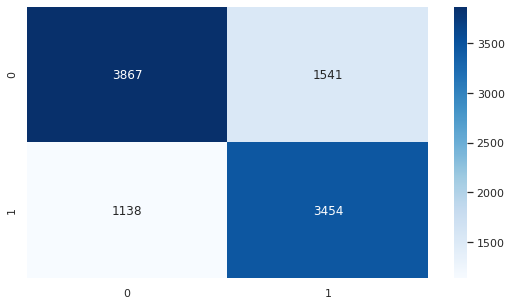

In [65]:
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


cf_matrix = confusion_matrix(y_pred, y_test, labels=[False, True])
tn, fp, fn, tp = cf_matrix.ravel()
fig = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
display(pd.DataFrame([(round(precision_score(y_test, y_pred)*100, 2), 
               round(accuracy_score(y_test, y_pred)*100, 2),
               tn, fp, fn, tp
               )], columns=['Precision', 
                            'Accuracy', 
                            'True Negatives', 
                            'False Positives',
                            'False Negatives', 
                            'True Positives'
                            ]).T.applymap(round))

fig

Understanding [ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

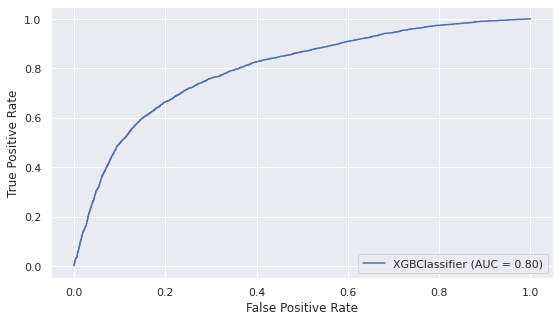

In [66]:
# Plot ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gboost, X_test, y_test)

# <a id='mnist'>EMNIST</a>

The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19  and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset. Let us use this dataset to train and detect character scribes on a piece of white paper.

In [67]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tf.enable_v2_behavior()

# Load MNIST dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Convert image into a flattened tensor
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

## Train the Keras Model

In [68]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.6352 - accuracy: 0.8247 - val_loss: 0.1969 - val_accuracy: 0.9434
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1778 - accuracy: 0.9484 - val_loss: 0.1399 - val_accuracy: 0.9602
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1248 - accuracy: 0.9647 - val_loss: 0.1169 - val_accuracy: 0.9648
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0928 - accuracy: 0.9738 - val_loss: 0.1008 - val_accuracy: 0.9690
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0739 - accuracy: 0.9800 - val_loss: 0.0930 - val_accuracy: 0.9702
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0622 - accuracy: 0.9823 - val_loss: 0.0783 - val_accuracy: 0.9753
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0528 - accuracy: 0.9848 - val_loss: 0.0800 - val_accuracy: 0.9760
Epoch 

## Test on Handwriting

We achieved great accuracy on existing MNIST sample. But if we applied to a new handwriting -- aka Seshu's -- does it perform in real world? See my [scribble](https://drive.google.com/uc?export=download&id=1wpGcdElKL0GF4PlE8SheEFFOQiMUb0Vw)

In [69]:
!wget --quiet -O file.png "https://drive.google.com/uc?export=download&id=1wpGcdElKL0GF4PlE8SheEFFOQiMUb0Vw"

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



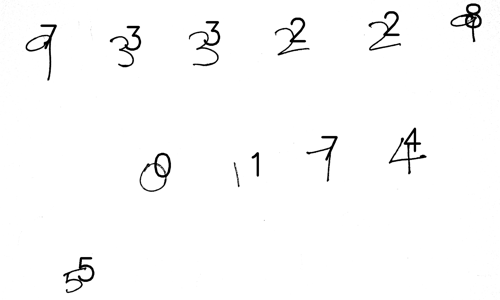

In [70]:
from IPython.display import Image, display
import PIL
from keras.preprocessing.image import img_to_array, load_img
import cv2
from skimage.transform import resize as imresize
# Read input scribble
img = cv2.imread('file.png', cv2.IMREAD_GRAYSCALE)
edged = cv2.Canny(img, 10, 100)

# Detect where areas of interest exis
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Create a blank copy to write-over
newimg = img.copy()

# Where each blotch of ink exists, clip and detect
for (x,y,w,h) in [rect for rect in [cv2.boundingRect(ctr) for ctr in contours]]:
    if w >= 10 and h >= 50:
        # Clip some border-buffer zone as well so the digit only covers 50% of the area
        try:
          digit_img = cv2.resize(edged[y-32:y+h+32,x-32:x+w+32], (28,28), interpolation=cv2.INTER_AREA)
          # Convert clipped digit into black-n-white; MNIST standard is BW
          (_, bw_img) = cv2.threshold(digit_img, 5, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
          # Predict the scribbled letter
          digit = model.predict_classes(tf.reshape(bw_img, (1,28,28,1)))[0]
          # Overlay the recognized text right on top of the existing scribble
          cv2.putText(newimg, str(digit), (max(30, x + 50), max(30, y + 50)), cv2.FONT_HERSHEY_SIMPLEX, 4, 0, 8)
        except:
          pass

# Show original image
dimage = lambda x: PIL.Image.fromarray(x).convert("L")
display(dimage(newimg).resize((500, 300)))